# RNN(Recurrent Neural Network)

RNN에 대한 기본적인 아이디어는 순차적인 정보를 처리한다는 데 있다.

기존의 신경망 구조에서는 모든 입력과 출력이 각각 독립적이라고 가정했지만, 많은 경우에 이는 옳지 않은 방법이다.

한 예로, 문장에서 다음에 나올 단어를 추측하고 싶다면 이전에 나온 단어들을 아는 것이 큰 도움이 될 것이다. 

Recurrent란 **동일한 Task**를 **한 시퀀스의 모든 요소마다 적용**하고, 출력 결과를 다음 계산 결과의 입력으로 활용하는 것을 의미한다.

이론적으로 RNN은 임의의 길이의 시퀀스 정보를 처리할 수 있지만, 실제로는 비교적 짧은 시퀀스만 효과적으로 처리할 수 있다.

![RNN](./resources/imgs/rnn.jpg)

> 위 그림은 RNN의 Recurrent를 한 눈에 보여준다. 우리가 관심있는 시퀀스 정보가 5개의 단어로 이루어진 문장이라면, RNN 네트워크는 한 단어당 하나의 layer씩 (Recurrent 연결이 없는, 또는 사이클이 없는) 5-layer 신경망 구조로 펼쳐질 것이다.

RNN 구조에서 일어나는 계산에 대한 식은 아래와 같다.

$x_t$: 시간 스탭(time step) $t$에서의 입력값

$s_t$: 시간 스탭 $t$에서의 hidden state
 - 이전 시간 스텝의 hiddent state 값과 현재 시간 스텝의 입력값에 의해 계산 됨
 - $s_t = f(Ux_t + Ws_{t-1})$: 비선형 함수 f는 보통 $tanh$나 $ReLU$가 사용 됨
 - 첫 hidden state를 계산하기 위한 s$_{-1}$은 보통 $0$으로 초기화

$o_t$: 시간 스텝 $t$에서의 출력값(예를 들어, 문장에서 다음 단어를 추측하고 싶다면 단어 수만큼의 차원의 확률 벡터)
 - $o_t = softmax(Vs_t)$
 
 

Hidden state $s_t$는 신경망에서의 **기억 영역**이라고 생각할 수 있다.

* $s_t$는 과거의 시간 스텝들에서 일어난 일들에 대한 정보를 전부 담고 있고, 

* 출력값 $o_t$는 오로지 현재 시간 스텝 t의 메모리에만 의존한다. 

하지만 위에서 잠깐 언급했듯이, 실제 구현에서는 너무 먼 과거에 일어난 일들은 잘 기억하지 못한다.

각 layer 마다의 파라미터 값들이 전부 다 다른 기존의 Deep한 신경망 구조와 달리, 

RNN은 모든 시간 스텝에 대해 파라미터 값을 전부 공유하고 있다 (위 그림의 U, V, W). 

이는 RNN이 각 스텝마다 입력값만 다를 뿐 거의 똑같은 계산을 하고 있다는 것을 보여준다. 

이러한 특성이 RNN에서의 학습해야 할 파라미터 개수를 적은 개수로 줄여준다.

---

위 다이어그램에서는 매 시간 스텝마다 출력값을 내지만, 문제에 따라 달라질 수도 있다. 

예를 들어, 문장에서 긍정/부정적인 감정을 추측하고 싶다면 굳이 모든 단어 위치에 대해 

추측값을 내지 않고 최종 추측값 하나만 내서 판단하는 것이 더 유용할 수도 있다. 

---

마찬가지로, 입력값 역시 매 시간 스텝마다 꼭 다 필요한 것은 아니다. 

RNN에서의 핵심은 시퀀스 정보에 대해 어떠한 정보를 추출해 주는 hidden state이기 때문이다.

### 첫째: 어떤 임의의 문장이 올바른 문법의 문장인지 확률 계산하기
이는 문장이 문법적으로나 의미적으로 어느 정도 올바른지 측정할 수 있도록 해주고, 보통 자동 번역 시스템의 일부로 활용된다.

### 둘째: 새로운 문장 생성하기
셰익스피어의 소설에 언어 모델을 학습시키면 셰익스피어가 쓴 글과 비슷한 글을 네트워크가 자동으로 생성해 낸다.
RNN 기반의 character-level 언어 모델이 생성해낼 수 있는 여러 가지 재밌는 데모를 [Andrej Karpathy의 블로그 포스트](http://karpathy.github.io/2015/05/21/rnn-effectiveness/)에서 확인할 수 있다.

## LSTM(Long short-term memory)

여러 종류의 RNN 기법 중에서 가장 많이 사용되는 것은 LSTM으로, 위에서 살펴본 기본 RNN 구조에 비해 

더 긴 시퀀스를 효과적으로 잘 기억한다는 장점 때문이다. 

대략적으로 hidden state를 계산하는 방법만 조금 다를뿐, 위에서 설명한 RNN과 기본적인 구조는 같다.

## RNN을 이용한 여러 NLP(Natural Language Processing) 분야

### 언어 모델링과 텍스트 생성

언어 모델은 주어진 문장에서 이전 단어들을 보고 다음 단어가 나올 확률을 계산해주는 모델이다. 언어 모델은 어떤 문장이 실제로 존재할 확률이 얼마나 되는지 계산해주기 때문에, 자동 번역의 출력값으로 어떤 문장을 내보내는 것이 더 좋은지 (실생활에서 높은 확률로 존재하는 문장들은 보통 문법적/의미적으로 올바르기 때문) 알려줄 수 있다. 문장에서 다음 단어가 나타날 확률을 계산해주는 주 목적 외의 부수적인 효과로 생성(generative) 모델을 얻을 수 있는데, 출력 확률 분포에서 샘플링을 통해 문장의 다음 단어가 무엇이 되면 좋을지 정한다면 기존에 없던 새로운 문장을 생성할 수 있다. 또한, 학습 데이터에 따라 다양하고 재밌는 여러 가지를 만들어낼 수도 있다. 언어 모델에서의 입력값은 단어들의 시퀀스 (e.g. one-hot encoded 벡터 시퀀스)이고, 출력은 추측된 단어들의 시퀀스이다. 네트워크를 학습할 때에는 시간 스텝 t에서의 출력값이 실제로 다음 입력 단어가 되도록 o_t=x_{t+1}로 정해준다.

### 자동 번역 (기계 번역)

기계 번역 문제는 입력이 단어들의 시퀀스라는 점에서 언어 모델링과 비슷하지만, 출력값이 다른 언어로 되어있는 단어들의 시퀀스라는 점에서 차이가 있다. 네트워크 상에서의 중요한 차이점은, 입력값을 전부 다 받아들인 다음에서야 네트워크가 출력값을 내보낸다는 점에 있는데, 번역 문제에서는 어순이 다른 문제 등이 있기 때문에 대상 언어의 문장의 첫 단어를 알기 위해선 번역할 문장 전체를 봐야 할 수도 있기 때문이다.


### 음성 인식

사운드 웨이브의 음향 신호(acoustic signal)를 입력으로 받아들이고, 출력으로는 음소(phonetic segment)들의 시퀀스와 각각의 음소별 확률 분포를 추측할 수 있다.

### 이미지 캡션 생성

컴퓨터 비젼에서 활발하게 사용된 convolutional neural network(CNN)과 RNN을 함께 사용한다면, 임의의 이미지를 텍스트로 설명해주는 시스템을 만드는 것도 가능하다. 실제로 어떻게 왜 동작하는지는 상당히 신기하다. CNN과 RNN을 합친 모델은 이미지로부터 얻어낸 주요 단어들과 이미지의 각 부분을 매칭해줄 수도 있다.

## RNN 학습하기

RNN 네트워크를 학습하는 것은 기존의 신경망 모델 학습과 매우 유사하나,

네트워크의 각 시간 스텝마다 파라미터들이 공유되기 때문에 기존의 역전파(Back-Propagation) 

알고리즘을 그대로 사용하진 못하고 BPTT(Backpropagation Through Time)라는 변형된 알고리즘을 사용한다.

그 이유는, 각 출력 부분에서의 Gradient가 현재 시간 스텝에만 의존하지 않고 이전 시간 스텝들에도 의존하기 때문이다.

즉, $t = k$에서의 Gradient를 계산하기 위해서는 시간 스텝 k-1개 이전부터의 Gradient 전부를 더해주어야 한다. 

단순한 RNN을 BPTT로 학습시키는 것은 Vanishing/Exploding Gradient 문제로 인해 긴 시퀀스를 학습시키는 것이 매우 어렵다.

이를 해결하기 위한 여러 트릭들이 존재하고, LSTM 등 이 문제를 해결하기 위한 다양한 변종(확장된) RNN 모델들이 연구되었다.

### Bidirectional RNN

시간 스텝 t에서의 출력값이 이전 시간 스텝 외에, 이후의 시간 스텝에서 들어오는 입력값에도 영향을 받을 수 있다는 아이디어에 기반한다.

예를 들어, 영어 문제에서 빈칸에 가장 알맞는 단어를 채우기 위해서는 빈칸보다 앞쪽 문장들도 봐야겠지만,

빈칸 이후의 단어들도 문맥을 파악하는데 도움이 되기 때문이다.

네트워크 구조는 RNN에서 단순히 확장되어서, 아래 그림처럼 두 개의 RNN이 동시에 존재하고, 

출력값은 두 RNN의 hidden state에 모두 의존하도록 계산된다.

![bidirectional-rnn](./resources/imgs/bidirectional-rnn.png)


### Deep Bidirectional RNN

기본적인 Bidirectional RNN의 구조와 비슷하지만, 매 시간 스텝마다 여러 layer가 있다. 

실제 구현에서는 이러한 구조가 학습할 수 있는 capacity가 크다 (학습 데이터는 훨씬 더 많이 필요하다).

![Deep_Bidirectional-rnn](./resources/imgs/Deep_Bidirectional-rnn.png)

### LSTM Network

LSTM은 RNN과 거의 같은 구조를 갖고 있지만, hidden state를 계산하는 방식이 다르다. 

LSTM에서는 RNN의 뉴런 대신에 **메모리 셀(Memory Cell)**이라고 불리는 구조를 사용하는데, 

입력값으로 이전 state $h_{t-1}$와 현재 입력값 $x_t$를 입력으로 받는 블랙박스 형태로 생각하면 된다. 

메모리 셀 내부에서는 이전 메모리 값을 그대로 남길지 지울지 정하고, 

현재 state와 메모리 셀의 입력값을 토대로 현재 메모리에 저장할 값을 계산한다. 

이러한 구조는 긴 시퀀스를 기억하는데 매우 효과적이었다. 

![LSTM](./resources/imgs/LSTM.png)

## RNN with Tensorflow

In [1]:
# http://www.wildml.com/2016/08/rnns-in-tensorflow-a-practical-guide-and-undocumented-features/
# http://learningtensorflow.com/index.html
# http://suriyadeepan.github.io/2016-12-31-practical-seq2seq/

import tensorflow as tf
import numpy as np
from tensorflow.contrib import rnn
import pprint
pp = pprint.PrettyPrinter(indent=4)

In [2]:
# One hot encoding for each char in 'hello'
h = [1, 0, 0, 0]
e = [0, 1, 0, 0]
l = [0, 0, 1, 0]
o = [0, 0, 0, 1]

## Only 1 Cell

In [3]:
tf.reset_default_graph()
sess = tf.InteractiveSession()
with tf.variable_scope('one_cell') as scope:
    # One cell RNN input_dim (4) -> output_dim (2)
    hidden_size = 2
    cell = tf.contrib.rnn.BasicRNNCell(num_units=hidden_size)
    print(cell.output_size, cell.state_size)

    x_data = np.array([[h]], dtype=np.float32) # x_data = [[[1,0,0,0]]]
    pp.pprint(x_data)
    outputs, _states = tf.nn.dynamic_rnn(cell, x_data, dtype=tf.float32)

    sess.run(tf.global_variables_initializer())
    pp.pprint(outputs.eval())

2 2
array([[[ 1.,  0.,  0.,  0.]]], dtype=float32)
array([[[ 0.17490867,  0.44787094]]], dtype=float32)


## 2 sequances

In [4]:
tf.reset_default_graph()
sess = tf.InteractiveSession()
with tf.variable_scope('two_sequances') as scope:
    # One cell RNN input_dim (4) -> output_dim (2). sequence: 5
    hidden_size = 2
    cell = tf.contrib.rnn.BasicRNNCell(num_units=hidden_size)
    x_data = np.array([[h, e, l, l, o]], dtype=np.float32)
    print(x_data.shape)
    pp.pprint(x_data)
    outputs, states = tf.nn.dynamic_rnn(cell, x_data, dtype=tf.float32)
    sess.run(tf.global_variables_initializer())
    pp.pprint(outputs.eval())

(1, 5, 4)
array([[[ 1.,  0.,  0.,  0.],
        [ 0.,  1.,  0.,  0.],
        [ 0.,  0.,  1.,  0.],
        [ 0.,  0.,  1.,  0.],
        [ 0.,  0.,  0.,  1.]]], dtype=float32)
array([[[-0.05280573, -0.48137349],
        [-0.46984109,  0.56881678],
        [-0.89379609, -0.53229475],
        [-0.82912683,  0.18403758],
        [-0.74849969, -0.39245877]]], dtype=float32)


# 3 batches

In [5]:
tf.reset_default_graph()
sess = tf.InteractiveSession()
with tf.variable_scope('3_batches') as scope:
    # One cell RNN input_dim (4) -> output_dim (2). sequence: 5, batch 3
    # 3 batches 'hello', 'eolll', 'lleel'
    x_data = np.array([[h, e, l, l, o],
                       [e, o, l, l, l],
                       [l, l, e, e, l]], dtype=np.float32)
    pp.pprint(x_data)
    
    hidden_size = 2
    cell = rnn.BasicLSTMCell(num_units=hidden_size, state_is_tuple=True)
    ## https://www.tutorialspoint.com/python/python_tuples.htm
    ## * tuple: immutable list
    ##
    ## if state_is_tuple:
    ##     return (c_state, m_state)
    ## else:
    ##     return c_state + m_state # 결과들을 합쳐서(Concatenate) 하나의 텐서(Tensor)로 반환
    
    outputs, _states = tf.nn.dynamic_rnn(cell, x_data, dtype=tf.float32)
    sess.run(tf.global_variables_initializer())
    pp.pprint(outputs.eval())

array([[[ 1.,  0.,  0.,  0.],
        [ 0.,  1.,  0.,  0.],
        [ 0.,  0.,  1.,  0.],
        [ 0.,  0.,  1.,  0.],
        [ 0.,  0.,  0.,  1.]],

       [[ 0.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  1.,  0.],
        [ 0.,  0.,  1.,  0.],
        [ 0.,  0.,  1.,  0.]],

       [[ 0.,  0.,  1.,  0.],
        [ 0.,  0.,  1.,  0.],
        [ 0.,  1.,  0.,  0.],
        [ 0.,  1.,  0.,  0.],
        [ 0.,  0.,  1.,  0.]]], dtype=float32)
array([[[ 0.05623469, -0.03956522],
        [ 0.14818923, -0.06513537],
        [ 0.05228928, -0.2019804 ],
        [-0.06294766, -0.27175188],
        [-0.1737054 , -0.17175992]],

       [[ 0.11565009, -0.01944632],
        [-0.04699454, -0.05763028],
        [-0.12724197, -0.21007976],
        [-0.19539118, -0.27607805],
        [-0.24900252, -0.3118816 ]],

       [[-0.07952952, -0.16230357],
        [-0.15622549, -0.2505348 ],
        [ 0.00825727, -0.21055229],
        [ 0.08274272, -0.18072607],
        [-0.0252098 ,

## 3 Batches with dynamic length

In [6]:
tf.reset_default_graph()
sess = tf.InteractiveSession()
with tf.variable_scope('3_batches_dynamic_length') as scope:
    # One cell RNN input_dim (4) -> output_dim (5). sequence: 5, batch 3
    # 3 batches 'hello', 'eolll', 'lleel'
    x_data = np.array([[h, e, l, l, o],
                       [e, o, l, l, l],
                       [l, l, e, e, l]], dtype=np.float32)
    pp.pprint(x_data)
    
    hidden_size = 2
    cell = rnn.BasicLSTMCell(num_units=hidden_size, state_is_tuple=True)
    outputs, _states = tf.nn.dynamic_rnn(cell, x_data, dtype=tf.float32, 
                                         sequence_length=[5,4,3]) # Batch 형태 변환 가능, 미설정 시 x_data.shape로 batch 진행
    sess.run(tf.global_variables_initializer())
    pp.pprint(outputs.eval())

array([[[ 1.,  0.,  0.,  0.],
        [ 0.,  1.,  0.,  0.],
        [ 0.,  0.,  1.,  0.],
        [ 0.,  0.,  1.,  0.],
        [ 0.,  0.,  0.,  1.]],

       [[ 0.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  1.,  0.],
        [ 0.,  0.,  1.,  0.],
        [ 0.,  0.,  1.,  0.]],

       [[ 0.,  0.,  1.,  0.],
        [ 0.,  0.,  1.,  0.],
        [ 0.,  1.,  0.,  0.],
        [ 0.,  1.,  0.,  0.],
        [ 0.,  0.,  1.,  0.]]], dtype=float32)
array([[[ 0.03836685,  0.01534821],
        [-0.02845195,  0.11174238],
        [ 0.00475065, -0.00691689],
        [ 0.03075164, -0.0851906 ],
        [-0.08912348, -0.15213388]],

       [[-0.06924959,  0.09345585],
        [-0.15079924, -0.05622675],
        [-0.111719  , -0.12153181],
        [-0.07358058, -0.16840446],
        [ 0.        ,  0.        ]],

       [[ 0.02656447, -0.08087905],
        [ 0.04998814, -0.132653  ],
        [-0.01483389,  0.03272988],
        [ 0.        ,  0.        ],
        [ 0.        ,

In [7]:
x_data.shape

(3, 5, 4)

## Initial State(Usually Zero)

In [8]:
tf.reset_default_graph()
sess = tf.InteractiveSession()
with tf.variable_scope('initial_state') as scope:
    batch_size = 3
    x_data = np.array([[h, e, l, l, o],
                      [e, o, l, l, l],
                      [l, l, e, e, l]], dtype=np.float32)
    pp.pprint(x_data)
    
    # One cell RNN input_dim (4) -> output_dim (5). sequence: 5, batch: 3
    hidden_size=2
    cell = rnn.BasicLSTMCell(num_units=hidden_size, state_is_tuple=True)
    
    '''
    cell.zero_state(size, type): cell의 parameter들을 0으로 초기화
    '''
    initial_state = cell.zero_state(batch_size, tf.float32)
    
    outputs, _states = tf.nn.dynamic_rnn(cell, x_data,
                                         initial_state=initial_state, dtype=tf.float32)
    sess.run(tf.global_variables_initializer())
    pp.pprint(outputs.eval())

array([[[ 1.,  0.,  0.,  0.],
        [ 0.,  1.,  0.,  0.],
        [ 0.,  0.,  1.,  0.],
        [ 0.,  0.,  1.,  0.],
        [ 0.,  0.,  0.,  1.]],

       [[ 0.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  1.,  0.],
        [ 0.,  0.,  1.,  0.],
        [ 0.,  0.,  1.,  0.]],

       [[ 0.,  0.,  1.,  0.],
        [ 0.,  0.,  1.,  0.],
        [ 0.,  1.,  0.,  0.],
        [ 0.,  1.,  0.,  0.],
        [ 0.,  0.,  1.,  0.]]], dtype=float32)
array([[[ 0.01574663, -0.05222248],
        [-0.11916469, -0.18197553],
        [-0.1376331 , -0.05894219],
        [-0.17311192,  0.09443656],
        [-0.20929588,  0.00629247]],

       [[-0.12742309, -0.14851737],
        [-0.1284361 , -0.16850547],
        [-0.13733651, -0.07023881],
        [-0.17342094,  0.0849084 ],
        [-0.1866931 ,  0.2080057 ]],

       [[-0.07609111,  0.12585831],
        [-0.11362801,  0.22768313],
        [-0.21199527,  0.01591912],
        [-0.24682997, -0.11034822],
        [-0.18385477,

## Multi-RNN

In [9]:
import copy

# Create input data
batch_size=3
sequence_length=5
input_dim=3

x_data = np.arange(45, dtype=np.float32).reshape(batch_size, sequence_length, input_dim)
pp.pprint(x_data)  # batch, sequence_length, input_dim

tf.reset_default_graph()
sess = tf.InteractiveSession()
with tf.variable_scope('MultiRNNCell') as scope:
    # Make rnn
    cell = rnn.BasicLSTMCell(num_units=5, state_is_tuple=True)
    cell.zero_state(batch_size, tf.float32)
    
    # 3 layers
    multi_cell = rnn.MultiRNNCell([copy.copy(cell) for _ in range(3)], state_is_tuple=True)

    # rnn in/out
    outputs, _states = tf.nn.dynamic_rnn(multi_cell, x_data, dtype=tf.float32)
    print("dynamic rnn: ", outputs)
    
    sess.run(tf.global_variables_initializer())
    pp.pprint(outputs.eval())  # batch size, unrolling (time), hidden_size

array([[[  0.,   1.,   2.],
        [  3.,   4.,   5.],
        [  6.,   7.,   8.],
        [  9.,  10.,  11.],
        [ 12.,  13.,  14.]],

       [[ 15.,  16.,  17.],
        [ 18.,  19.,  20.],
        [ 21.,  22.,  23.],
        [ 24.,  25.,  26.],
        [ 27.,  28.,  29.]],

       [[ 30.,  31.,  32.],
        [ 33.,  34.,  35.],
        [ 36.,  37.,  38.],
        [ 39.,  40.,  41.],
        [ 42.,  43.,  44.]]], dtype=float32)
dynamic rnn:  Tensor("MultiRNNCell/rnn/transpose:0", shape=(3, 5, 5), dtype=float32)
array([[[ -1.17925741e-03,  -3.44865985e-04,   8.82364286e-04,
           1.03916030e-03,   1.51803193e-03],
        [ -4.01360821e-03,  -7.91756087e-04,   3.16292187e-03,
           3.16034886e-03,   5.05335489e-03],
        [ -6.54326938e-03,   1.57756484e-04,   6.52547227e-03,
           4.55375668e-03,   9.17882565e-03],
        [ -7.59032276e-03,   3.32919671e-03,   1.07305096e-02,
           4.05586977e-03,   1.33002931e-02],
        [ -6.92559872e-03,   8.6926939

## Bi-Directional


In [10]:
tf.reset_default_graph()
sess = tf.InteractiveSession()
with tf.variable_scope('bi-directional') as scope:
    # bi-directional rnn
    cell_fw = rnn.BasicLSTMCell(num_units=5, state_is_tuple=True)
    cell_bw = rnn.BasicLSTMCell(num_units=5, state_is_tuple=True)

    outputs, states = tf.nn.bidirectional_dynamic_rnn(cell_fw, cell_bw, x_data,
                                                      sequence_length=[2, 3, 1],
                                                      dtype=tf.float32)

    sess.run(tf.global_variables_initializer())
    pp.pprint(sess.run(outputs))
    pp.pprint(sess.run(states))

(   array([[[  2.02069625e-01,   2.62673907e-02,  -7.80904517e-02,
           7.59446621e-02,  -1.19475774e-01],
        [  2.64362067e-01,  -1.39325514e-01,  -1.00306101e-01,
           1.64778158e-01,  -1.25187844e-01],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00]],

       [[  1.41771331e-01,  -2.25216467e-02,  -1.49441831e-07,
           1.26625341e-03,  -2.49418407e-03],
        [  1.09348319e-01,  -1.24935973e-02,  -1.41997816e-07,
           1.69490254e-03,  -1.22597220e-03],
        [  8.79141614e-02,  -6.89801155e-03,  -1.28624947e-07,
           1.83878455e-03,  -4.75086214e-04],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00],
        [  0.

## Flatten Based SoftMax

In [11]:
batch_size=3
sequence_length=5
input_dim=3

hidden_size=3

num_classes=5

x_data = np.arange(45, dtype=np.float32).reshape(batch_size, sequence_length, input_dim)
pp.pprint(x_data) # hidden_size=3, sequence_length=4, batch_size=2

array([[[  0.,   1.,   2.],
        [  3.,   4.,   5.],
        [  6.,   7.,   8.],
        [  9.,  10.,  11.],
        [ 12.,  13.,  14.]],

       [[ 15.,  16.,  17.],
        [ 18.,  19.,  20.],
        [ 21.,  22.,  23.],
        [ 24.,  25.,  26.],
        [ 27.,  28.,  29.]],

       [[ 30.,  31.,  32.],
        [ 33.,  34.,  35.],
        [ 36.,  37.,  38.],
        [ 39.,  40.,  41.],
        [ 42.,  43.,  44.]]], dtype=float32)


In [12]:
x_data = x_data.reshape(-1, hidden_size)
pp.pprint(x_data)
print(x_data.shape)

array([[  0.,   1.,   2.],
       [  3.,   4.,   5.],
       [  6.,   7.,   8.],
       [  9.,  10.,  11.],
       [ 12.,  13.,  14.],
       [ 15.,  16.,  17.],
       [ 18.,  19.,  20.],
       [ 21.,  22.,  23.],
       [ 24.,  25.,  26.],
       [ 27.,  28.,  29.],
       [ 30.,  31.,  32.],
       [ 33.,  34.,  35.],
       [ 36.,  37.,  38.],
       [ 39.,  40.,  41.],
       [ 42.,  43.,  44.]], dtype=float32)
(15, 3)


In [13]:
softmax_w = np.arange(15, dtype=np.float32).reshape(hidden_size, num_classes)
pp.pprint(softmax_w)
print(softmax_w.shape)

array([[  0.,   1.,   2.,   3.,   4.],
       [  5.,   6.,   7.,   8.,   9.],
       [ 10.,  11.,  12.,  13.,  14.]], dtype=float32)
(3, 5)


In [14]:
outputs = np.matmul(x_data,  ) # (15, 3) x (3, 5) = (15, 5)
outputs = outputs.reshape(-1, sequence_length, num_classes) # (batch, seq, class) = (?, 5, 5)
pp.pprint(outputs)

array([[[   25.,    28.,    31.,    34.,    37.],
        [   70.,    82.,    94.,   106.,   118.],
        [  115.,   136.,   157.,   178.,   199.],
        [  160.,   190.,   220.,   250.,   280.],
        [  205.,   244.,   283.,   322.,   361.]],

       [[  250.,   298.,   346.,   394.,   442.],
        [  295.,   352.,   409.,   466.,   523.],
        [  340.,   406.,   472.,   538.,   604.],
        [  385.,   460.,   535.,   610.,   685.],
        [  430.,   514.,   598.,   682.,   766.]],

       [[  475.,   568.,   661.,   754.,   847.],
        [  520.,   622.,   724.,   826.,   928.],
        [  565.,   676.,   787.,   898.,  1009.],
        [  610.,   730.,   850.,   970.,  1090.],
        [  655.,   784.,   913.,  1042.,  1171.]]], dtype=float32)


## Sequence-to-Sequence, Sequence Loss

In [34]:
# https://tensorflowkorea.gitbooks.io/tensorflow-kr/content/g3doc/tutorials/seq2seq/

tf.reset_default_graph()
sess = tf.InteractiveSession()

batch_size = 1
sequence_length = 3
emb_dim = 2

# [batch_size, sequence_length]
y_data = tf.constant([[1, 1, 1]]) # [1, 3]
pp.pprint(y_data)

# [batch_size, sequence_length, emb_dim ]
prediction = tf.constant([[[0.2, 0.7], [0.6, 0.2], [0.2, 0.9]]], dtype=tf.float32) # [1, 3, 2]
pp.pprint(prediction)

# [batch_size, sequence_length]
weights = tf.constant([[1, 1, 1]], dtype=tf.float32)
pp.pprint(weights)

## logits: 예측 결과, one_hot 형태로 표현
## targets: 실제 결과
## weights: 각 data의 중요도(평등하다면 [1, 1, ... , 1, 1])
sequence_loss = tf.contrib.seq2seq.sequence_loss(logits=prediction, targets=y_data, weights=weights)
sess.run(tf.global_variables_initializer())

## [0.2, 0.7] => softmax_1(y=1): e^(0.7) / (e^(0.7) + e^(0.9)), 'y=0'은 생략
## [0.6, 0.2] => softmax_2(y=1): e^(0.2) / (e^(0.6) + e^(0.2)), 'y=0'은 생략
## [0.2, 0.9] => softmax_3(y=1): e^(0.9) / (e^(0.2) + e^(0.9)), 'y=0'은 생략

## Loss = softmax_cross_entropy
## softmax_cross_entropy = sum_i(-log_e(softmax_i(y=1))) / n, (n = 3)

## log_10(e) = 0.43429448190325182765108299019028

## e^(0.2) = 1.221403
## e^(0.7) = 2.013753
## e^(0.2) + e^(0.7) = 3.235155
## -log_e(e^(0.7) / (e^(0.2) + e^(0.7)))
## -log_e(2.013753/3.235155) = 0.474077

## e^(0.6) = 1.822119
## e^(0.2) = 1.221403
## e^(0.6) + e^(0.2) = 3.043522
## -log_e(e^(0.2) / (e^(0.6) + e^(0.2)))
## -log_e(1.221403/3.043522) = 0.913015

## e^(0.2) = 1.221403
## e^(0.9) = 2.459603
## e^(0.2) + e^(0.9) = 3.043515
## -log_e(e^(0.9) / (e^(0.2) + e^(0.9)))
## -log_e(2.459603/3.681006) = 0.403186

## Loss = (0.474077 + 0.913015 + 0.403186) / 3 
## Loss = 0.5967593

print("Loss: ", sequence_loss.eval())

<tf.Tensor 'Const:0' shape=(1, 3) dtype=int32>
<tf.Tensor 'Const_1:0' shape=(1, 3, 2) dtype=float32>
<tf.Tensor 'Const_2:0' shape=(1, 3) dtype=float32>
Loss:  0.596759


In [35]:
tf.reset_default_graph()
sess = tf.InteractiveSession()

batch_size = 1
sequence_length = 3
emb_dim = 2

# [batch_size, sequence_length]
y_data = tf.constant([[1, 1, 1]])

# [batch_size, sequence_length]
weights = tf.constant([[1, 1, 1]], dtype=tf.float32)

## log_10(e) = 0.43429448190325182765108299019028

# [batch_size, sequence_length, emb_dim] = [1, 3, 2]
prediction1 = tf.constant([[[0.3, 0.7], [0.3, 0.7], [0.3, 0.7]]], dtype=tf.float32)
## e^(0.3) = 1.349859
## e^(0.7) = 2.013753
## e^(0.3) + e^(0.7) = 3.363612
## -log_e(e^(0.7) / (e^(0.2) + e^(0.7)))
## -log_e(2.013753/3.363612) = 0.513015
sequence_loss1 = tf.contrib.seq2seq.sequence_loss(prediction1, y_data, weights)

prediction2 = tf.constant([[[0.1, 0.9], [0.1, 0.9], [0.1, 0.9]]], dtype=tf.float32)
## e^(0.1) = 1.105171
## e^(0.9) = 2.459603
## e^(0.1) + e^(0.9) = 3.564774
## -log_e(e^(0.9) / (e^(0.1) + e^(0.9)))
## -log_e(2.013753/3.363612) = 0.371101
sequence_loss2 = tf.contrib.seq2seq.sequence_loss(prediction2, y_data, weights)

prediction3 = tf.constant([[[1, 0], [1, 0], [1, 0]]], dtype=tf.float32)
## e^(1) = 2.718282
## e^(0) = 1
## e^(1) + e^(0) = 3.718282
## -log_e(e^(0) / (e^(1) + e^(0)))
## -log_e(1/3.718282) = 1.313262
sequence_loss3 = tf.contrib.seq2seq.sequence_loss(prediction3, y_data, weights)

prediction4 = tf.constant([[[0, 1], [1, 0], [0, 1]]], dtype=tf.float32)
## e^(0) = 1
## e^(1) = 2.718282
## e^(0) + e^(1) = 3.718282
## -log_e(e^(1) / (e^(1) + e^(0)))
## -log_e(2.718282/3.718282) = 0.313262
## ((2 * 0.313262) + (1 * 1.313262)) / 3 = 0.646595
sequence_loss4 = tf.contrib.seq2seq.sequence_loss(prediction4, y_data, weights)

sess.run(tf.global_variables_initializer())

print("Loss1: ", sequence_loss1.eval(),
      "Loss2: ", sequence_loss2.eval(),
      "Loss3: ", sequence_loss3.eval(),
      "Loss4: ", sequence_loss4.eval())

Loss1:  0.513015 Loss2:  0.371101 Loss3:  1.31326 Loss4:  0.646595


## Hello RNN

In [32]:
import tensorflow as tf
import numpy as np
tf.set_random_seed(777)  # reproducibility

idx2char = ['h', 'i', 'e', 'l', 'o']
# Teach hello: hihell -> ihello
x_data = [[0, 1, 0, 2, 3, 3]]   # hihell
x_one_hot = [[[1, 0, 0, 0, 0],   # h 0
              [0, 1, 0, 0, 0],   # i 1
              [1, 0, 0, 0, 0],   # h 0
              [0, 0, 1, 0, 0],   # e 2
              [0, 0, 0, 1, 0],   # l 3
              [0, 0, 0, 1, 0]]]  # l 3

y_data = [[1, 0, 2, 3, 3, 4]]    # ihello

num_classes = 5
input_dim = 5  # one-hot size
hidden_size = 5  # output from the LSTM. 5 to directly predict one-hot
batch_size = 1   # one sentence
sequence_length = 6  # |ihello| == 6
learning_rate = 0.1

X = tf.placeholder(
    tf.float32, [None, sequence_length, input_dim])  # X one-hot
Y = tf.placeholder(tf.int32, [None, sequence_length])  # Y label

cell = tf.contrib.rnn.BasicLSTMCell(num_units=hidden_size, state_is_tuple=True)
initial_state = cell.zero_state(batch_size, tf.float32)
outputs, _states = tf.nn.dynamic_rnn(
    cell, X, initial_state=initial_state, dtype=tf.float32)

# FC layer
X_for_fc = tf.reshape(outputs, [-1, hidden_size])
# fc_w = tf.get_variable("fc_w", [hidden_size, num_classes])
# fc_b = tf.get_variable("fc_b", [num_classes])
# outputs = tf.matmul(X_for_fc, fc_w) + fc_b
outputs = tf.contrib.layers.fully_connected(
    inputs=X_for_fc, num_outputs=num_classes, activation_fn=None)

# reshape out for sequence_loss
outputs = tf.reshape(outputs, [batch_size, sequence_length, num_classes])

weights = tf.ones([batch_size, sequence_length])
sequence_loss = tf.contrib.seq2seq.sequence_loss(
    logits=outputs, targets=Y, weights=weights)

loss = tf.reduce_mean(sequence_loss) # reduce_mean을 사용해 loss의 평균을 최소화
train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

prediction = tf.argmax(outputs, axis=2)
ㅠ
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(50):
        l, _ = sess.run([loss, train], feed_dict={X: x_one_hot, Y: y_data})
        result = sess.run(prediction, feed_dict={X: x_one_hot})
        print(i, "loss:", l, "prediction: ", result, "true Y: ", y_data)

        # print char using dic
        result_str = [idx2char[c] for c in np.squeeze(result)]
        print("\tPrediction str: ", ''.join(result_str))


0 loss: 1.65122 prediction:  [[3 3 3 3 3 3]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  llllll
1 loss: 1.52464 prediction:  [[3 3 3 3 3 3]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  llllll
2 loss: 1.44036 prediction:  [[3 3 3 3 3 3]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  llllll
3 loss: 1.39887 prediction:  [[3 3 3 3 3 3]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  llllll
4 loss: 1.34181 prediction:  [[3 3 3 3 3 3]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  llllll
5 loss: 1.25767 prediction:  [[3 3 3 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  lllllo
6 loss: 1.17182 prediction:  [[1 3 3 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  illllo
7 loss: 1.07741 prediction:  [[1 3 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ilello
8 loss: 0.968803 prediction:  [[1 3 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ilello
9 loss: 0.86062 prediction:  [[1 3 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ilello

## CharSeq With RNN

In [1]:
import tensorflow as tf
import numpy as np
tf.set_random_seed(777)  # reproducibility

sample = " if you want you"
idx2char = list(set(sample))  # index -> char
char2idx = {c: i for i, c in enumerate(idx2char)}  # char -> idex

# hyper parameters
dic_size = len(char2idx)  # RNN input size (one hot size)
hidden_size = len(char2idx)  # RNN output size
num_classes = len(char2idx)  # final output size (RNN or softmax, etc.)
batch_size = 1  # one sample data, one batch
sequence_length = len(sample) - 1  # number of lstm rollings (unit #)
learning_rate = 0.1

sample_idx = [char2idx[c] for c in sample]  # char to index
x_data = [ [:-1]]  # X data sample (0 ~ n-1) hello: hell
y_data = [sample_idx[1:]]   # Y label sample (1 ~ n) hello: ello

X = tf.placeholder(tf.int32, [None, sequence_length])  # X data
Y = tf.placeholder(tf.int32, [None, sequence_length])  # Y label

x_one_hot = tf.one_hot(X, num_classes)  # one hot: 1 -> 0 1 0 0 0 0 0 0 0 0
cell = tf.contrib.rnn.BasicLSTMCell(num_units=hidden_size, state_is_tuple=True)
initial_state = cell.zero_state(batch_size, tf.float32)
outputs, _states = tf.nn.dynamic_rnn(
    cell, x_one_hot, initial_state=initial_state, dtype=tf.float32)

# FC layer
X_for_fc = tf.reshape(outputs, [-1, hidden_size])
outputs = tf.contrib.layers.fully_connected(X_for_fc, num_classes, activation_fn=None)

# reshape out for sequence_loss
outputs = tf.reshape(outputs, [batch_size, sequence_length, num_classes])

weights = tf.ones([batch_size, sequence_length])
sequence_loss = tf.contrib.seq2seq.sequence_loss(
    logits=outputs, targets=Y, weights=weights)
loss = tf.reduce_mean(sequence_loss)
train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

prediction = tf.argmax(outputs, axis=2)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(50):
        l, _ = sess.run([loss, train], feed_dict={X: x_data, Y: y_data})
        result = sess.run(prediction, feed_dict={X: x_data})

        # print char using dic
        result_str = [idx2char[c] for c in np.squeeze(result)]

        print(i, "loss:", l, "Prediction:", ''.join(result_str))

0 loss: 2.29204 Prediction: y  uuuuuu   uuu
1 loss: 2.14853 Prediction: y              
2 loss: 2.04038 Prediction: yy y   yo      
3 loss: 1.88995 Prediction: yy youuyo   you
4 loss: 1.69055 Prediction: yy youuyo   you
5 loss: 1.45642 Prediction: yy youuwnnt you
6 loss: 1.17876 Prediction: yf youuwnnt you
7 loss: 0.923444 Prediction: yf youuwant you
8 loss: 0.712182 Prediction: yf you want you
9 loss: 0.534692 Prediction: yf you want you
10 loss: 0.387354 Prediction: if you want you
11 loss: 0.274107 Prediction: if you want you
12 loss: 0.194022 Prediction: if you want you
13 loss: 0.138038 Prediction: if you want you
14 loss: 0.0973654 Prediction: if you want you
15 loss: 0.0674945 Prediction: if you want you
16 loss: 0.0464489 Prediction: if you want you
17 loss: 0.0321986 Prediction: if you want you
18 loss: 0.022688 Prediction: if you want you
19 loss: 0.0163349 Prediction: if you want you
20 loss: 0.0120458 Prediction: if you want you
21 loss: 0.00910074 Prediction: if you want y

## CharSeq With SoftMax Only(No RNN Or LSTM)

In [21]:
# RNN이나 LSTM 없이 SoftMax만을 이용한 모델은 그 결과가 부정확

import tensorflow as tf
import numpy as np
tf.reset_default_graph()
tf.set_random_seed(777)  # reproducibility

sample = " if you want you"
idx2char = list(set(sample))  # index -> char
char2idx = {c: i for i, c in enumerate(idx2char)}  # char -> idex

# hyper parameters
dic_size = len(char2idx)  # RNN input size (one hot size)
rnn_hidden_size = len(char2idx)  # RNN output size
num_classes = len(char2idx)  # final output size (RNN or softmax, etc.)
batch_size = 1  # one sample data, one batch
sequence_length = len(sample) - 1  # number of lstm rollings (unit #)
learning_rate = 0.1

sample_idx = [char2idx[c] for c in sample]  # char to index
x_data = [sample_idx[:-1]]  # X data sample (0 ~ n-1) hello: hell
y_data = [sample_idx[1:]]   # Y label sample (1 ~ n) hello: ello

X = tf.placeholder(tf.int32, [None, sequence_length])  # X data
Y = tf.placeholder(tf.int32, [None, sequence_length])  # Y label

# flatten the data (ignore batches for now). No effect if the batch size is 1
X_one_hot = tf.one_hot(X, num_classes)  # one hot: 1 -> 0 1 0 0 0 0 0 0 0 0
X_for_softmax = tf.reshape(X_one_hot, [-1, rnn_hidden_size])

# softmax layer (rnn_hidden_size -> num_classes)
softmax_w = tf.get_variable("softmax_w", [rnn_hidden_size, num_classes])
softmax_b = tf.get_variable("softmax_b", [num_classes])
outputs = tf.matmul(X_for_softmax, softmax_w) + softmax_b

# expend the data (revive the batches)
outputs = tf.reshape(outputs, [batch_size, sequence_length, num_classes])
weights = tf.ones([batch_size, sequence_length])

# Compute sequence cost/loss
sequence_loss = tf.contrib.seq2seq.sequence_loss(logits=outputs, targets=Y, weights=weights)
loss = tf.reduce_mean(sequence_loss)  # mean all sequence loss
train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

prediction = tf.argmax(outputs, axis=2)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(1000):
        l, _ = sess.run([loss, train], feed_dict={X: x_data, Y: y_data})
        result = sess.run(prediction, feed_dict={X: x_data})
        
        if i % 10 == 0:
            # print char using dic
            result_str = [idx2char[c] for c in np.squeeze(result)]
            print(i, "loss:", l, "Prediction:", ''.join(result_str))

0 loss: 2.49444 Prediction: tottouwttuiotou
10 loss: 0.957336 Prediction: yf you yant you
20 loss: 0.456726 Prediction: yf you yant you
30 loss: 0.340868 Prediction: yf you yant you
40 loss: 0.311641 Prediction: yf you yant you
50 loss: 0.301267 Prediction: yf you yant you
60 loss: 0.296331 Prediction: yf you yant you
70 loss: 0.293396 Prediction: yf you yant you
80 loss: 0.291353 Prediction: yf you yant you
90 loss: 0.289785 Prediction: yf you yant you
100 loss: 0.28851 Prediction: yf you yant you
110 loss: 0.287441 Prediction: yf you yant you
120 loss: 0.286528 Prediction: yf you yant you
130 loss: 0.28574 Prediction: yf you yant you
140 loss: 0.285053 Prediction: yf you yant you
150 loss: 0.284451 Prediction: yf you yant you
160 loss: 0.28392 Prediction: yf you yant you
170 loss: 0.283449 Prediction: yf you yant you
180 loss: 0.283029 Prediction: yf you yant you
190 loss: 0.282653 Prediction: yf you yant you
200 loss: 0.282314 Prediction: yf you yant you
210 loss: 0.282009 Predictio

## RNN For Long Char(Stacked RNN)

In [22]:
# 문장의 앞 부분의 경우 이전 정보가 없어, 잘못 나온다. 이를 해결하는 모델로 Bidriectional-RNN이 제안됨

from __future__ import print_function

import tensorflow as tf
import numpy as np
from tensorflow.contrib import rnn

tf.set_random_seed(777)  # reproducibility

sentence = ("if you want to build a ship, don't drum up people together to "
            "collect wood and don't assign them tasks and work, but rather "
            "teach them to long for the endless immensity of the sea.")

char_set = list(set(sentence))
char_dic = {w: i for i, w in enumerate(char_set)}

data_dim = len(char_set)
hidden_size = len(char_set)
num_classes = len(char_set)
sequence_length = 10  # Any arbitrary number
learning_rate = 0.1

dataX = []
dataY = []
for i in range(0, len(sentence) - sequence_length):
    x_str = sentence[i:i + sequence_length]
    y_str = sentence[i + 1: i + sequence_length + 1]
    print(i, x_str, '->', y_str)

    x = [char_dic[c] for c in x_str]  # x str to index
    y = [char_dic[c] for c in y_str]  # y str to index

    dataX.append(x)
    dataY.append(y)

batch_size = len(dataX)

X = tf.placeholder(tf.int32, [None, sequence_length])
Y = tf.placeholder(tf.int32, [None, sequence_length])

# One-hot encoding
X_one_hot = tf.one_hot(X, num_classes)
print(X_one_hot)  # check out the shape


# Make a lstm cell with hidden_size (each unit output vector size)
def lstm_cell():
    cell = rnn.BasicLSTMCell(hidden_size, state_is_tuple=True)
    return cell

multi_cells = rnn.MultiRNNCell([lstm_cell() for _ in range(2)], state_is_tuple=True)

# outputs: unfolding size x hidden size, state = hidden size
outputs, _states = tf.nn.dynamic_rnn(multi_cells, X_one_hot, dtype=tf.float32)

# FC layer
X_for_fc = tf.reshape(outputs, [-1, hidden_size])
outputs = tf.contrib.layers.fully_connected(X_for_fc, num_classes, activation_fn=None)

# reshape out for sequence_loss
outputs = tf.reshape(outputs, [batch_size, sequence_length, num_classes])

# All weights are 1 (equal weights)
weights = tf.ones([batch_size, sequence_length])

sequence_loss = tf.contrib.seq2seq.sequence_loss(
    logits=outputs, targets=Y, weights=weights)
mean_loss = tf.reduce_mean(sequence_loss)
train_op = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(mean_loss)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for i in range(500):
    _, l, results = sess.run(
        [train_op, mean_loss, outputs], feed_dict={X: dataX, Y: dataY})
    for j, result in enumerate(results):
        index = np.argmax(result, axis=1)
        print(i, j, ''.join([char_set[t] for t in index]), l)

# Let's print the last char of each result to check it works
results = sess.run(outputs, feed_dict={X: dataX})
for j, result in enumerate(results):
    index = np.argmax(result, axis=1)
    if j is 0:  # print all for the first result to make a sentence
        print(''.join([char_set[t] for t in index]), end='')
    else:
        print(char_set[index[-1]], end='')

0 if you wan -> f you want
1 f you want ->  you want 
2  you want  -> you want t
3 you want t -> ou want to
4 ou want to -> u want to 
5 u want to  ->  want to b
6  want to b -> want to bu
7 want to bu -> ant to bui
8 ant to bui -> nt to buil
9 nt to buil -> t to build
10 t to build ->  to build 
11  to build  -> to build a
12 to build a -> o build a 
13 o build a  ->  build a s
14  build a s -> build a sh
15 build a sh -> uild a shi
16 uild a shi -> ild a ship
17 ild a ship -> ld a ship,
18 ld a ship, -> d a ship, 
19 d a ship,  ->  a ship, d
20  a ship, d -> a ship, do
21 a ship, do ->  ship, don
22  ship, don -> ship, don'
23 ship, don' -> hip, don't
24 hip, don't -> ip, don't 
25 ip, don't  -> p, don't d
26 p, don't d -> , don't dr
27 , don't dr ->  don't dru
28  don't dru -> don't drum
29 don't drum -> on't drum 
30 on't drum  -> n't drum u
31 n't drum u -> 't drum up
32 't drum up -> t drum up 
33 t drum up  ->  drum up p
34  drum up p -> drum up pe
35 drum up pe -> rum up peo
36

3 22 tootottott 2.99064
3 23 ooooooottt 2.99064
3 24 tttttotttt 2.99064
3 25 ttttottttt 2.99064
3 26 oototttttt 2.99064
3 27 ttottttttt 2.99064
3 28 tootttttoo 2.99064
3 29 ooototoooo 2.99064
3 30 ttttttooot 2.99064
3 31 ttooooooot 2.99064
3 32 toooooooto 2.99064
3 33 oooooottot 2.99064
3 34 tooooooott 2.99064
3 35 ooooooottt 2.99064
3 36 tttttotttt 2.99064
3 37 oooootottt 2.99064
3 38 ooooootttt 2.99064
3 39 ttottttttt 2.99064
3 40 ooootttttt 2.99064
3 41 ooottttttt 2.99064
3 42 totttttttt 2.99064
3 43 ootttttttt 2.99064
3 44 tttttttttt 2.99064
3 45 tttttttttt 2.99064
3 46 ottttttttt 2.99064
3 47 tttttttttt 2.99064
3 48 tttttttttt 2.99064
3 49 totttttttt 2.99064
3 50 ottttttttt 2.99064
3 51 tttttttttt 2.99064
3 52 tttttttttt 2.99064
3 53 toottttttt 2.99064
3 54 ootttttttt 2.99064
3 55 tttttttttt 2.99064
3 56 tttttttttt 2.99064
3 57 tttttttttt 2.99064
3 58 totttttttt 2.99064
3 59 ottttttttt 2.99064
3 60 tttttttttt 2.99064
3 61 totttttttt 2.99064
3 62 ottttttttt 2.99064
3 63 tttttttttt 

7 50            2.77549
7 51            2.77549
7 52 t          2.77549
7 53 t          2.77549
7 54            2.77549
7 55            2.77549
7 56 t          2.77549
7 57 t          2.77549
7 58 t          2.77549
7 59            2.77549
7 60            2.77549
7 61 t          2.77549
7 62            2.77549
7 63            2.77549
7 64            2.77549
7 65            2.77549
7 66 t          2.77549
7 67            2.77549
7 68            2.77549
7 69 t          2.77549
7 70            2.77549
7 71            2.77549
7 72            2.77549
7 73            2.77549
7 74 t          2.77549
7 75            2.77549
7 76            2.77549
7 77            2.77549
7 78 t          2.77549
7 79            2.77549
7 80            2.77549
7 81            2.77549
7 82            2.77549
7 83            2.77549
7 84 t          2.77549
7 85            2.77549
7 86            2.77549
7 87            2.77549
7 88            2.77549
7 89 t          2.77549
7 90            2.77549
7 91 t          

11 114          h 2.57
11 115         h  2.57
11 116 t      h   2.57
11 117 t          2.57
11 118          h 2.57
11 119            2.57
11 120    t       2.57
11 121            2.57
11 122 t          2.57
11 123 t          2.57
11 124            2.57
11 125          t 2.57
11 126         t  2.57
11 127        t   2.57
11 128       t    2.57
11 129 t    t     2.57
11 130     t      2.57
11 131    t       2.57
11 132   t        2.57
11 133  s         2.57
11 134 t          2.57
11 135            2.57
11 136            2.57
11 137 t          2.57
11 138            2.57
11 139    d       2.57
11 140   t        2.57
11 141      t   t 2.57
11 142 t   t      2.57
11 143    t       2.57
11 144            2.57
11 145 t    t     2.57
11 146 t        s 2.57
11 147    t    ss 2.57
11 148        ssn 2.57
11 149       ssnn 2.57
11 150 t    ssnnn 2.57
11 151    sssnnn  2.57
11 152   ssnnnn   2.57
11 153   snnnnn n 2.57
11 154    nnn  nn 2.57
11 155    nn  nnn 2.57
11 156  nnn  nnnn 2.57
11 157  n  

15 165    tt thet 2.12951
15 166   ot theth 2.12951
15 167  o  thethe 2.12951
15 168 tt theth a 2.12951
15 169   theth ai 2.12951
16 0 t to  tant 2.03231
16 1  oo ltant  2.03231
16 2 to  tadu u 2.03231
16 3    tadu uu 2.03231
16 4 t touu uu  2.03231
16 5  oouu uu   2.03231
16 6 tos  uu  u 2.03231
16 7  st uo  uu 2.03231
16 8   ouo tut  2.03231
16 9   to tut   2.03231
16 10  oh tu     2.03231
16 11 to tu    a 2.03231
16 12   tu    a  2.03231
16 13 t u    a u 2.03231
16 14 tu    a u  2.03231
16 15 u    a a i 2.03231
16 16  t  ass in 2.03231
16 17 t  asa in  2.03231
16 18   a a in   2.03231
16 19  a aiin  s 2.03231
16 20 t aiin  s  2.03231
16 21  s in  w n 2.03231
16 22 t in  s nr 2.03231
16 23  sn  s nr  2.03231
16 24  t  s dr   2.03231
16 25 t  s dr  d 2.03231
16 26   s dr  d  2.03231
16 27  d ur  d u 2.03231
16 28 t dr  d uu 2.03231
16 29  d   d uuu 2.03231
16 30 t   d uu u 2.03231
16 31    a uu uu 2.03231
16 32   a uu uu  2.03231
16 33  o au uult 2.03231
16 34 t au uu t  2.03231
16 35

20 49 to lthet t 1.56429
20 50 o lthet th 1.56429
20 51 t toet th  1.56429
20 52  toet th t 1.56429
20 53 ooet th to 1.56429
20 54 oet th to  1.56429
20 55 et th to l 1.56429
20 56 o th to le 1.56429
20 57 tto to le  1.56429
20 58 to to le o 1.56429
20 59 o to le o  1.56429
20 60 t o le t t 1.56429
20 61 to le o ta 1.56429
20 62 o le o tao 1.56429
20 63 t   o tood 1.56429
20 64  e o tood  1.56429
20 65  to tood b 1.56429
20 66 oo tood a  1.56429
20 67 oetood b d 1.56429
20 68 oooo' b d  1.56429
20 69 tood a d d 1.56429
20 70 ard a d do 1.56429
20 71 t  dsd don 1.56429
20 72 t tsd don' 1.56429
20 73  ast don'  1.56429
20 74 tst don'   1.56429
20 75 sd aod'  a 1.56429
20 76 t aon'  as 1.56429
20 77  aon'  ass 1.56429
20 78 t n'  assi 1.56429
20 79  n'd assig 1.56429
20 80 t d assigg 1.56429
20 81 t  assigm  1.56429
20 82   assigg t 1.56429
20 83 oossigm to 1.56429
20 84 tssigm toe 1.56429
20 85 s igm toem 1.56429
20 86 iigm toeme 1.56429
20 87 igt themet 1.56429
20 88 tt themeth 1.56429


24 51 t ther th  1.1188
24 52 ether th c 1.1188
24 53 ooe  th co 1.1188
24 54  er th co  1.1188
24 55 em th co l 1.1188
24 56 o th co le 1.1188
24 57  th co le  1.1188
24 58 th co le t 1.1188
24 59   to le t  1.1188
24 60 t olle t t 1.1188
24 61 to le t ta 1.1188
24 62 o le t tao 1.1188
24 63 t e o tood 1.1188
24 64 ee o taod  1.1188
24 65 e o taod a 1.1188
24 66 oo taod an 1.1188
24 67 o taod and 1.1188
24 68  roo' bnd  1.1188
24 69 tood and d 1.1188
24 70 o'd and do 1.1188
24 71 t  and don 1.1188
24 72 t wnd don' 1.1188
24 73  asd don't 1.1188
24 74 tst don't  1.1188
24 75 sd don't d 1.1188
24 76 t aon't ds 1.1188
24 77  aon't dss 1.1188
24 78 ton't dssi 1.1188
24 79  n't dssig 1.1188
24 80 t d dssign 1.1188
24 81 td dssign  1.1188
24 82 t assign t 1.1188
24 83  rssinn th 1.1188
24 84 tssign the 1.1188
24 85 s ign them 1.1188
24 86 iign theme 1.1188
24 87 inn themet 1.1188
24 88 nt themeto 1.1188
24 89 etthe etos 1.1188
24 90 tthem tosk 1.1188
24 91 them tosks 1.1188
24 92  er tosks 

28 82 t assign t 0.786687
28 83 hrs ign th 0.786687
28 84 tssign the 0.786687
28 85 s ign ther 0.786687
28 86 iign ther  0.786687
28 87 itn ther t 0.786687
28 88 tt them to 0.786687
28 89 etther tos 0.786687
28 90 tdhem tosk 0.786687
28 91 them tosks 0.786687
28 92 her tosks  0.786687
28 93 er tosks a 0.786687
28 94 o tosks an 0.786687
28 95  tosks and 0.786687
28 96 thsks and  0.786687
28 97 hs s and d 0.786687
28 98 s s and do 0.786687
28 99 is and dor 0.786687
28 100 s and dork 0.786687
28 101 iand dork, 0.786687
28 102 tst dork,  0.786687
28 103 sd dork, b 0.786687
28 104 t work, bu 0.786687
28 105  aork, but 0.786687
28 106 took, but  0.786687
28 107 ork, but r 0.786687
28 108 n   but ra 0.786687
28 109    but rat 0.786687
28 110 s but rath 0.786687
28 111  but tathe 0.786687
28 112 tup rather 0.786687
28 113 up rather  0.786687
28 114 porather t 0.786687
28 115 hrother th 0.786687
28 116 tother tea 0.786687
28 117  ther thac 0.786687
28 118 sher thach 0.786687
28 119 her thaco  0

32 55 er te coll 0.565053
32 56 o te colle 0.565053
32 57  th collec 0.565053
32 58 to lollect 0.565053
32 59 h bollect  0.565053
32 60 nlollect w 0.565053
32 61 tollect wo 0.565053
32 62 ollect woo 0.565053
32 63 nlect wood 0.565053
32 64 eect wood  0.565053
32 65 e t wood a 0.565053
32 66 oo wood an 0.565053
32 67 o waod and 0.565053
32 68 haood and  0.565053
32 69 tood and d 0.565053
32 70 ood and do 0.565053
32 71 nl and don 0.565053
32 72 n and don' 0.565053
32 73  asd don't 0.565053
32 74 tsd don't  0.565053
32 75 st don't a 0.565053
32 76 d won't as 0.565053
32 77  aon't ass 0.565053
32 78 ton't assi 0.565053
32 79  n't dssig 0.565053
32 80 n't assign 0.565053
32 81 dt dssign  0.565053
32 82 t assign t 0.565053
32 83 hassign th 0.565053
32 84 tssign the 0.565053
32 85 s ign them 0.565053
32 86 iign them  0.565053
32 87 itn them t 0.565053
32 88 tn them to 0.565053
32 89 e them tos 0.565053
32 90 ddhem tosk 0.565053
32 91 toem tosks 0.565053
32 92 her tosks  0.565053
32 93 er tos

36 41 epeople to 0.435285
36 42 teople tog 0.435285
36 43 erple toge 0.435285
36 44  gle toget 0.435285
36 45 dle togeth 0.435285
36 46 ee togethe 0.435285
36 47 ectogether 0.435285
36 48  thgether  0.435285
36 49 to ether t 0.435285
36 50 h ether to 0.435285
36 51 d ther to  0.435285
36 52  ther to c 0.435285
36 53  her to co 0.435285
36 54 her to col 0.435285
36 55 er te coll 0.435285
36 56   te colle 0.435285
36 57  th collec 0.435285
36 58 to lollect 0.435285
36 59 h bollect  0.435285
36 60 dlollect w 0.435285
36 61 tollect wo 0.435285
36 62 ollect woo 0.435285
36 63 dlect wood 0.435285
36 64 eect wood  0.435285
36 65 ect wood a 0.435285
36 66  t wood an 0.435285
36 67 o waod and 0.435285
36 68 haaod and  0.435285
36 69 tood and w 0.435285
36 70 ood and do 0.435285
36 71 dl and won 0.435285
36 72 d and don' 0.435285
36 73  wnd won't 0.435285
36 74 tnd don't  0.435285
36 75 nd won't a 0.435285
36 76 d won't as 0.435285
36 77  won't ass 0.435285
36 78 ton't assi 0.435285
36 79  n't a

40 44  ple toget 0.362457
40 45  le togeth 0.362457
40 46  e togethe 0.362457
40 47 ectogether 0.362457
40 48  ehgether  0.362457
40 49 to ether t 0.362457
40 50   ether to 0.362457
40 51   ther to  0.362457
40 52  ther to c 0.362457
40 53  her to co 0.362457
40 54  er to col 0.362457
40 55 em te coll 0.362457
40 56   te colle 0.362457
40 57  th collec 0.362457
40 58 to bollect 0.362457
40 59   lollect  0.362457
40 60  collect w 0.362457
40 61 tollect wo 0.362457
40 62 tllect woo 0.362457
40 63  lect wood 0.362457
40 64 eect wood  0.362457
40 65 ect wood a 0.362457
40 66  t wood an 0.362457
40 67 t wood and 0.362457
40 68  aood and  0.362457
40 69 tood and d 0.362457
40 70 ord and do 0.362457
40 71  d and don 0.362457
40 72   and don' 0.362457
40 73  dnd don't 0.362457
40 74 tnd don't  0.362457
40 75 nd don't a 0.362457
40 76 d don't as 0.362457
40 77  don't ass 0.362457
40 78 ton't dssi 0.362457
40 79  n't dssig 0.362457
40 80  't dssign 0.362457
40 81 dt dssign  0.362457
40 82 t dssi

44 99 is and wor 0.32016
44 100 s and work 0.32016
44 101 iand work, 0.32016
44 102 tnd dork,  0.32016
44 103 nd work, b 0.32016
44 104 d work, bu 0.32016
44 105  aork, but 0.32016
44 106 took, but  0.32016
44 107 ook, but r 0.32016
44 108  k, but ra 0.32016
44 109  , but rat 0.32016
44 110 s but rath 0.32016
44 111  but rathe 0.32016
44 112 tut rather 0.32016
44 113 ui rather  0.32016
44 114 m rather t 0.32016
44 115  aather te 0.32016
44 116 tather tea 0.32016
44 117  ther teac 0.32016
44 118 nher teach 0.32016
44 119  er toach  0.32016
44 120 er teach t 0.32016
44 121   toach th 0.32016
44 122  thach the 0.32016
44 123 toach them 0.32016
44 124  ach them  0.32016
44 125  ch them t 0.32016
44 126 nh them to 0.32016
44 127 t them to  0.32016
44 128 ethem to l 0.32016
44 129 toem ta lo 0.32016
44 130  er ta lon 0.32016
44 131 er ta long 0.32016
44 132   ta long  0.32016
44 133  to long f 0.32016
44 134 to bong fo 0.32016
44 135   long for 0.32016
44 136  cong for  0.32016
44 137 tong f

48 162 ndity of t 0.294162
48 163 dity of th 0.294162
48 164 igy of the 0.294162
48 165 ty of the  0.294162
48 166 h of the s 0.294162
48 167 oof the se 0.294162
48 168 tf the sea 0.294162
48 169   the sea. 0.294162
49 0 t you want 0.288625
49 1  you want  0.288625
49 2 tou want t 0.288625
49 3 ou want to 0.288625
49 4   want to  0.288625
49 5 mwant to b 0.288625
49 6 tont to bu 0.288625
49 7 ont to bui 0.288625
49 8 nd to buil 0.288625
49 9 d to build 0.288625
49 10 hto build  0.288625
49 11 to build a 0.288625
49 12 h build a  0.288625
49 13  cuild a s 0.288625
49 14 tuild a sh 0.288625
49 15 uild a shi 0.288625
49 16 mld a ship 0.288625
49 17 td a ship, 0.288625
49 18 e a ship,  0.288625
49 19  a ship, d 0.288625
49 20 tnship, do 0.288625
49 21 nship, don 0.288625
49 22 thip, don' 0.288625
49 23 iip, don't 0.288625
49 24 ep, don't  0.288625
49 25 t, don't d 0.288625
49 26   don't dr 0.288625
49 27  don't dru 0.288625
49 28 ton't drum 0.288625
49 29  n't drum  0.288625
49 30  't drum

53 31 dt arum up 0.272662
53 32 t arum up  0.272662
53 33  aoum up p 0.272662
53 34 toum up pe 0.272662
53 35  um up peo 0.272662
53 36  m up peop 0.272662
53 37 m up peopl 0.272662
53 38  tp people 0.272662
53 39 tp people  0.272662
53 40 m people t 0.272662
53 41 lpeople to 0.272662
53 42 teople tog 0.272662
53 43 lople toge 0.272662
53 44  ple toget 0.272662
53 45 nle togeth 0.272662
53 46 le togethe 0.272662
53 47 ectogether 0.272662
53 48  eogether  0.272662
53 49 to ether t 0.272662
53 50   ether to 0.272662
53 51 nether to  0.272662
53 52  ther to c 0.272662
53 53  her to co 0.272662
53 54  er te col 0.272662
53 55 er te coll 0.272662
53 56   te colle 0.272662
53 57  th collec 0.272662
53 58 to collect 0.272662
53 59   bollect  0.272662
53 60 ncollect w 0.272662
53 61 tollect wo 0.272662
53 62 ollect woo 0.272662
53 63 nlect wood 0.272662
53 64 eect wood  0.272662
53 65 ect wood a 0.272662
53 66  t wood an 0.272662
53 67 o wood and 0.272662
53 68  aood and  0.272662
53 69 tord a

57 28 ton't drum 0.261873
57 29  n't drum  0.261873
57 30  't drum u 0.261873
57 31 dt arum up 0.261873
57 32 t drum up  0.261873
57 33 hrrum up p 0.261873
57 34 toum up pe 0.261873
57 35  um up peo 0.261873
57 36  m up peop 0.261873
57 37 m up peopl 0.261873
57 38  tp people 0.261873
57 39 tp people  0.261873
57 40 m people t 0.261873
57 41 lpeople to 0.261873
57 42 teople tog 0.261873
57 43 lople toge 0.261873
57 44 nple toget 0.261873
57 45  le togeth 0.261873
57 46 le togethe 0.261873
57 47 estogether 0.261873
57 48 ntogether  0.261873
57 49 to ether t 0.261873
57 50 h ether to 0.261873
57 51  ether to  0.261873
57 52  ther to c 0.261873
57 53 nher to co 0.261873
57 54 hem to col 0.261873
57 55 em to coll 0.261873
57 56 n te colle 0.261873
57 57  te collec 0.261873
57 58 to lollect 0.261873
57 59 h bollect  0.261873
57 60  lollect w 0.261873
57 61 tollect wo 0.261873
57 62 ollect woo 0.261873
57 63  lect wood 0.261873
57 64 eect wood  0.261873
57 65 est wood a 0.261873
57 66 nt woo

61 38  tp people 0.253462
61 39 tp people  0.253462
61 40   people t 0.253462
61 41  people to 0.253462
61 42 teople tog 0.253462
61 43  ople toge 0.253462
61 44 nple toget 0.253462
61 45 nle togeth 0.253462
61 46  e togethe 0.253462
61 47 ectogether 0.253462
61 48 ntogether  0.253462
61 49 to ether t 0.253462
61 50 h ether to 0.253462
61 51 nether to  0.253462
61 52  ther to c 0.253462
61 53 nher to co 0.253462
61 54 hem to col 0.253462
61 55 em to coll 0.253462
61 56 n to colle 0.253462
61 57  to collec 0.253462
61 58 to bollect 0.253462
61 59 h lollect  0.253462
61 60 nlollect w 0.253462
61 61 tollect wo 0.253462
61 62 tllect woo 0.253462
61 63 nlect wood 0.253462
61 64 eect wood  0.253462
61 65 ect wood a 0.253462
61 66 nt wood an 0.253462
61 67 t wood and 0.253462
61 68 hdood and  0.253462
61 69 tord and d 0.253462
61 70 ord and do 0.253462
61 71 nd and don 0.253462
61 72 n and don' 0.253462
61 73  and don't 0.253462
61 74 tnd don't  0.253462
61 75 nd won't a 0.253462
61 76 d don'

65 45  le togeth 0.248157
65 46  e togethe 0.248157
65 47 estogether 0.248157
65 48 ntogether  0.248157
65 49 to ether t 0.248157
65 50 h ether to 0.248157
65 51  ether to  0.248157
65 52  ther to c 0.248157
65 53 nher to co 0.248157
65 54 her to col 0.248157
65 55 er to coll 0.248157
65 56 n te colle 0.248157
65 57  te collec 0.248157
65 58 to lollect 0.248157
65 59 h lollect  0.248157
65 60  lollect w 0.248157
65 61 tollect wo 0.248157
65 62 ollect woo 0.248157
65 63  lect wood 0.248157
65 64 eect wood  0.248157
65 65 est wood a 0.248157
65 66 nt wood an 0.248157
65 67 o wood and 0.248157
65 68 hwood and  0.248157
65 69 tood and d 0.248157
65 70 ord and do 0.248157
65 71  d and don 0.248157
65 72   and don' 0.248157
65 73  and don't 0.248157
65 74 tnd won't  0.248157
65 75 nd won't a 0.248157
65 76 d won't as 0.248157
65 77  aon't ass 0.248157
65 78 ton't assi 0.248157
65 79  n't dssig 0.248157
65 80  't dssign 0.248157
65 81 dt assign  0.248157
65 82 t dssign t 0.248157
65 83 hwssig

69 94 n tosks an 0.243997
69 95  tosks and 0.243997
69 96 tosks and  0.243997
69 97  sks and w 0.243997
69 98 nks and wo 0.243997
69 99 is and wor 0.243997
69 100 , and work 0.243997
69 101 iand work, 0.243997
69 102 tnd work,  0.243997
69 103 nd work, b 0.243997
69 104 d work, bu 0.243997
69 105  aork, but 0.243997
69 106 tork, but  0.243997
69 107 ork, but r 0.243997
69 108 nk, but ra 0.243997
69 109  , but rat 0.243997
69 110 , but rath 0.243997
69 111  but rathe 0.243997
69 112 tut rather 0.243997
69 113 ui rather  0.243997
69 114 p rather t 0.243997
69 115  tather te 0.243997
69 116 tather tea 0.243997
69 117  ther teac 0.243997
69 118 nher teach 0.243997
69 119  em toach  0.243997
69 120 er toach t 0.243997
69 121 n teach th 0.243997
69 122  toach the 0.243997
69 123 toach them 0.243997
69 124  ach them  0.243997
69 125 nch them t 0.243997
69 126 nh them to 0.243997
69 127 o them to  0.243997
69 128 ethem to l 0.243997
69 129 toem to lo 0.243997
69 130  em ta lon 0.243997
69 131 

73 149 ntndless i 0.241009
73 150 tndless im 0.241009
73 151 ndless imm 0.241009
73 152 d ess imme 0.241009
73 153  ess immen 0.241009
73 154 e s immens 0.241009
73 155 ns immensi 0.241009
73 156 i immensit 0.241009
73 157 iimmensity 0.241009
73 158 tmmensity  0.241009
73 159 tmensity o 0.241009
73 160  ensity of 0.241009
73 161  nsity of  0.241009
73 162 ndity of t 0.241009
73 163 dity of th 0.241009
73 164 igy of the 0.241009
73 165 ty of the  0.241009
73 166 h of the s 0.241009
73 167  of the se 0.241009
73 168 tf the sea 0.241009
73 169   the sea. 0.241009
74 0 t you want 0.240235
74 1  you want  0.240235
74 2 tou want t 0.240235
74 3  u want to 0.240235
74 4   want to  0.240235
74 5 mwant to b 0.240235
74 6 tont to bu 0.240235
74 7 ont to bui 0.240235
74 8 nd to buil 0.240235
74 9 d to build 0.240235
74 10 hwo build  0.240235
74 11 to build a 0.240235
74 12 h luild a  0.240235
74 13  luild a s 0.240235
74 14 tuild a sh 0.240235
74 15 uild a shi 0.240235
74 16 mld a ship 0.240235
7

78 53 nher to co 0.238367
78 54 her te col 0.238367
78 55 er te coll 0.238367
78 56 n to colle 0.238367
78 57  th collec 0.238367
78 58 to collect 0.238367
78 59 h collect  0.238367
78 60  collect w 0.238367
78 61 tollect wo 0.238367
78 62 ollect woo 0.238367
78 63  lect wood 0.238367
78 64 eect wood  0.238367
78 65 ect wood a 0.238367
78 66 nt wood an 0.238367
78 67 o wood and 0.238367
78 68 haood and  0.238367
78 69 tood and d 0.238367
78 70 ood and do 0.238367
78 71  d and don 0.238367
78 72   and don' 0.238367
78 73  and don't 0.238367
78 74 tnd don't  0.238367
78 75 nd don't a 0.238367
78 76 d don't as 0.238367
78 77  aon't ass 0.238367
78 78 ton't dssi 0.238367
78 79  n't assig 0.238367
78 80  't dssign 0.238367
78 81 dt dssign  0.238367
78 82 t assign t 0.238367
78 83 hassign th 0.238367
78 84 tnsign the 0.238367
78 85 nsign them 0.238367
78 86 iign them  0.238367
78 87 itn them t 0.238367
78 88 tn them ta 0.238367
78 89   them tas 0.238367
78 90 dthem task 0.238367
78 91 toem t

82 36  m up peop 0.236907
82 37 m up peopl 0.236907
82 38  tp people 0.236907
82 39 tp people  0.236907
82 40 m people t 0.236907
82 41  people to 0.236907
82 42 teople tog 0.236907
82 43  ople toge 0.236907
82 44 nple toget 0.236907
82 45 nle togeth 0.236907
82 46  e togethe 0.236907
82 47 ectogether 0.236907
82 48 neogether  0.236907
82 49 to ether t 0.236907
82 50 h ether to 0.236907
82 51 nether to  0.236907
82 52  ther to c 0.236907
82 53 nher to co 0.236907
82 54 hem te col 0.236907
82 55 em te coll 0.236907
82 56 n te colle 0.236907
82 57  te collec 0.236907
82 58 to collect 0.236907
82 59 h collect  0.236907
82 60 ncollect w 0.236907
82 61 tollect wo 0.236907
82 62 ollect woo 0.236907
82 63 nlect wood 0.236907
82 64 eect wood  0.236907
82 65 ect wood a 0.236907
82 66 nt wood an 0.236907
82 67 o wood and 0.236907
82 68 hwood and  0.236907
82 69 tood and d 0.236907
82 70 ood and do 0.236907
82 71 nd and don 0.236907
82 72 n and don' 0.236907
82 73  and don't 0.236907
82 74 tnd wo

85 37 m up peopl 0.235978
85 38  tp people 0.235978
85 39 tp people  0.235978
85 40 m people t 0.235978
85 41 epeople to 0.235978
85 42 teople tog 0.235978
85 43 eople toge 0.235978
85 44 nple toget 0.235978
85 45  le togeth 0.235978
85 46 ee togethe 0.235978
85 47 ectogether 0.235978
85 48 neogether  0.235978
85 49 to ether t 0.235978
85 50 h ether to 0.235978
85 51  ether to  0.235978
85 52  ther to c 0.235978
85 53 nher to co 0.235978
85 54 hem te col 0.235978
85 55 em te coll 0.235978
85 56 n te colle 0.235978
85 57  te collec 0.235978
85 58 to lollect 0.235978
85 59 h bollect  0.235978
85 60  bollect w 0.235978
85 61 tollect wo 0.235978
85 62 ollect woo 0.235978
85 63  lect wood 0.235978
85 64 eect wood  0.235978
85 65 ect wood a 0.235978
85 66 nt wood an 0.235978
85 67 o wood and 0.235978
85 68 hwood and  0.235978
85 69 tood and d 0.235978
85 70 ood and do 0.235978
85 71  d and don 0.235978
85 72   and don' 0.235978
85 73  and don't 0.235978
85 74 tnd won't  0.235978
85 75 nd won

89 56   te colle 0.234978
89 57  to collec 0.234978
89 58 to bollect 0.234978
89 59   lollect  0.234978
89 60 nlollect w 0.234978
89 61 tollect wo 0.234978
89 62 ollect woo 0.234978
89 63 nlect wood 0.234978
89 64 eect wood  0.234978
89 65 ect wood a 0.234978
89 66  t wood an 0.234978
89 67 o wood and 0.234978
89 68  dood and  0.234978
89 69 tood and d 0.234978
89 70 ood and do 0.234978
89 71 nd and don 0.234978
89 72 n and don' 0.234978
89 73  and don't 0.234978
89 74 tnd don't  0.234978
89 75 nd don't a 0.234978
89 76 d don't as 0.234978
89 77  aon't ass 0.234978
89 78 ton't dssi 0.234978
89 79  n't dssig 0.234978
89 80 n't dssign 0.234978
89 81 dt dssign  0.234978
89 82 t dssign t 0.234978
89 83  dssign th 0.234978
89 84 tnsign the 0.234978
89 85 nsign them 0.234978
89 86   gn them  0.234978
89 87  tn them t 0.234978
89 88 gn them ta 0.234978
89 89   them tas 0.234978
89 90 dthem task 0.234978
89 91 toem tasks 0.234978
89 92  er tasks  0.234978
89 93 em tasks a 0.234978
89 94   tosk

93 32 t drum up  0.234209
93 33 htrum up p 0.234209
93 34 toum up pe 0.234209
93 35  um up peo 0.234209
93 36  m up peop 0.234209
93 37 p up peopl 0.234209
93 38  tp people 0.234209
93 39 tp people  0.234209
93 40 p people t 0.234209
93 41  people to 0.234209
93 42 teople tog 0.234209
93 43  ople toge 0.234209
93 44 rple toget 0.234209
93 45 nle togeth 0.234209
93 46  e togethe 0.234209
93 47 estogether 0.234209
93 48 rtogether  0.234209
93 49 to ether t 0.234209
93 50 h ether to 0.234209
93 51 nether to  0.234209
93 52  ther to c 0.234209
93 53 rher to co 0.234209
93 54 hem to col 0.234209
93 55 em to coll 0.234209
93 56 r to colle 0.234209
93 57  to collec 0.234209
93 58 to lollect 0.234209
93 59 h lollect  0.234209
93 60 ncollect w 0.234209
93 61 tollect wo 0.234209
93 62 ollect woo 0.234209
93 63 nlect wood 0.234209
93 64 eect wood  0.234209
93 65 est wood a 0.234209
93 66 rt wood an 0.234209
93 67 o wood and 0.234209
93 68 htood and  0.234209
93 69 tood and d 0.234209
93 70 ord an

97 84 tnsign the 0.233604
97 85 nsign them 0.233604
97 86 i gn them  0.233604
97 87 ign them t 0.233604
97 88 gn them ta 0.233604
97 89   them tas 0.233604
97 90 dthem task 0.233604
97 91 toem tosks 0.233604
97 92 hem tasks  0.233604
97 93 er tosks a 0.233604
97 94 n tosks an 0.233604
97 95  tosks and 0.233604
97 96 tosks and  0.233604
97 97 hsks and w 0.233604
97 98 nss and wo 0.233604
97 99 is and wor 0.233604
97 100 s and work 0.233604
97 101 iind work, 0.233604
97 102 tnd work,  0.233604
97 103 nd work, b 0.233604
97 104 d work, bu 0.233604
97 105  aork, but 0.233604
97 106 tork, but  0.233604
97 107 ook, but r 0.233604
97 108 n , but ra 0.233604
97 109  , but rat 0.233604
97 110 s but rath 0.233604
97 111  but rathe 0.233604
97 112 tui rather 0.233604
97 113 ui rather  0.233604
97 114 p rather t 0.233604
97 115 hdather te 0.233604
97 116 tather tea 0.233604
97 117  ther teac 0.233604
97 118 nher teach 0.233604
97 119 hem toach  0.233604
97 120 er toach t 0.233604
97 121 n toach th

101 35  um up peo 0.233127
101 36  m up peop 0.233127
101 37 m up peopl 0.233127
101 38  tp people 0.233127
101 39 tp people  0.233127
101 40 m people t 0.233127
101 41  people to 0.233127
101 42 teople tog 0.233127
101 43  ople toge 0.233127
101 44 nple toget 0.233127
101 45 nle togeth 0.233127
101 46  e togethe 0.233127
101 47 ectogether 0.233127
101 48 neogether  0.233127
101 49 to ether t 0.233127
101 50   ether to 0.233127
101 51 nether to  0.233127
101 52  ther to c 0.233127
101 53 nher to co 0.233127
101 54  em te col 0.233127
101 55 em te coll 0.233127
101 56 n te colle 0.233127
101 57  te collec 0.233127
101 58 to bollect 0.233127
101 59   bollect  0.233127
101 60 nlollect w 0.233127
101 61 tollect wo 0.233127
101 62 ollect woo 0.233127
101 63 nlect wood 0.233127
101 64 eect wood  0.233127
101 65 ect wood a 0.233127
101 66 nt wood an 0.233127
101 67 o wood and 0.233127
101 68  rood and  0.233127
101 69 tood and d 0.233127
101 70 ood and do 0.233127
101 71 nd and don 0.233127
1

105 51  ether to  0.232709
105 52  ther to c 0.232709
105 53 nher to co 0.232709
105 54  er te col 0.232709
105 55 er te coll 0.232709
105 56 n te colle 0.232709
105 57  to collec 0.232709
105 58 to lollect 0.232709
105 59   collect  0.232709
105 60  lollect w 0.232709
105 61 tollect wo 0.232709
105 62 ollect woo 0.232709
105 63  lect wood 0.232709
105 64 eect wood  0.232709
105 65 ect wood a 0.232709
105 66 nt wood an 0.232709
105 67 o wood and 0.232709
105 68  rood and  0.232709
105 69 tord and d 0.232709
105 70 ord and do 0.232709
105 71  d and don 0.232709
105 72   and don' 0.232709
105 73  a d don't 0.232709
105 74 tnd won't  0.232709
105 75 nd won't a 0.232709
105 76 d don't as 0.232709
105 77  aon't ass 0.232709
105 78 ton't dssi 0.232709
105 79  n't dssig 0.232709
105 80  't dssign 0.232709
105 81 dt dssign  0.232709
105 82 t dssign t 0.232709
105 83  rssign th 0.232709
105 84 tnsign the 0.232709
105 85 nsign them 0.232709
105 86 s gn them  0.232709
105 87 stn them t 0.232709
1

109 50   ether to 0.232396
109 51  ether to  0.232396
109 52  ther to c 0.232396
109 53 nher to co 0.232396
109 54  er to col 0.232396
109 55 er te coll 0.232396
109 56 n te colle 0.232396
109 57  te collec 0.232396
109 58 to bollect 0.232396
109 59   collect  0.232396
109 60  collect w 0.232396
109 61 tollect wo 0.232396
109 62 ollect woo 0.232396
109 63  lect wood 0.232396
109 64 eect wood  0.232396
109 65 e t wood a 0.232396
109 66 nt wood an 0.232396
109 67 o wood and 0.232396
109 68  rood and  0.232396
109 69 tord and d 0.232396
109 70 ord and do 0.232396
109 71  d and don 0.232396
109 72   and don' 0.232396
109 73  and don't 0.232396
109 74 tnd don't  0.232396
109 75 nd don't a 0.232396
109 76 d don't as 0.232396
109 77  aon't ass 0.232396
109 78 ton't dssi 0.232396
109 79  n't dssig 0.232396
109 80  't dssign 0.232396
109 81 dt dssign  0.232396
109 82 t dssign t 0.232396
109 83  rssign th 0.232396
109 84 tnsign the 0.232396
109 85 nkign them 0.232396
109 86 sign them  0.232396
1

113 55 er te coll 0.232465
113 56   te colle 0.232465
113 57  th collec 0.232465
113 58 to bollect 0.232465
113 59   collect  0.232465
113 60 ncollect w 0.232465
113 61 tollect wo 0.232465
113 62 ollect woo 0.232465
113 63 nlect wood 0.232465
113 64 eect wood  0.232465
113 65 ect wood a 0.232465
113 66  t wood an 0.232465
113 67 o wood and 0.232465
113 68  tood and  0.232465
113 69 tood and d 0.232465
113 70 ood and do 0.232465
113 71 nd and don 0.232465
113 72 n and don' 0.232465
113 73  a d don't 0.232465
113 74 tnd don't  0.232465
113 75 nd don't a 0.232465
113 76 d don't as 0.232465
113 77  aon't ass 0.232465
113 78 ton't dssi 0.232465
113 79  n't dssig 0.232465
113 80 n't dssign 0.232465
113 81 dt dssign  0.232465
113 82 t dssign t 0.232465
113 83  tssign th 0.232465
113 84 tnsign the 0.232465
113 85 nsign them 0.232465
113 86   gn them  0.232465
113 87  gn them t 0.232465
113 88 ln them ta 0.232465
113 89   them tas 0.232465
113 90 dthem task 0.232465
113 91 toem tosks 0.232465
1

117 7 ont to bui 0.232249
117 8 nd to buil 0.232249
117 9 d to build 0.232249
117 10  ro build  0.232249
117 11 to luild a 0.232249
117 12   cuild a  0.232249
117 13  luild a s 0.232249
117 14 tutld a sh 0.232249
117 15 utld a shi 0.232249
117 16 mld a ship 0.232249
117 17 pd a ship, 0.232249
117 18 e a ship,  0.232249
117 19  a ship, d 0.232249
117 20 tnship, do 0.232249
117 21 nship, don 0.232249
117 22 thip, don' 0.232249
117 23 iip, don't 0.232249
117 24 ep, don't  0.232249
117 25 p, don't d 0.232249
117 26   don't dr 0.232249
117 27  bon't dru 0.232249
117 28 ton't arum 0.232249
117 29  n't arum  0.232249
117 30  't drum u 0.232249
117 31 dt drum up 0.232249
117 32 t arum up  0.232249
117 33  rrum up p 0.232249
117 34 toum up pe 0.232249
117 35  um up peo 0.232249
117 36  m up peop 0.232249
117 37 m up peopl 0.232249
117 38  tp people 0.232249
117 39 tp people  0.232249
117 40 m people t 0.232249
117 41  people to 0.232249
117 42 teople tog 0.232249
117 43  ople toge 0.232249
117 

120 162 ndity of t 0.232088
120 163 dity of th 0.232088
120 164 ity of the 0.232088
120 165 gy of the  0.232088
120 166   of the s 0.232088
120 167  of the se 0.232088
120 168 tf the sea 0.232088
120 169 n the sea. 0.232088
121 0 g you want 0.231912
121 1 oyou want  0.231912
121 2 tou want t 0.231912
121 3  u want to 0.231912
121 4 n want to  0.231912
121 5 mwant to b 0.231912
121 6 tont to bu 0.231912
121 7 ont to bui 0.231912
121 8 nd to buil 0.231912
121 9 d to build 0.231912
121 10 hto build  0.231912
121 11 to luild a 0.231912
121 12 h luild a  0.231912
121 13 nluild a s 0.231912
121 14 tuild a sh 0.231912
121 15 uild a shi 0.231912
121 16 mld a ship 0.231912
121 17 gd a ship, 0.231912
121 18 e a ship,  0.231912
121 19  a ship, d 0.231912
121 20 tnship, do 0.231912
121 21 nship, don 0.231912
121 22 thip, don' 0.231912
121 23 sip, don't 0.231912
121 24 ep, don't  0.231912
121 25 g, don't d 0.231912
121 26   don't dr 0.231912
121 27  don't dru 0.231912
121 28 ton't drum 0.231912
121

125 42 teople tog 0.231722
125 43  ople toge 0.231722
125 44  ple toget 0.231722
125 45  le togeth 0.231722
125 46  e togethe 0.231722
125 47 ectogether 0.231722
125 48  together  0.231722
125 49 to ether t 0.231722
125 50   ether to 0.231722
125 51  ether to  0.231722
125 52  ther to c 0.231722
125 53  her to co 0.231722
125 54  er te col 0.231722
125 55 er te coll 0.231722
125 56   te colle 0.231722
125 57  te collec 0.231722
125 58 to collect 0.231722
125 59   collect  0.231722
125 60  bollect w 0.231722
125 61 tollect wo 0.231722
125 62 ollect woo 0.231722
125 63  lect wood 0.231722
125 64 eect wood  0.231722
125 65 ect wood a 0.231722
125 66  t wood an 0.231722
125 67 o wood and 0.231722
125 68  dood and  0.231722
125 69 tood and d 0.231722
125 70 ood and do 0.231722
125 71  d and don 0.231722
125 72   and don' 0.231722
125 73  and don't 0.231722
125 74 tnd don't  0.231722
125 75 nd don't a 0.231722
125 76 d don't as 0.231722
125 77  aon't ass 0.231722
125 78 ton't dssi 0.231722
1

129 38  tp people 0.231454
129 39 tp people  0.231454
129 40 m people t 0.231454
129 41  people to 0.231454
129 42 teople tog 0.231454
129 43  ople toge 0.231454
129 44 nple toget 0.231454
129 45 nle togeth 0.231454
129 46  e togethe 0.231454
129 47 ectogether 0.231454
129 48 ntogether  0.231454
129 49 to ether t 0.231454
129 50 h ether to 0.231454
129 51 nether to  0.231454
129 52  ther to c 0.231454
129 53 nher to co 0.231454
129 54 hem to col 0.231454
129 55 em te coll 0.231454
129 56 n to colle 0.231454
129 57  th collec 0.231454
129 58 to lollect 0.231454
129 59 h lollect  0.231454
129 60 ncollect w 0.231454
129 61 tollect wo 0.231454
129 62 tllect woo 0.231454
129 63 nlect wood 0.231454
129 64 eect wood  0.231454
129 65 ect wood a 0.231454
129 66 nt wood an 0.231454
129 67 t wood and 0.231454
129 68 htood and  0.231454
129 69 tord and d 0.231454
129 70 ord and do 0.231454
129 71 nd and don 0.231454
129 72 n and don' 0.231454
129 73  a d don't 0.231454
129 74 tnd don't  0.231454
1

133 90 dthem task 0.231174
133 91 toem tosks 0.231174
133 92  er tosks  0.231174
133 93 em tosks a 0.231174
133 94 n tosks an 0.231174
133 95  tosks and 0.231174
133 96 tosks and  0.231174
133 97  sks and w 0.231174
133 98 nks and wo 0.231174
133 99 is and wor 0.231174
133 100 , and work 0.231174
133 101 iind work, 0.231174
133 102 tnd dork,  0.231174
133 103 nd dork, b 0.231174
133 104 d dork, bu 0.231174
133 105  aork, but 0.231174
133 106 tork, but  0.231174
133 107 ork, but r 0.231174
133 108 n , but ra 0.231174
133 109  , but rat 0.231174
133 110 , but rath 0.231174
133 111  dut rathe 0.231174
133 112 tui rather 0.231174
133 113 ui rather  0.231174
133 114 m rather t 0.231174
133 115  dather te 0.231174
133 116 tather tea 0.231174
133 117  ther teac 0.231174
133 118 nher teach 0.231174
133 119  er teach  0.231174
133 120 em teach t 0.231174
133 121 n teach th 0.231174
133 122  teach the 0.231174
133 123 toach them 0.231174
133 124  ach them  0.231174
133 125 nch them t 0.231174
13

137 42 teople tog 0.230995
137 43  ople toge 0.230995
137 44 nple toget 0.230995
137 45 nle togeth 0.230995
137 46  e togethe 0.230995
137 47 e together 0.230995
137 48 neogether  0.230995
137 49 to ether t 0.230995
137 50 h ether to 0.230995
137 51 nether to  0.230995
137 52  ther to c 0.230995
137 53 nher to co 0.230995
137 54 hem te col 0.230995
137 55 em te coll 0.230995
137 56 n te colle 0.230995
137 57  te collec 0.230995
137 58 to lollect 0.230995
137 59 h lollect  0.230995
137 60 nlollect w 0.230995
137 61 tollect wo 0.230995
137 62 ollect woo 0.230995
137 63 nlect wood 0.230995
137 64 eect wood  0.230995
137 65 e t wood a 0.230995
137 66 nt wood an 0.230995
137 67 o wood and 0.230995
137 68 hwood and  0.230995
137 69 tord and d 0.230995
137 70 ord and do 0.230995
137 71 nd and don 0.230995
137 72 n and don' 0.230995
137 73  and don't 0.230995
137 74 tnd don't  0.230995
137 75 nd don't a 0.230995
137 76 d won't as 0.230995
137 77  aon't ass 0.230995
137 78 ton't dssi 0.230995
1

141 57  th collec 0.230869
141 58 to lollect 0.230869
141 59 h lollect  0.230869
141 60 ncollect w 0.230869
141 61 tollect wo 0.230869
141 62 tllect woo 0.230869
141 63 nlect wood 0.230869
141 64 eect wood  0.230869
141 65 est wood a 0.230869
141 66 nt wood an 0.230869
141 67 t wood and 0.230869
141 68 haood and  0.230869
141 69 tord and d 0.230869
141 70 ord and do 0.230869
141 71 nd and don 0.230869
141 72 n and don' 0.230869
141 73  a d don't 0.230869
141 74 tnd don't  0.230869
141 75 nd don't a 0.230869
141 76 d don't as 0.230869
141 77  aon't ass 0.230869
141 78 ton't assi 0.230869
141 79  n't dssig 0.230869
141 80 n't dssign 0.230869
141 81 dt dssign  0.230869
141 82 t dssign t 0.230869
141 83 hassign th 0.230869
141 84 tnsign the 0.230869
141 85 nsign them 0.230869
141 86 i gn them  0.230869
141 87 itn them t 0.230869
141 88 gn them ta 0.230869
141 89   them tas 0.230869
141 90 dthem task 0.230869
141 91 toem tosks 0.230869
141 92 hem tosks  0.230869
141 93 em tosks a 0.230869
1

145 73  and don't 0.230723
145 74 tnd won't  0.230723
145 75 nd won't a 0.230723
145 76 d won't as 0.230723
145 77  aon't ass 0.230723
145 78 ton't assi 0.230723
145 79  n't dssig 0.230723
145 80 n't assign 0.230723
145 81 dt assign  0.230723
145 82 t assign t 0.230723
145 83  wssign th 0.230723
145 84 tnsign the 0.230723
145 85 nsign them 0.230723
145 86 s gn them  0.230723
145 87 stn them t 0.230723
145 88 gn them ta 0.230723
145 89   them tas 0.230723
145 90 dthem task 0.230723
145 91 toem tasks 0.230723
145 92  er tasks  0.230723
145 93 er tasks a 0.230723
145 94 n tosks an 0.230723
145 95  tasks and 0.230723
145 96 tosks and  0.230723
145 97  sks and w 0.230723
145 98 nss and wo 0.230723
145 99 ss and wor 0.230723
145 100 , and work 0.230723
145 101 sind work, 0.230723
145 102 tnd work,  0.230723
145 103 nd work, b 0.230723
145 104 d work, bu 0.230723
145 105  aork, but 0.230723
145 106 took, but  0.230723
145 107 ork, but r 0.230723
145 108 n , but ra 0.230723
145 109  , but rat 

149 118 nher teach 0.230606
149 119 hem toach  0.230606
149 120 em toach t 0.230606
149 121 n toach th 0.230606
149 122  toach the 0.230606
149 123 toach them 0.230606
149 124 hach them  0.230606
149 125 nch them t 0.230606
149 126 nh them to 0.230606
149 127 o them to  0.230606
149 128 ethem to l 0.230606
149 129 toem to lo 0.230606
149 130 hem to lon 0.230606
149 131 em to long 0.230606
149 132 n ta long  0.230606
149 133  to long f 0.230606
149 134 to long fo 0.230606
149 135 h long for 0.230606
149 136 nlong for  0.230606
149 137 tong for t 0.230606
149 138 eng for th 0.230606
149 139 n' for the 0.230606
149 140 d for the  0.230606
149 141  for the e 0.230606
149 142 tor the en 0.230606
149 143 or the end 0.230606
149 144 nkthe endl 0.230606
149 145  toe endle 0.230606
149 146 toemendles 0.230606
149 147 hemendless 0.230606
149 148 emendless  0.230606
149 149 nendless i 0.230606
149 150 tndless im 0.230606
149 151 ndless imm 0.230606
149 152 d ess imme 0.230606
149 153  ess immen 0

154 25 g, don't d 0.230479
154 26   don't dr 0.230479
154 27  don't dru 0.230479
154 28 ton't arum 0.230479
154 29  n't drum  0.230479
154 30 n't arum u 0.230479
154 31 dt drum up 0.230479
154 32 t drum up  0.230479
154 33 hrrum up p 0.230479
154 34 toum up pe 0.230479
154 35  um up peo 0.230479
154 36  m up peop 0.230479
154 37 m up peopl 0.230479
154 38  tp people 0.230479
154 39 tp people  0.230479
154 40 m people t 0.230479
154 41  people to 0.230479
154 42 teople tog 0.230479
154 43  ople toge 0.230479
154 44 nple toget 0.230479
154 45 nle togeth 0.230479
154 46  e togethe 0.230479
154 47 estogether 0.230479
154 48 neogether  0.230479
154 49 to ether t 0.230479
154 50 h ether to 0.230479
154 51 nether to  0.230479
154 52  ther to c 0.230479
154 53 nher to co 0.230479
154 54 hem to col 0.230479
154 55 er to coll 0.230479
154 56 n to colle 0.230479
154 57  to collec 0.230479
154 58 to lollect 0.230479
154 59 h collect  0.230479
154 60 ncollect w 0.230479
154 61 tollect wo 0.230479
1

158 45 nle togeth 0.230378
158 46  e togethe 0.230378
158 47 ectogether 0.230378
158 48 neogether  0.230378
158 49 to ether t 0.230378
158 50 h ether to 0.230378
158 51 nether to  0.230378
158 52  ther to c 0.230378
158 53 nher to co 0.230378
158 54 her te col 0.230378
158 55 er te coll 0.230378
158 56 n te colle 0.230378
158 57  th collec 0.230378
158 58 to bollect 0.230378
158 59 h bollect  0.230378
158 60 ncollect w 0.230378
158 61 tollect wo 0.230378
158 62 ollect woo 0.230378
158 63 nlect wood 0.230378
158 64 eect wood  0.230378
158 65 ect wood a 0.230378
158 66 nt wood an 0.230378
158 67 o wood and 0.230378
158 68 hdood and  0.230378
158 69 tood and d 0.230378
158 70 ood and do 0.230378
158 71 nd and don 0.230378
158 72 n and don' 0.230378
158 73  and don't 0.230378
158 74 tnd don't  0.230378
158 75 nd won't a 0.230378
158 76 d won't as 0.230378
158 77  aon't ass 0.230378
158 78 ton't dssi 0.230378
158 79  n't dssig 0.230378
158 80 n't dssign 0.230378
158 81 dt assign  0.230378
1

162 48 ntogether  0.230292
162 49 to ether t 0.230292
162 50 h ether to 0.230292
162 51 nether to  0.230292
162 52  ther to c 0.230292
162 53 nher to co 0.230292
162 54 hem to col 0.230292
162 55 em to coll 0.230292
162 56 n to colle 0.230292
162 57  th collec 0.230292
162 58 to bollect 0.230292
162 59 h lollect  0.230292
162 60 nbollect w 0.230292
162 61 tollect wo 0.230292
162 62 ollect woo 0.230292
162 63 nlect wood 0.230292
162 64 eect wood  0.230292
162 65 ect wood a 0.230292
162 66 nt wood an 0.230292
162 67 o wood and 0.230292
162 68 haood and  0.230292
162 69 tood and d 0.230292
162 70 ood and do 0.230292
162 71 nd and don 0.230292
162 72 n and don' 0.230292
162 73  a d don't 0.230292
162 74 tnd don't  0.230292
162 75 nd don't a 0.230292
162 76 d don't as 0.230292
162 77  aon't ass 0.230292
162 78 ton't dssi 0.230292
162 79  n't assig 0.230292
162 80 n't dssign 0.230292
162 81 dt assign  0.230292
162 82 t dssign t 0.230292
162 83 hassign th 0.230292
162 84 tnsign the 0.230292
1

166 67 o wood and 0.230218
166 68 haood and  0.230218
166 69 tood and d 0.230218
166 70 ood and do 0.230218
166 71 nd and don 0.230218
166 72 n and don' 0.230218
166 73  and don't 0.230218
166 74 tnd won't  0.230218
166 75 nd don't a 0.230218
166 76 d don't as 0.230218
166 77  aon't ass 0.230218
166 78 ton't dssi 0.230218
166 79  n't assig 0.230218
166 80 n't assign 0.230218
166 81 dt assign  0.230218
166 82 t dssign t 0.230218
166 83 hassign th 0.230218
166 84 tnsign the 0.230218
166 85 nsign them 0.230218
166 86 i gn them  0.230218
166 87 itn them t 0.230218
166 88 gn them ta 0.230218
166 89   them tas 0.230218
166 90 dthem task 0.230218
166 91 toem tosks 0.230218
166 92 hem tosks  0.230218
166 93 em tosks a 0.230218
166 94 n tasks an 0.230218
166 95  tosks and 0.230218
166 96 tosks and  0.230218
166 97 hsks and w 0.230218
166 98 nss and wo 0.230218
166 99 is and wor 0.230218
166 100 , and work 0.230218
166 101 iand work, 0.230218
166 102 tnd work,  0.230218
166 103 nd dork, b 0.2302

170 159 gmensity o 0.230168
170 160  ensity of 0.230168
170 161  nsity of  0.230168
170 162 ndity of t 0.230168
170 163 dity of th 0.230168
170 164 sty of the 0.230168
170 165 gy of the  0.230168
170 166 h of the s 0.230168
170 167  of the se 0.230168
170 168 tf the sea 0.230168
170 169 n the sea. 0.230168
171 0 g you want 0.230178
171 1  you want  0.230178
171 2 tou want t 0.230178
171 3  u want to 0.230178
171 4 n want to  0.230178
171 5 mwant to b 0.230178
171 6 tont to bu 0.230178
171 7 ont to bui 0.230178
171 8 nd to buil 0.230178
171 9 d to build 0.230178
171 10  wo build  0.230178
171 11 to build a 0.230178
171 12   luild a  0.230178
171 13 nluild a s 0.230178
171 14 tuild a sh 0.230178
171 15 uild a shi 0.230178
171 16 mld a ship 0.230178
171 17 gd a ship, 0.230178
171 18 e a ship,  0.230178
171 19  anship, d 0.230178
171 20 tnship, do 0.230178
171 21 nship, don 0.230178
171 22 thip, don' 0.230178
171 23 iip, don't 0.230178
171 24 ep, don't  0.230178
171 25 g, don't d 0.230178


175 38  tp people 0.231633
175 39 tp people  0.231633
175 40 m people t 0.231633
175 41  people to 0.231633
175 42 teople tog 0.231633
175 43  ople toge 0.231633
175 44 rple toget 0.231633
175 45 nle togeth 0.231633
175 46  e togethe 0.231633
175 47 ectogether 0.231633
175 48 rtogether  0.231633
175 49 th ether t 0.231633
175 50   ether to 0.231633
175 51 nether to  0.231633
175 52  ther to c 0.231633
175 53 rher to co 0.231633
175 54  er to col 0.231633
175 55 er to coll 0.231633
175 56 r to colle 0.231633
175 57  to collec 0.231633
175 58 th lollect 0.231633
175 59   lollect  0.231633
175 60 nlollect w 0.231633
175 61 tollect wo 0.231633
175 62 tllect woo 0.231633
175 63 nlect wood 0.231633
175 64 eect wood  0.231633
175 65 ect wood a 0.231633
175 66 rt wood an 0.231633
175 67 t wood and 0.231633
175 68  rood and  0.231633
175 69 tood and d 0.231633
175 70 ord and do 0.231633
175 71 nd and don 0.231633
175 72 n and don' 0.231633
175 73  and don't 0.231633
175 74 tnd won't  0.231633
1

179 40 m people t 0.230617
179 41  people to 0.230617
179 42 teople tog 0.230617
179 43  ople toge 0.230617
179 44  ple toget 0.230617
179 45  le togeth 0.230617
179 46  e togethe 0.230617
179 47 ectogether 0.230617
179 48  eogether  0.230617
179 49 to ether t 0.230617
179 50 h ether to 0.230617
179 51  ether to  0.230617
179 52  ther to c 0.230617
179 53  her to co 0.230617
179 54 hem te col 0.230617
179 55 em te coll 0.230617
179 56   te colle 0.230617
179 57  th collec 0.230617
179 58 to bollect 0.230617
179 59 h bollect  0.230617
179 60  bollect w 0.230617
179 61 tollect wo 0.230617
179 62 hllect woo 0.230617
179 63  lect wood 0.230617
179 64 eect wood  0.230617
179 65 ect wood a 0.230617
179 66  t wood an 0.230617
179 67 h wood and 0.230617
179 68 haood and  0.230617
179 69 tord and d 0.230617
179 70 ood and do 0.230617
179 71  d and don 0.230617
179 72   and don' 0.230617
179 73  and don't 0.230617
179 74 tnd won't  0.230617
179 75 nd won't a 0.230617
179 76 d won't as 0.230617
1

182 67 h wood and 0.231646
182 68  wood and  0.231646
182 69 tood and d 0.231646
182 70 ood and do 0.231646
182 71  d and don 0.231646
182 72   and don' 0.231646
182 73  wnd don't 0.231646
182 74 tnd won't  0.231646
182 75 nd won't a 0.231646
182 76 d won't as 0.231646
182 77  won't ass 0.231646
182 78 ton't assi 0.231646
182 79  n't assig 0.231646
182 80  't assign 0.231646
182 81 dt assign  0.231646
182 82 t assign t 0.231646
182 83  wssign th 0.231646
182 84 tnsign the 0.231646
182 85 nsign them 0.231646
182 86 s gn them  0.231646
182 87 stn them t 0.231646
182 88 gn them ta 0.231646
182 89   them tas 0.231646
182 90 dthem task 0.231646
182 91 the  tosks 0.231646
182 92  er tosks  0.231646
182 93 er tosks a 0.231646
182 94   tosks an 0.231646
182 95  tasks and 0.231646
182 96 thsks and  0.231646
182 97  sks and w 0.231646
182 98 nss and wo 0.231646
182 99 ss and wor 0.231646
182 100 , and work 0.231646
182 101 sind work, 0.231646
182 102 tnd work,  0.231646
182 103 nd work, b 0.2316

186 91 toem tasks 0.230681
186 92 hem tasks  0.230681
186 93 em tasks a 0.230681
186 94 m tasks an 0.230681
186 95  tosks and 0.230681
186 96 tosks and  0.230681
186 97 hsks and w 0.230681
186 98 nks and wo 0.230681
186 99  s and wor 0.230681
186 100 s and work 0.230681
186 101  and work, 0.230681
186 102 tnd dork,  0.230681
186 103 nd dork, b 0.230681
186 104 d dork, bu 0.230681
186 105  aork, but 0.230681
186 106 tork, but  0.230681
186 107 ork, but r 0.230681
186 108  k, but ra 0.230681
186 109  , but rat 0.230681
186 110 s but rath 0.230681
186 111  dut rathe 0.230681
186 112 tui rather 0.230681
186 113 ui rather  0.230681
186 114 p rather t 0.230681
186 115 haather te 0.230681
186 116 tather tea 0.230681
186 117  ther teac 0.230681
186 118 nher teach 0.230681
186 119 hem toach  0.230681
186 120 em toach t 0.230681
186 121 m toach th 0.230681
186 122  thach the 0.230681
186 123 toach them 0.230681
186 124 hach them  0.230681
186 125 mch them t 0.230681
186 126 nh them to 0.230681
1

190 80  't dssign 0.230205
190 81 dt dssign  0.230205
190 82 t dssign t 0.230205
190 83  wssign th 0.230205
190 84 tnsign the 0.230205
190 85 nkign them 0.230205
190 86 sign them  0.230205
190 87 sgn them t 0.230205
190 88 gn them ta 0.230205
190 89   them tas 0.230205
190 90 dthem task 0.230205
190 91 toem tosks 0.230205
190 92  er tosks  0.230205
190 93 er tasks a 0.230205
190 94 r tasks an 0.230205
190 95  tasks and 0.230205
190 96 tosks and  0.230205
190 97  sks and w 0.230205
190 98 nks and wo 0.230205
190 99 ss and wor 0.230205
190 100 , and work 0.230205
190 101 sind work, 0.230205
190 102 tnd work,  0.230205
190 103 nd work, b 0.230205
190 104 d work, bu 0.230205
190 105  aork, but 0.230205
190 106 took, but  0.230205
190 107 ook, but r 0.230205
190 108   , but ra 0.230205
190 109  , but rat 0.230205
190 110 , but rath 0.230205
190 111  but rathe 0.230205
190 112 tut rather 0.230205
190 113 ut rather  0.230205
190 114 p rather t 0.230205
190 115  wather te 0.230205
190 116 tath

194 95  tosks and 0.230031
194 96 tosks and  0.230031
194 97  sks and w 0.230031
194 98 nss and wo 0.230031
194 99 ss and wor 0.230031
194 100 s and work 0.230031
194 101 sind work, 0.230031
194 102 tnd dork,  0.230031
194 103 nd work, b 0.230031
194 104 d dork, bu 0.230031
194 105  aork, but 0.230031
194 106 took, but  0.230031
194 107 ook, but r 0.230031
194 108 n , but ra 0.230031
194 109  , but rat 0.230031
194 110 s but rath 0.230031
194 111  dut rathe 0.230031
194 112 tui rather 0.230031
194 113 ui rather  0.230031
194 114 m rather t 0.230031
194 115  rather te 0.230031
194 116 tather tea 0.230031
194 117  ther teac 0.230031
194 118 nher teach 0.230031
194 119  em teach  0.230031
194 120 er toach t 0.230031
194 121 n teach th 0.230031
194 122  teach the 0.230031
194 123 toach them 0.230031
194 124  ach them  0.230031
194 125 nch them t 0.230031
194 126 nh them to 0.230031
194 127 h them to  0.230031
194 128 ethem to l 0.230031
194 129 toem to lo 0.230031
194 130  em to lon 0.2300

197 159 gmensity o 0.229969
197 160  ensity of 0.229969
197 161  nsity of  0.229969
197 162  dity of t 0.229969
197 163 dity of th 0.229969
197 164  ty of the 0.229969
197 165 gy of the  0.229969
197 166   of the s 0.229969
197 167  of the se 0.229969
197 168 tf the sea 0.229969
197 169   the sea. 0.229969
198 0 g you want 0.230054
198 1 oyou want  0.230054
198 2 tou want t 0.230054
198 3 ou want to 0.230054
198 4 n want to  0.230054
198 5 mwant to b 0.230054
198 6 tont to bu 0.230054
198 7 ont to bui 0.230054
198 8 nd to buil 0.230054
198 9 d to build 0.230054
198 10 hao build  0.230054
198 11 to luild a 0.230054
198 12 h luild a  0.230054
198 13 nluild a s 0.230054
198 14 tuild a sh 0.230054
198 15 uild a shi 0.230054
198 16 mld a ship 0.230054
198 17 gd a ship, 0.230054
198 18 e a ship,  0.230054
198 19  anship, d 0.230054
198 20 tnship, do 0.230054
198 21 nship, don 0.230054
198 22 thip, don' 0.230054
198 23  ip, don't 0.230054
198 24 ep, don't  0.230054
198 25 g, don't d 0.230054


201 154 ess immens 0.229926
201 155 ms immensi 0.229926
201 156   immensit 0.229926
201 157  ammensity 0.229926
201 158 tmmensity  0.229926
201 159 fmensity o 0.229926
201 160  ensity of 0.229926
201 161  nsity of  0.229926
201 162 mdity of t 0.229926
201 163 dity of th 0.229926
201 164  ty of the 0.229926
201 165 fy of the  0.229926
201 166 h of the s 0.229926
201 167 oof the se 0.229926
201 168 tf the sea 0.229926
201 169 n the sea. 0.229926
202 0 f you want 0.229816
202 1 oyou want  0.229816
202 2 tou want t 0.229816
202 3 ou want to 0.229816
202 4 n want to  0.229816
202 5 mwant to b 0.229816
202 6 tont to bu 0.229816
202 7 ont to bui 0.229816
202 8 nd to buil 0.229816
202 9 d to build 0.229816
202 10 hro build  0.229816
202 11 to cuild a 0.229816
202 12 h build a  0.229816
202 13 ncuild a s 0.229816
202 14 tutld a sh 0.229816
202 15 utld a shi 0.229816
202 16 mld a ship 0.229816
202 17 fd a ship, 0.229816
202 18 e a ship,  0.229816
202 19  a ship, d 0.229816
202 20 tnship, do 0.22

206 64 eect wood  0.229815
206 65 ect wood a 0.229815
206 66  t wood an 0.229815
206 67 h wood and 0.229815
206 68  rood and  0.229815
206 69 tood and d 0.229815
206 70 ood and do 0.229815
206 71  d and don 0.229815
206 72   and don' 0.229815
206 73  and don't 0.229815
206 74 tnd won't  0.229815
206 75 nd won't a 0.229815
206 76 d won't as 0.229815
206 77  aon't ass 0.229815
206 78 ton't assi 0.229815
206 79  n't assig 0.229815
206 80  't assign 0.229815
206 81 dt assign  0.229815
206 82 t dssign t 0.229815
206 83  rssign th 0.229815
206 84 tnsign the 0.229815
206 85 nsign them 0.229815
206 86 s gn them  0.229815
206 87 stn them t 0.229815
206 88 gn them ta 0.229815
206 89   them tas 0.229815
206 90 dthem task 0.229815
206 91 toem tosks 0.229815
206 92  er tosks  0.229815
206 93 er tosks a 0.229815
206 94   tosks an 0.229815
206 95  tasks and 0.229815
206 96 tosks and  0.229815
206 97  sks and w 0.229815
206 98 nss and wo 0.229815
206 99 ss and wor 0.229815
206 100 , and work 0.229815


210 33 harum up p 0.229723
210 34 toum up pe 0.229723
210 35  um up peo 0.229723
210 36  m up peop 0.229723
210 37 m up peopl 0.229723
210 38  tp people 0.229723
210 39 tp people  0.229723
210 40 m people t 0.229723
210 41  people to 0.229723
210 42 teople tog 0.229723
210 43  ople toge 0.229723
210 44 rple toget 0.229723
210 45 nle togeth 0.229723
210 46  e togethe 0.229723
210 47 e together 0.229723
210 48 reogether  0.229723
210 49 to ether t 0.229723
210 50 h ether to 0.229723
210 51 nether to  0.229723
210 52 ether to c 0.229723
210 53 rher to co 0.229723
210 54 her to col 0.229723
210 55 em to coll 0.229723
210 56 r to colle 0.229723
210 57  th collec 0.229723
210 58 to collect 0.229723
210 59 h collect  0.229723
210 60 ncollect w 0.229723
210 61 tollect wo 0.229723
210 62 ollect woo 0.229723
210 63 nlect wood 0.229723
210 64 eect wood  0.229723
210 65 e t wood a 0.229723
210 66 rt wood an 0.229723
210 67 o wood and 0.229723
210 68 haood and  0.229723
210 69 tord and d 0.229723
2

214 64 eect wood  0.22967
214 65 ect wood a 0.22967
214 66 nt wood an 0.22967
214 67 o wood and 0.22967
214 68 haood and  0.22967
214 69 tord and d 0.22967
214 70 ord and do 0.22967
214 71 nd and don 0.22967
214 72 n and don' 0.22967
214 73  and don't 0.22967
214 74 tnd don't  0.22967
214 75 nd won't a 0.22967
214 76 d don't as 0.22967
214 77  aon't ass 0.22967
214 78 ton't dssi 0.22967
214 79  n't dssig 0.22967
214 80 n't dssign 0.22967
214 81 dt dssign  0.22967
214 82 t assign t 0.22967
214 83 hassign th 0.22967
214 84 tnsign the 0.22967
214 85 nsign them 0.22967
214 86 iign them  0.22967
214 87 ign them t 0.22967
214 88 gn them ta 0.22967
214 89   them tas 0.22967
214 90 dthem task 0.22967
214 91 toem tasks 0.22967
214 92 hem tosks  0.22967
214 93 em tasks a 0.22967
214 94 n tosks an 0.22967
214 95  tosks and 0.22967
214 96 tosks and  0.22967
214 97 hsks and w 0.22967
214 98 nss and wo 0.22967
214 99 is and wor 0.22967
214 100 s and work 0.22967
214 101 iind work, 0.22967
214 102 tn

218 50   ether to 0.229627
218 51 nether to  0.229627
218 52  ther to c 0.229627
218 53  her to co 0.229627
218 54  er te col 0.229627
218 55 er te coll 0.229627
218 56   te colle 0.229627
218 57  te collec 0.229627
218 58 to bollect 0.229627
218 59   collect  0.229627
218 60 ncollect w 0.229627
218 61 tollect wo 0.229627
218 62 hllect woo 0.229627
218 63 nlect wood 0.229627
218 64 eect wood  0.229627
218 65 est wood a 0.229627
218 66  t wood an 0.229627
218 67 h wood and 0.229627
218 68  wood and  0.229627
218 69 tood and d 0.229627
218 70 ood and do 0.229627
218 71 nd and don 0.229627
218 72 n and don' 0.229627
218 73  and don't 0.229627
218 74 tnd don't  0.229627
218 75 nd don't a 0.229627
218 76 d don't as 0.229627
218 77  aon't ass 0.229627
218 78 ton't assi 0.229627
218 79  n't assig 0.229627
218 80 n't assign 0.229627
218 81 dt assign  0.229627
218 82 t assign t 0.229627
218 83  wssign th 0.229627
218 84 tnsign the 0.229627
218 85 nsign them 0.229627
218 86 iign them  0.229627
2

222 96 tosks and  0.229588
222 97  sks and w 0.229588
222 98 nks and wo 0.229588
222 99 is and wor 0.229588
222 100 s and work 0.229588
222 101 iand work, 0.229588
222 102 tnd work,  0.229588
222 103 nd work, b 0.229588
222 104 d dork, bu 0.229588
222 105  aork, but 0.229588
222 106 took, but  0.229588
222 107 ook, but r 0.229588
222 108 n , but ra 0.229588
222 109  , but rat 0.229588
222 110 s but rath 0.229588
222 111  dut rathe 0.229588
222 112 tui rather 0.229588
222 113 ui rather  0.229588
222 114 m rather t 0.229588
222 115  tather te 0.229588
222 116 tather tea 0.229588
222 117  ther teac 0.229588
222 118 nher teach 0.229588
222 119  er toach  0.229588
222 120 em toach t 0.229588
222 121 r toach th 0.229588
222 122  teach the 0.229588
222 123 toach them 0.229588
222 124  ach them  0.229588
222 125 rch them t 0.229588
222 126 nh them to 0.229588
222 127 t them to  0.229588
222 128 ethem to l 0.229588
222 129 toem ta lo 0.229588
222 130  er ta lon 0.229588
222 131 em to long 0.229

226 54 hem te col 0.229554
226 55 em te coll 0.229554
226 56 n te colle 0.229554
226 57  th collec 0.229554
226 58 to bollect 0.229554
226 59 h bollect  0.229554
226 60 nbollect w 0.229554
226 61 tollect wo 0.229554
226 62 ollect woo 0.229554
226 63 nlect wood 0.229554
226 64 eect wood  0.229554
226 65 est wood a 0.229554
226 66 nt wood an 0.229554
226 67 o wood and 0.229554
226 68 haood and  0.229554
226 69 tood and d 0.229554
226 70 ord and do 0.229554
226 71 nd and don 0.229554
226 72 n and don' 0.229554
226 73  and don't 0.229554
226 74 tnd don't  0.229554
226 75 nd won't a 0.229554
226 76 d won't as 0.229554
226 77  aon't ass 0.229554
226 78 ton't dssi 0.229554
226 79  n't dssig 0.229554
226 80 n't dssign 0.229554
226 81 dt dssign  0.229554
226 82 t dssign t 0.229554
226 83 hassign th 0.229554
226 84 tnsign the 0.229554
226 85 nsign them 0.229554
226 86 s gn them  0.229554
226 87 stn them t 0.229554
226 88 gn them ta 0.229554
226 89   them tas 0.229554
226 90 dthem task 0.229554
2

230 89   them tas 0.22952
230 90 dthem task 0.22952
230 91 toem tasks 0.22952
230 92  er tasks  0.22952
230 93 em tasks a 0.22952
230 94 r tasks an 0.22952
230 95  tasks and 0.22952
230 96 tosks and  0.22952
230 97  sks and w 0.22952
230 98 nss and wo 0.22952
230 99 ss and wor 0.22952
230 100 , and work 0.22952
230 101 sand work, 0.22952
230 102 tnd work,  0.22952
230 103 nd work, b 0.22952
230 104 d work, bu 0.22952
230 105  aork, but 0.22952
230 106 tork, but  0.22952
230 107 ork, but r 0.22952
230 108 n , but ra 0.22952
230 109  , but rat 0.22952
230 110 , but rath 0.22952
230 111  but rathe 0.22952
230 112 tut rather 0.22952
230 113 ut rather  0.22952
230 114 m rather t 0.22952
230 115  rather te 0.22952
230 116 tather tea 0.22952
230 117  ther teac 0.22952
230 118 nher teach 0.22952
230 119  er toach  0.22952
230 120 em toach t 0.22952
230 121 r toach th 0.22952
230 122  toach the 0.22952
230 123 toach them 0.22952
230 124  ach them  0.22952
230 125 rch them t 0.22952
230 126 nh t

234 119 hem teach  0.229523
234 120 em teach t 0.229523
234 121 n teach th 0.229523
234 122  thach the 0.229523
234 123 toach them 0.229523
234 124 hach them  0.229523
234 125 nch them t 0.229523
234 126 nh them to 0.229523
234 127 t them to  0.229523
234 128 ethem to l 0.229523
234 129 toem ta lo 0.229523
234 130 hem ta lon 0.229523
234 131 em ta long 0.229523
234 132 n ta long  0.229523
234 133  ta long f 0.229523
234 134 to bong fo 0.229523
234 135 h bong for 0.229523
234 136 nlong for  0.229523
234 137 tong for t 0.229523
234 138 eng for th 0.229523
234 139 n' for the 0.229523
234 140 d for the  0.229523
234 141  for the e 0.229523
234 142 tor the en 0.229523
234 143  r the end 0.229523
234 144 nkthe endl 0.229523
234 145  the endle 0.229523
234 146 toemendles 0.229523
234 147 hemendless 0.229523
234 148 emendless  0.229523
234 149 ntndless i 0.229523
234 150 tndless im 0.229523
234 151 nsless imm 0.229523
234 152 d ess imme 0.229523
234 153  ess immen 0.229523
234 154 ecs immens 0

239 39 tp people  0.231388
239 40 p people t 0.231388
239 41 epeople to 0.231388
239 42 teople tog 0.231388
239 43 eople toge 0.231388
239 44  ple toget 0.231388
239 45  le togeth 0.231388
239 46 ee togethe 0.231388
239 47 estogether 0.231388
239 48  eogether  0.231388
239 49 to ether t 0.231388
239 50   ether to 0.231388
239 51  ether to  0.231388
239 52  ther to c 0.231388
239 53  her to co 0.231388
239 54  em to col 0.231388
239 55 er te coll 0.231388
239 56   te colle 0.231388
239 57  th collec 0.231388
239 58 to collect 0.231388
239 59   collect  0.231388
239 60  collect w 0.231388
239 61 tollect wo 0.231388
239 62 ollect woo 0.231388
239 63  lect wood 0.231388
239 64 eect wood  0.231388
239 65 est wood a 0.231388
239 66  t wood an 0.231388
239 67 o wood and 0.231388
239 68  aood and  0.231388
239 69 tord and d 0.231388
239 70 ood and do 0.231388
239 71  d and don 0.231388
239 72   and don' 0.231388
239 73  a d don't 0.231388
239 74 tnd don't  0.231388
239 75 nd don't a 0.231388
2

243 52  ther to c 0.230104
243 53 rher to co 0.230104
243 54  er to col 0.230104
243 55 er to coll 0.230104
243 56 r to colle 0.230104
243 57  to collec 0.230104
243 58 to bollect 0.230104
243 59   bollect  0.230104
243 60 nlollect w 0.230104
243 61 tollect wo 0.230104
243 62 hllect woo 0.230104
243 63 nlect wood 0.230104
243 64 eect wood  0.230104
243 65 ect wood a 0.230104
243 66 rt wood an 0.230104
243 67 h wood and 0.230104
243 68  tood and  0.230104
243 69 tood and d 0.230104
243 70 ord and do 0.230104
243 71 nd and don 0.230104
243 72 n and don' 0.230104
243 73  and don't 0.230104
243 74 tnd won't  0.230104
243 75 nd won't a 0.230104
243 76 d won't as 0.230104
243 77  aon't ass 0.230104
243 78 ton't assi 0.230104
243 79  n't assig 0.230104
243 80 n't assign 0.230104
243 81 dt assign  0.230104
243 82 t assign t 0.230104
243 83  tssign th 0.230104
243 84 tnsign the 0.230104
243 85 nkign them 0.230104
243 86 iign them  0.230104
243 87 itn them t 0.230104
243 88 pn them ta 0.230104
2

247 88 ln them ta 0.230134
247 89   them tas 0.230134
247 90 dthem task 0.230134
247 91 toem tosks 0.230134
247 92 hem tosks  0.230134
247 93 er tosks a 0.230134
247 94   tosks an 0.230134
247 95  tosks and 0.230134
247 96 tosks and  0.230134
247 97 hsks and w 0.230134
247 98 nks and wo 0.230134
247 99 is and wor 0.230134
247 100 , and work 0.230134
247 101 iand work, 0.230134
247 102 tnd work,  0.230134
247 103 nd work, b 0.230134
247 104 d work, bu 0.230134
247 105  aork, but 0.230134
247 106 tork, but  0.230134
247 107 ork, but r 0.230134
247 108 nk, but ra 0.230134
247 109  , but rat 0.230134
247 110 , but rath 0.230134
247 111  but rathe 0.230134
247 112 tut rather 0.230134
247 113 ui rather  0.230134
247 114 p rather t 0.230134
247 115 haather te 0.230134
247 116 tather tea 0.230134
247 117  ther teac 0.230134
247 118 nher teach 0.230134
247 119 hem toach  0.230134
247 120 er toach t 0.230134
247 121   toach th 0.230134
247 122  thach the 0.230134
247 123 toach them 0.230134
247 

251 30  't arum u 0.22966
251 31 dt arum up 0.22966
251 32 t arum up  0.22966
251 33  wrum up p 0.22966
251 34 toum up pe 0.22966
251 35  um up peo 0.22966
251 36  m up peop 0.22966
251 37 m up peopl 0.22966
251 38  tp people 0.22966
251 39 tp people  0.22966
251 40 m people t 0.22966
251 41 epeople to 0.22966
251 42 teople tog 0.22966
251 43 eople toge 0.22966
251 44 rple toget 0.22966
251 45  le togeth 0.22966
251 46 ee togethe 0.22966
251 47 e together 0.22966
251 48 reogether  0.22966
251 49 to ether t 0.22966
251 50   ether to 0.22966
251 51  ether to  0.22966
251 52  ther to c 0.22966
251 53 rher to co 0.22966
251 54  em te col 0.22966
251 55 er te coll 0.22966
251 56 r te colle 0.22966
251 57  te collec 0.22966
251 58 to collect 0.22966
251 59   collect  0.22966
251 60  collect w 0.22966
251 61 tollect wo 0.22966
251 62 hllect woo 0.22966
251 63  lect wood 0.22966
251 64 eect wood  0.22966
251 65 e t wood a 0.22966
251 66 rt wood an 0.22966
251 67 h wood and 0.22966
251 68  wood

255 47 estogether 0.2297
255 48 mtogether  0.2297
255 49 to ether t 0.2297
255 50   ether to 0.2297
255 51  ether to  0.2297
255 52  ther to c 0.2297
255 53 mher to co 0.2297
255 54  em te col 0.2297
255 55 em to coll 0.2297
255 56 m te colle 0.2297
255 57  to collec 0.2297
255 58 to bollect 0.2297
255 59   lollect  0.2297
255 60  bollect w 0.2297
255 61 tollect wo 0.2297
255 62 ollect woo 0.2297
255 63  lect wood 0.2297
255 64 eect wood  0.2297
255 65 est wood a 0.2297
255 66 mt wood an 0.2297
255 67 o wood and 0.2297
255 68  rood and  0.2297
255 69 tord and d 0.2297
255 70 ord and do 0.2297
255 71  d and don 0.2297
255 72   and don' 0.2297
255 73  a d don't 0.2297
255 74 tnd won't  0.2297
255 75 nd won't a 0.2297
255 76 d don't as 0.2297
255 77  aon't ass 0.2297
255 78 ton't assi 0.2297
255 79  n't assig 0.2297
255 80  't dssign 0.2297
255 81 dt dssign  0.2297
255 82 t assign t 0.2297
255 83  rssign th 0.2297
255 84 tnsign the 0.2297
255 85 nkign them 0.2297
255 86  ign them  0.2297


259 43  ople toge 0.229548
259 44 nple toget 0.229548
259 45  le togeth 0.229548
259 46  e togethe 0.229548
259 47 ectogether 0.229548
259 48 ntogether  0.229548
259 49 to ether t 0.229548
259 50 h ether to 0.229548
259 51  ether to  0.229548
259 52  ther to c 0.229548
259 53 nher to co 0.229548
259 54 hem te col 0.229548
259 55 em te coll 0.229548
259 56 n te colle 0.229548
259 57  th collec 0.229548
259 58 to bollect 0.229548
259 59 h bollect  0.229548
259 60  bollect w 0.229548
259 61 tollect wo 0.229548
259 62 ollect woo 0.229548
259 63  lect wood 0.229548
259 64 eect wood  0.229548
259 65 ect wood a 0.229548
259 66 nt wood an 0.229548
259 67 o wood and 0.229548
259 68 hrood and  0.229548
259 69 tord and d 0.229548
259 70 ord and do 0.229548
259 71  d and don 0.229548
259 72   and don' 0.229548
259 73  a d don't 0.229548
259 74 tnd don't  0.229548
259 75 nd won't a 0.229548
259 76 d don't as 0.229548
259 77  aon't ass 0.229548
259 78 ton't assi 0.229548
259 79  n't dssig 0.229548
2

263 55 er te coll 0.229472
263 56   te colle 0.229472
263 57  te collec 0.229472
263 58 to collect 0.229472
263 59   lollect  0.229472
263 60  collect w 0.229472
263 61 tollect wo 0.229472
263 62 tllect woo 0.229472
263 63  lect wood 0.229472
263 64 eect wood  0.229472
263 65 ect wood a 0.229472
263 66  t wood an 0.229472
263 67 t wood and 0.229472
263 68  wood and  0.229472
263 69 tord and d 0.229472
263 70 ord and do 0.229472
263 71  d and don 0.229472
263 72   and don' 0.229472
263 73  a d don't 0.229472
263 74 tnd don't  0.229472
263 75 nd won't a 0.229472
263 76 d won't as 0.229472
263 77  aon't ass 0.229472
263 78 ton't dssi 0.229472
263 79  n't dssig 0.229472
263 80  't dssign 0.229472
263 81 dt assign  0.229472
263 82 t dssign t 0.229472
263 83  wssign th 0.229472
263 84 tnsign the 0.229472
263 85 nkign them 0.229472
263 86 s gn them  0.229472
263 87 sgn them t 0.229472
263 88 ln them ta 0.229472
263 89 e them tas 0.229472
263 90 dthem task 0.229472
263 91 toem tosks 0.229472
2

267 69 tord and d 0.229435
267 70 ord and do 0.229435
267 71 nd and don 0.229435
267 72 n and don' 0.229435
267 73  and don't 0.229435
267 74 tnd don't  0.229435
267 75 nd don't a 0.229435
267 76 d don't as 0.229435
267 77  aon't ass 0.229435
267 78 ton't assi 0.229435
267 79  n't dssig 0.229435
267 80 n't dssign 0.229435
267 81 dt assign  0.229435
267 82 t dssign t 0.229435
267 83 htssign th 0.229435
267 84 tnsign the 0.229435
267 85 nkign them 0.229435
267 86 iign them  0.229435
267 87 ign them t 0.229435
267 88 gn them ta 0.229435
267 89   them tas 0.229435
267 90 dthem task 0.229435
267 91 toem tasks 0.229435
267 92 hem tasks  0.229435
267 93 em tasks a 0.229435
267 94 n tasks an 0.229435
267 95  tasks and 0.229435
267 96 tosks and  0.229435
267 97 hsks and w 0.229435
267 98 nks and wo 0.229435
267 99 is and wor 0.229435
267 100 , and work 0.229435
267 101 iand work, 0.229435
267 102 tnd dork,  0.229435
267 103 nd dork, b 0.229435
267 104 d dork, bu 0.229435
267 105  aork, but 0.22

271 35  um up peo 0.22938
271 36  m up peop 0.22938
271 37 m up peopl 0.22938
271 38  tp people 0.22938
271 39 tp people  0.22938
271 40 m people t 0.22938
271 41 epeople to 0.22938
271 42 teople tog 0.22938
271 43 eople toge 0.22938
271 44 rple toget 0.22938
271 45 nle togeth 0.22938
271 46 ee togethe 0.22938
271 47 ectogether 0.22938
271 48 reogether  0.22938
271 49 to ether t 0.22938
271 50 h ether to 0.22938
271 51 nether to  0.22938
271 52  ther to c 0.22938
271 53 rher to co 0.22938
271 54 her te col 0.22938
271 55 er te coll 0.22938
271 56 r te colle 0.22938
271 57  te collec 0.22938
271 58 to lollect 0.22938
271 59 h lollect  0.22938
271 60 nlollect w 0.22938
271 61 tollect wo 0.22938
271 62 hllect woo 0.22938
271 63 nlect wood 0.22938
271 64 eect wood  0.22938
271 65 ect wood a 0.22938
271 66 rt wood an 0.22938
271 67 h wood and 0.22938
271 68 hwood and  0.22938
271 69 tood and d 0.22938
271 70 ood and do 0.22938
271 71 nd and don 0.22938
271 72 n and don' 0.22938
271 73  and 

275 76 d won't as 0.229338
275 77  aon't ass 0.229338
275 78 ton't dssi 0.229338
275 79  n't dssig 0.229338
275 80  't dssign 0.229338
275 81 dt dssign  0.229338
275 82 t assign t 0.229338
275 83  dssign th 0.229338
275 84 tnsign the 0.229338
275 85 nsign them 0.229338
275 86  ign them  0.229338
275 87  gn them t 0.229338
275 88 gn them ta 0.229338
275 89   them tas 0.229338
275 90 dthem task 0.229338
275 91 toem tasks 0.229338
275 92  er tasks  0.229338
275 93 er tasks a 0.229338
275 94 m tasks an 0.229338
275 95  tasks and 0.229338
275 96 tosks and  0.229338
275 97  sks and w 0.229338
275 98 nss and wo 0.229338
275 99  s and wor 0.229338
275 100 , and work 0.229338
275 101  ind work, 0.229338
275 102 tnd work,  0.229338
275 103 nd work, b 0.229338
275 104 d work, bu 0.229338
275 105  aork, but 0.229338
275 106 took, but  0.229338
275 107 ook, but r 0.229338
275 108   , but ra 0.229338
275 109  , but rat 0.229338
275 110 , but rath 0.229338
275 111  dut rathe 0.229338
275 112 tui rath

279 37 m up peopl 0.22929
279 38  tp people 0.22929
279 39 tp people  0.22929
279 40 m people t 0.22929
279 41  people to 0.22929
279 42 teople tog 0.22929
279 43  ople toge 0.22929
279 44 mple toget 0.22929
279 45  le togeth 0.22929
279 46  e togethe 0.22929
279 47 ectogether 0.22929
279 48 mtogether  0.22929
279 49 to ether t 0.22929
279 50 h ether to 0.22929
279 51  ether to  0.22929
279 52 ether to c 0.22929
279 53 mher to co 0.22929
279 54 her to col 0.22929
279 55 em to coll 0.22929
279 56 m to colle 0.22929
279 57  to collec 0.22929
279 58 to collect 0.22929
279 59 h collect  0.22929
279 60  collect w 0.22929
279 61 tollect wo 0.22929
279 62 ollect woo 0.22929
279 63  lect wood 0.22929
279 64 eect wood  0.22929
279 65 ect wood a 0.22929
279 66 mt wood an 0.22929
279 67 o wood and 0.22929
279 68 htood and  0.22929
279 69 tood and d 0.22929
279 70 ood and do 0.22929
279 71  d and don 0.22929
279 72   and don' 0.22929
279 73  and don't 0.22929
279 74 tnd don't  0.22929
279 75 nd do

282 140 d for the  0.229264
282 141  for the e 0.229264
282 142 tor the en 0.229264
282 143 or the end 0.229264
282 144 n the endl 0.229264
282 145  tee endle 0.229264
282 146 toemendles 0.229264
282 147 hemendless 0.229264
282 148 emendless  0.229264
282 149 mendless i 0.229264
282 150 tndless im 0.229264
282 151 msless imm 0.229264
282 152 d ess imme 0.229264
282 153  ess immen 0.229264
282 154 ecs immens 0.229264
282 155 ms immensi 0.229264
282 156 s immensit 0.229264
282 157 sammensity 0.229264
282 158 tmmensity  0.229264
282 159 gmensity o 0.229264
282 160  ensity of 0.229264
282 161  nsity of  0.229264
282 162 msity of t 0.229264
282 163 dity of th 0.229264
282 164 sty of the 0.229264
282 165 gy of the  0.229264
282 166 h of the s 0.229264
282 167 oof the se 0.229264
282 168 tf the sea 0.229264
282 169 n the sea. 0.229264
283 0 g you want 0.229258
283 1 oyou want  0.229258
283 2 tou want t 0.229258
283 3  u want to 0.229258
283 4   want to  0.229258
283 5 mwant to b 0.229258
283 

286 153  ess immen 0.229251
286 154 ecs immens 0.229251
286 155  s immensi 0.229251
286 156 s immensit 0.229251
286 157 sammensity 0.229251
286 158 tmmensity  0.229251
286 159 gmensity o 0.229251
286 160  ensity of 0.229251
286 161  nsity of  0.229251
286 162  dity of t 0.229251
286 163 dity of th 0.229251
286 164 sty of the 0.229251
286 165 gy of the  0.229251
286 166 h of the s 0.229251
286 167 oof the se 0.229251
286 168 tf the sea 0.229251
286 169 n the sea. 0.229251
287 0 g you want 0.229256
287 1  you want  0.229256
287 2 tou want t 0.229256
287 3  u want to 0.229256
287 4   want to  0.229256
287 5 mwant to b 0.229256
287 6 tont to bu 0.229256
287 7 ont to bui 0.229256
287 8 nd to buil 0.229256
287 9 d to build 0.229256
287 10  ao build  0.229256
287 11 to cuild a 0.229256
287 12   cuild a  0.229256
287 13  cuild a s 0.229256
287 14 tuild a sh 0.229256
287 15 uild a shi 0.229256
287 16 mld a ship 0.229256
287 17 gd a ship, 0.229256
287 18 e a ship,  0.229256
287 19  a ship, d 0.2

291 14 tuild a sh 0.229309
291 15 utld a shi 0.229309
291 16 mld a ship 0.229309
291 17 gd a ship, 0.229309
291 18 e a ship,  0.229309
291 19  a ship, d 0.229309
291 20 tnship, do 0.229309
291 21 nship, don 0.229309
291 22 thip, don' 0.229309
291 23 sip, don't 0.229309
291 24 ep, don't  0.229309
291 25 g, don't d 0.229309
291 26 e don't dr 0.229309
291 27  don't dru 0.229309
291 28 ton't arum 0.229309
291 29  n't arum  0.229309
291 30  't arum u 0.229309
291 31 dt arum up 0.229309
291 32 t arum up  0.229309
291 33  arum up p 0.229309
291 34 toum up pe 0.229309
291 35  um up peo 0.229309
291 36  m up peop 0.229309
291 37 m up peopl 0.229309
291 38  tp people 0.229309
291 39 tp people  0.229309
291 40 m people t 0.229309
291 41 epeople to 0.229309
291 42 teople tog 0.229309
291 43 eople toge 0.229309
291 44 nple toget 0.229309
291 45  le togeth 0.229309
291 46 ee togethe 0.229309
291 47 estogether 0.229309
291 48 neogether  0.229309
291 49 to ether t 0.229309
291 50   ether to 0.229309
2

295 45  le togeth 0.229481
295 46 ee togethe 0.229481
295 47 estogether 0.229481
295 48 neogether  0.229481
295 49 to ether t 0.229481
295 50 h ether to 0.229481
295 51  ether to  0.229481
295 52  ther to c 0.229481
295 53 nher to co 0.229481
295 54 her te col 0.229481
295 55 er te coll 0.229481
295 56 n te colle 0.229481
295 57  te collec 0.229481
295 58 to collect 0.229481
295 59 h collect  0.229481
295 60  collect w 0.229481
295 61 tollect wo 0.229481
295 62 hllect woo 0.229481
295 63  lect wood 0.229481
295 64 eect wood  0.229481
295 65 est wood a 0.229481
295 66 nt wood an 0.229481
295 67 h wood and 0.229481
295 68 haood and  0.229481
295 69 tood and d 0.229481
295 70 ood and do 0.229481
295 71  d and don 0.229481
295 72   and don' 0.229481
295 73  a d don't 0.229481
295 74 tnd don't  0.229481
295 75 nd don't a 0.229481
295 76 d don't as 0.229481
295 77  aon't ass 0.229481
295 78 ton't assi 0.229481
295 79  n't assig 0.229481
295 80  't assign 0.229481
295 81 dt assign  0.229481
2

299 55 er te coll 0.229354
299 56 m te colle 0.229354
299 57  te collec 0.229354
299 58 to collect 0.229354
299 59   collect  0.229354
299 60 ncollect w 0.229354
299 61 tollect wo 0.229354
299 62 hllect woo 0.229354
299 63 nlect wood 0.229354
299 64 eect wood  0.229354
299 65 est wood a 0.229354
299 66 mt wood an 0.229354
299 67 h wood and 0.229354
299 68  aood and  0.229354
299 69 tood and d 0.229354
299 70 ood and do 0.229354
299 71 nd and don 0.229354
299 72 n and don' 0.229354
299 73  a d don't 0.229354
299 74 tnd won't  0.229354
299 75 nd won't a 0.229354
299 76 d won't as 0.229354
299 77  aon't ass 0.229354
299 78 ton't assi 0.229354
299 79  n't assig 0.229354
299 80 n't assign 0.229354
299 81 dt assign  0.229354
299 82 t assign t 0.229354
299 83  assign th 0.229354
299 84 tnsign the 0.229354
299 85 nsign them 0.229354
299 86   gn them  0.229354
299 87  tn them t 0.229354
299 88 gn them ta 0.229354
299 89   them tas 0.229354
299 90 dthem task 0.229354
299 91 toem tosks 0.229354
2

303 54  er to col 0.229186
303 55 er te coll 0.229186
303 56   te colle 0.229186
303 57  te collec 0.229186
303 58 to collect 0.229186
303 59   collect  0.229186
303 60 nlollect w 0.229186
303 61 tollect wo 0.229186
303 62 tllect woo 0.229186
303 63 nlect wood 0.229186
303 64 eect wood  0.229186
303 65 ect wood a 0.229186
303 66  t wood an 0.229186
303 67 t wood and 0.229186
303 68  wood and  0.229186
303 69 tood and d 0.229186
303 70 ord and do 0.229186
303 71 nd and don 0.229186
303 72 n and don' 0.229186
303 73  and don't 0.229186
303 74 tnd won't  0.229186
303 75 nd won't a 0.229186
303 76 d won't as 0.229186
303 77  aon't ass 0.229186
303 78 ton't assi 0.229186
303 79  n't dssig 0.229186
303 80 n't dssign 0.229186
303 81 dt assign  0.229186
303 82 t dssign t 0.229186
303 83  wssign th 0.229186
303 84 tnsign the 0.229186
303 85 nkign them 0.229186
303 86 s gn them  0.229186
303 87 stn them t 0.229186
303 88 gn them ta 0.229186
303 89   them tas 0.229186
303 90 dthem task 0.229186
3

307 61 tollect wo 0.229196
307 62 ollect woo 0.229196
307 63  lect wood 0.229196
307 64 eect wood  0.229196
307 65 ect wood a 0.229196
307 66  t wood an 0.229196
307 67 o wood and 0.229196
307 68  tood and  0.229196
307 69 tord and d 0.229196
307 70 ord and do 0.229196
307 71  d and don 0.229196
307 72   and don' 0.229196
307 73  a d don't 0.229196
307 74 tnd don't  0.229196
307 75 nd don't a 0.229196
307 76 d don't as 0.229196
307 77  aon't ass 0.229196
307 78 ton't assi 0.229196
307 79  n't assig 0.229196
307 80  't assign 0.229196
307 81 dt assign  0.229196
307 82 t assign t 0.229196
307 83  tssign th 0.229196
307 84 tnsign the 0.229196
307 85 nsign them 0.229196
307 86 iign them  0.229196
307 87 itn them t 0.229196
307 88 gn them ta 0.229196
307 89   them tas 0.229196
307 90 dthem task 0.229196
307 91 toem tosks 0.229196
307 92  er tosks  0.229196
307 93 er tosks a 0.229196
307 94   tosks an 0.229196
307 95  tosks and 0.229196
307 96 tosks and  0.229196
307 97  sks and w 0.229196
3

311 83 htssign th 0.229191
311 84 tnsign the 0.229191
311 85 nsign them 0.229191
311 86 s gn them  0.229191
311 87 stn them t 0.229191
311 88 gn them ta 0.229191
311 89   them tas 0.229191
311 90 dthem task 0.229191
311 91 toem tosks 0.229191
311 92 hem tosks  0.229191
311 93 em tasks a 0.229191
311 94 m tosks an 0.229191
311 95  tosks and 0.229191
311 96 tosks and  0.229191
311 97 hsks and w 0.229191
311 98 nss and wo 0.229191
311 99 ss and wor 0.229191
311 100 s and work 0.229191
311 101 sand work, 0.229191
311 102 tnd dork,  0.229191
311 103 nd work, b 0.229191
311 104 d work, bu 0.229191
311 105  aork, but 0.229191
311 106 tork, but  0.229191
311 107 ork, but r 0.229191
311 108  k, but ra 0.229191
311 109  , but rat 0.229191
311 110 s but rath 0.229191
311 111  but rathe 0.229191
311 112 tut rather 0.229191
311 113 ut rather  0.229191
311 114 m rather t 0.229191
311 115 htather te 0.229191
311 116 tather tea 0.229191
311 117  ther teac 0.229191
311 118 nher teach 0.229191
311 119 h

315 31 dt arum up 0.229209
315 32 t arum up  0.229209
315 33 harum up p 0.229209
315 34 toum up pe 0.229209
315 35  um up peo 0.229209
315 36  m up peop 0.229209
315 37 m up peopl 0.229209
315 38  tp people 0.229209
315 39 tp people  0.229209
315 40 m people t 0.229209
315 41  people to 0.229209
315 42 teople tog 0.229209
315 43  ople toge 0.229209
315 44 mple toget 0.229209
315 45 nle togeth 0.229209
315 46  e togethe 0.229209
315 47 estogether 0.229209
315 48 mtogether  0.229209
315 49 to ether t 0.229209
315 50 h ether to 0.229209
315 51 nether to  0.229209
315 52  ther to c 0.229209
315 53 mher to co 0.229209
315 54 hem to col 0.229209
315 55 em to coll 0.229209
315 56 m to colle 0.229209
315 57  th collec 0.229209
315 58 to lollect 0.229209
315 59 h bollect  0.229209
315 60 nbollect w 0.229209
315 61 tollect wo 0.229209
315 62 tllect woo 0.229209
315 63 nlect wood 0.229209
315 64 eect wood  0.229209
315 65 est wood a 0.229209
315 66 mt wood an 0.229209
315 67 t wood and 0.229209
3

319 77  aon't ass 0.229171
319 78 ton't assi 0.229171
319 79  n't assig 0.229171
319 80 n't assign 0.229171
319 81 dt assign  0.229171
319 82 t assign t 0.229171
319 83 hassign th 0.229171
319 84 tnsign the 0.229171
319 85 nsign them 0.229171
319 86 i gn them  0.229171
319 87 itn them t 0.229171
319 88 gn them ta 0.229171
319 89   them tas 0.229171
319 90 dthem task 0.229171
319 91 toem tasks 0.229171
319 92 hem tosks  0.229171
319 93 em tasks a 0.229171
319 94 m tosks an 0.229171
319 95  tosks and 0.229171
319 96 tosks and  0.229171
319 97 hsks and w 0.229171
319 98 nss and wo 0.229171
319 99 is and wor 0.229171
319 100 s and work 0.229171
319 101 iand work, 0.229171
319 102 tnd dork,  0.229171
319 103 nd dork, b 0.229171
319 104 d dork, bu 0.229171
319 105  aork, but 0.229171
319 106 tork, but  0.229171
319 107 ork, but r 0.229171
319 108 nk, but ra 0.229171
319 109  , but rat 0.229171
319 110 s but rath 0.229171
319 111  but rathe 0.229171
319 112 tut rather 0.229171
319 113 ut rath

323 53 nher to co 0.22917
323 54 hem to col 0.22917
323 55 em to coll 0.22917
323 56 n to colle 0.22917
323 57  th collec 0.22917
323 58 to lollect 0.22917
323 59 h lollect  0.22917
323 60 nlollect w 0.22917
323 61 tollect wo 0.22917
323 62 ollect woo 0.22917
323 63 nlect wood 0.22917
323 64 eect wood  0.22917
323 65 ect wood a 0.22917
323 66 nt wood an 0.22917
323 67 o wood and 0.22917
323 68 htood and  0.22917
323 69 tord and d 0.22917
323 70 ord and do 0.22917
323 71 nd and don 0.22917
323 72 n and don' 0.22917
323 73  a d don't 0.22917
323 74 tnd don't  0.22917
323 75 nd don't a 0.22917
323 76 d don't as 0.22917
323 77  aon't ass 0.22917
323 78 ton't assi 0.22917
323 79  n't dssig 0.22917
323 80 n't dssign 0.22917
323 81 dt dssign  0.22917
323 82 t dssign t 0.22917
323 83 htssign th 0.22917
323 84 tnsign the 0.22917
323 85 nsign them 0.22917
323 86 iign them  0.22917
323 87 itn them t 0.22917
323 88 gn them ta 0.22917
323 89   them tas 0.22917
323 90 dthem task 0.22917
323 91 toem 

327 60 nlollect w 0.229292
327 61 tollect wo 0.229292
327 62 tllect woo 0.229292
327 63 nlect wood 0.229292
327 64 eect wood  0.229292
327 65 ect wood a 0.229292
327 66 rt wood an 0.229292
327 67 t wood and 0.229292
327 68  tood and  0.229292
327 69 tord and d 0.229292
327 70 ord and do 0.229292
327 71 nd and don 0.229292
327 72 n and don' 0.229292
327 73  and don't 0.229292
327 74 tnd don't  0.229292
327 75 nd don't a 0.229292
327 76 d won't as 0.229292
327 77  aon't ass 0.229292
327 78 ton't dssi 0.229292
327 79  n't dssig 0.229292
327 80 n't dssign 0.229292
327 81 dt dssign  0.229292
327 82 t dssign t 0.229292
327 83  tssign th 0.229292
327 84 tnsign the 0.229292
327 85 nsign them 0.229292
327 86 iign them  0.229292
327 87 itn them t 0.229292
327 88 ln them ta 0.229292
327 89 e them tas 0.229292
327 90 dthem task 0.229292
327 91 toem tosks 0.229292
327 92  er tosks  0.229292
327 93 em tosks a 0.229292
327 94 r tosks an 0.229292
327 95  tosks and 0.229292
327 96 tosks and  0.229292
3

331 164 ity of the 0.229611
331 165 ly of the  0.229611
331 166   of the s 0.229611
331 167  of the se 0.229611
331 168 tf the sea 0.229611
331 169 n the sea. 0.229611
332 0 g you want 0.229513
332 1 oyou want  0.229513
332 2 tou want t 0.229513
332 3 ou want to 0.229513
332 4   want to  0.229513
332 5 mwant to b 0.229513
332 6 tont to bu 0.229513
332 7 ont to bui 0.229513
332 8 nd to buil 0.229513
332 9 d to build 0.229513
332 10 hao build  0.229513
332 11 to build a 0.229513
332 12 h build a  0.229513
332 13  build a s 0.229513
332 14 tuild a sh 0.229513
332 15 uild a shi 0.229513
332 16 mld a ship 0.229513
332 17 gd a ship, 0.229513
332 18 e a ship,  0.229513
332 19  a ship, d 0.229513
332 20 tnship, do 0.229513
332 21 nship, don 0.229513
332 22 thip, don' 0.229513
332 23  ip, don't 0.229513
332 24 ep, don't  0.229513
332 25 g, don't d 0.229513
332 26 e don't dr 0.229513
332 27  don't dru 0.229513
332 28 ton't arum 0.229513
332 29  n't arum  0.229513
332 30  't arum u 0.229513
332 3

335 71  d and don 0.229097
335 72   and don' 0.229097
335 73  a d don't 0.229097
335 74 tnd won't  0.229097
335 75 nd don't a 0.229097
335 76 d don't as 0.229097
335 77  aon't ass 0.229097
335 78 ton't dssi 0.229097
335 79  n't dssig 0.229097
335 80  't dssign 0.229097
335 81 dt assign  0.229097
335 82 t dssign t 0.229097
335 83  rssign th 0.229097
335 84 tnsign the 0.229097
335 85 nsign them 0.229097
335 86 iign them  0.229097
335 87 ign them t 0.229097
335 88 gn them ta 0.229097
335 89   them tas 0.229097
335 90 dthem task 0.229097
335 91 toem tosks 0.229097
335 92  er tosks  0.229097
335 93 er tosks a 0.229097
335 94   tosks an 0.229097
335 95  tosks and 0.229097
335 96 tosks and  0.229097
335 97  sks and w 0.229097
335 98 nss and wo 0.229097
335 99 is and wor 0.229097
335 100 s and work 0.229097
335 101 iind work, 0.229097
335 102 tnd work,  0.229097
335 103 nd dork, b 0.229097
335 104 d dork, bu 0.229097
335 105  aork, but 0.229097
335 106 tork, but  0.229097
335 107 ook, but r 0.

339 87 sgn them t 0.229171
339 88 gn them ta 0.229171
339 89 n them tas 0.229171
339 90 dthem task 0.229171
339 91 toem tasks 0.229171
339 92 hem tasks  0.229171
339 93 er tasks a 0.229171
339 94 n tasks an 0.229171
339 95  tasks and 0.229171
339 96 tosks and  0.229171
339 97 hsks and w 0.229171
339 98 nks and wo 0.229171
339 99 ss and wor 0.229171
339 100 s and work 0.229171
339 101 sind work, 0.229171
339 102 tnd dork,  0.229171
339 103 nd dork, b 0.229171
339 104 d dork, bu 0.229171
339 105  aork, but 0.229171
339 106 took, but  0.229171
339 107 ook, but r 0.229171
339 108   , but ra 0.229171
339 109  , but rat 0.229171
339 110 s but rath 0.229171
339 111  dut rathe 0.229171
339 112 tui rather 0.229171
339 113 ui rather  0.229171
339 114 m rather t 0.229171
339 115 haather te 0.229171
339 116 tather tea 0.229171
339 117  ther teac 0.229171
339 118 nher teach 0.229171
339 119 hem teach  0.229171
339 120 er teach t 0.229171
339 121 n teach th 0.229171
339 122  teach the 0.229171
339 1

343 131 em ta long 0.22908
343 132 m ta long  0.22908
343 133  ta long f 0.22908
343 134 to long fo 0.22908
343 135   cong for 0.22908
343 136 nlong for  0.22908
343 137 tong for t 0.22908
343 138 eng for th 0.22908
343 139 n' for the 0.22908
343 140 d for the  0.22908
343 141  for the e 0.22908
343 142 tor the en 0.22908
343 143 or the end 0.22908
343 144 nkthe endl 0.22908
343 145  toe endle 0.22908
343 146 toemendles 0.22908
343 147  erendless 0.22908
343 148 emendless  0.22908
343 149 mtndless i 0.22908
343 150 tndless im 0.22908
343 151 mdless imm 0.22908
343 152 d ess imme 0.22908
343 153  ess immen 0.22908
343 154 ecs immens 0.22908
343 155 ms immensi 0.22908
343 156 iiimmensit 0.22908
343 157 iammensity 0.22908
343 158 tmmensity  0.22908
343 159 gmensity o 0.22908
343 160  ensity of 0.22908
343 161  nsity of  0.22908
343 162 mdity of t 0.22908
343 163 dity of th 0.22908
343 164 ity of the 0.22908
343 165 gy of the  0.22908
343 166   of the s 0.22908
343 167 oof the se 0.22908
3

348 24 ep, don't  0.229068
348 25 f, don't d 0.229068
348 26 e don't dr 0.229068
348 27  bon't dru 0.229068
348 28 ton't arum 0.229068
348 29  n't arum  0.229068
348 30 n't arum u 0.229068
348 31 dt arum up 0.229068
348 32 t arum up  0.229068
348 33  wrum up p 0.229068
348 34 toum up pe 0.229068
348 35  um up peo 0.229068
348 36  m up peop 0.229068
348 37 m up peopl 0.229068
348 38  tp people 0.229068
348 39 tp people  0.229068
348 40 m people t 0.229068
348 41 epeople to 0.229068
348 42 teople tog 0.229068
348 43 eople toge 0.229068
348 44 mple toget 0.229068
348 45 nle togeth 0.229068
348 46 ee togethe 0.229068
348 47 e together 0.229068
348 48 meogether  0.229068
348 49 to ether t 0.229068
348 50   ether to 0.229068
348 51 nether to  0.229068
348 52  ther to c 0.229068
348 53 mher to co 0.229068
348 54  em to col 0.229068
348 55 em to coll 0.229068
348 56 m te colle 0.229068
348 57  te collec 0.229068
348 58 to collect 0.229068
348 59   collect  0.229068
348 60 ncollect w 0.229068
3

352 42 teople tog 0.22906
352 43  ople toge 0.22906
352 44  ple toget 0.22906
352 45  le togeth 0.22906
352 46  e togethe 0.22906
352 47 ectogether 0.22906
352 48  together  0.22906
352 49 to ether t 0.22906
352 50   ether to 0.22906
352 51  ether to  0.22906
352 52 ether to c 0.22906
352 53  her to co 0.22906
352 54  er te col 0.22906
352 55 er te coll 0.22906
352 56   te colle 0.22906
352 57  th collec 0.22906
352 58 to bollect 0.22906
352 59   bollect  0.22906
352 60  bollect w 0.22906
352 61 tollect wo 0.22906
352 62 ollect woo 0.22906
352 63  lect wood 0.22906
352 64 eect wood  0.22906
352 65 ect wood a 0.22906
352 66  t wood an 0.22906
352 67 o wood and 0.22906
352 68  rood and  0.22906
352 69 tord and d 0.22906
352 70 ood and do 0.22906
352 71  d and don 0.22906
352 72   and don' 0.22906
352 73  a d don't 0.22906
352 74 tnd don't  0.22906
352 75 nd won't a 0.22906
352 76 d won't as 0.22906
352 77  aon't ass 0.22906
352 78 ton't dssi 0.22906
352 79  n't dssig 0.22906
352 80  't d

356 41 lpeople to 0.229076
356 42 teople tog 0.229076
356 43 lople toge 0.229076
356 44 rple toget 0.229076
356 45 nle togeth 0.229076
356 46 le togethe 0.229076
356 47 ectogether 0.229076
356 48 rtogether  0.229076
356 49 to ether t 0.229076
356 50   ether to 0.229076
356 51 nether to  0.229076
356 52  ther to c 0.229076
356 53 rher to co 0.229076
356 54  er to col 0.229076
356 55 er to coll 0.229076
356 56 r to colle 0.229076
356 57  to collec 0.229076
356 58 to collect 0.229076
356 59   collect  0.229076
356 60 nlollect w 0.229076
356 61 tollect wo 0.229076
356 62 tllect woo 0.229076
356 63 nlect wood 0.229076
356 64 eect wood  0.229076
356 65 ect wood a 0.229076
356 66 rt wood an 0.229076
356 67 t wood and 0.229076
356 68  rood and  0.229076
356 69 tord and d 0.229076
356 70 ood and do 0.229076
356 71 nd and don 0.229076
356 72 n and don' 0.229076
356 73  and don't 0.229076
356 74 tnd don't  0.229076
356 75 nd won't a 0.229076
356 76 d won't as 0.229076
356 77  aon't ass 0.229076
3

360 25 g, don't d 0.229244
360 26 e don't dr 0.229244
360 27  bon't dru 0.229244
360 28 ton't drum 0.229244
360 29  n't drum  0.229244
360 30  't drum u 0.229244
360 31 dt drum up 0.229244
360 32 t drum up  0.229244
360 33  wrum up p 0.229244
360 34 toum up pe 0.229244
360 35  um up peo 0.229244
360 36  m up peop 0.229244
360 37   up peopl 0.229244
360 38  tp people 0.229244
360 39 tp people  0.229244
360 40   people t 0.229244
360 41 epeople to 0.229244
360 42 teople tog 0.229244
360 43 eople toge 0.229244
360 44  ple toget 0.229244
360 45  le togeth 0.229244
360 46 ee togethe 0.229244
360 47 e together 0.229244
360 48  eogether  0.229244
360 49 to ether t 0.229244
360 50   ether to 0.229244
360 51  ether to  0.229244
360 52  ther to c 0.229244
360 53  her to co 0.229244
360 54  er to col 0.229244
360 55 er te coll 0.229244
360 56   te colle 0.229244
360 57  te collec 0.229244
360 58 to collect 0.229244
360 59   collect  0.229244
360 60  collect w 0.229244
360 61 tollect wo 0.229244
3

363 150 tndless im 0.229634
363 151 mdless imm 0.229634
363 152 d ess imme 0.229634
363 153  ess immen 0.229634
363 154 ecs immens 0.229634
363 155 ms immensi 0.229634
363 156   immensit 0.229634
363 157  ammensity 0.229634
363 158 tmmensity  0.229634
363 159 gmensity o 0.229634
363 160  ensity of 0.229634
363 161  nsity of  0.229634
363 162 mdity of t 0.229634
363 163 dity of th 0.229634
363 164  ty of the 0.229634
363 165 gy of the  0.229634
363 166 h of the s 0.229634
363 167 oof the se 0.229634
363 168 tf the sea 0.229634
363 169 n the sea. 0.229634
364 0 p you want 0.229683
364 1  you want  0.229683
364 2 tou want t 0.229683
364 3  u want to 0.229683
364 4 n want to  0.229683
364 5  want to b 0.229683
364 6 tont to bu 0.229683
364 7 ont to bui 0.229683
364 8 nd to buil 0.229683
364 9 d to build 0.229683
364 10  wo build  0.229683
364 11 to cuild a 0.229683
364 12   cuild a  0.229683
364 13 ncuild a s 0.229683
364 14 tuild a sh 0.229683
364 15 uild a shi 0.229683
364 16  ld a ship 

368 1 oyou want  0.229059
368 2 tou want t 0.229059
368 3 ou want to 0.229059
368 4   want to  0.229059
368 5 twant to b 0.229059
368 6 tont to bu 0.229059
368 7 ont to bui 0.229059
368 8 nd to buil 0.229059
368 9 d to build 0.229059
368 10 hao build  0.229059
368 11 to build a 0.229059
368 12 h build a  0.229059
368 13  build a s 0.229059
368 14 tutld a sh 0.229059
368 15 utld a shi 0.229059
368 16 tld a ship 0.229059
368 17 gd a ship, 0.229059
368 18 e a ship,  0.229059
368 19  anship, d 0.229059
368 20 tnship, do 0.229059
368 21 nship, don 0.229059
368 22 thip, don' 0.229059
368 23  ip, don't 0.229059
368 24 ep, don't  0.229059
368 25 g, don't d 0.229059
368 26 e don't dr 0.229059
368 27  bon't dru 0.229059
368 28 ton't arum 0.229059
368 29  n't arum  0.229059
368 30  't arum u 0.229059
368 31 dt arum up 0.229059
368 32 t arum up  0.229059
368 33 harum up p 0.229059
368 34 toum up pe 0.229059
368 35  um up peo 0.229059
368 36  m up peop 0.229059
368 37 t up peopl 0.229059
368 38  tp

372 44  ple toget 0.229056
372 45 nle togeth 0.229056
372 46 le togethe 0.229056
372 47 ectogether 0.229056
372 48  together  0.229056
372 49 to ether t 0.229056
372 50   ether to 0.229056
372 51 nether to  0.229056
372 52 ether to c 0.229056
372 53  her to co 0.229056
372 54  er to col 0.229056
372 55 er to coll 0.229056
372 56   to colle 0.229056
372 57  to collec 0.229056
372 58 to lollect 0.229056
372 59   lollect  0.229056
372 60 nlollect w 0.229056
372 61 tollect wo 0.229056
372 62 tllect woo 0.229056
372 63 nlect wood 0.229056
372 64 eect wood  0.229056
372 65 ect wood a 0.229056
372 66  t wood an 0.229056
372 67 t wood and 0.229056
372 68  tood and  0.229056
372 69 tord and d 0.229056
372 70 ord and do 0.229056
372 71 nd and don 0.229056
372 72 n and don' 0.229056
372 73  and don't 0.229056
372 74 tnd don't  0.229056
372 75 nd don't a 0.229056
372 76 d don't as 0.229056
372 77  aon't ass 0.229056
372 78 ton't dssi 0.229056
372 79  n't dssig 0.229056
372 80 n't dssign 0.229056
3

376 41  people to 0.228976
376 42 teople tog 0.228976
376 43  ople toge 0.228976
376 44  ple toget 0.228976
376 45 nle togeth 0.228976
376 46  e togethe 0.228976
376 47 ectogether 0.228976
376 48  together  0.228976
376 49 to ether t 0.228976
376 50   ether to 0.228976
376 51 nether to  0.228976
376 52  ther to c 0.228976
376 53  her to co 0.228976
376 54  er te col 0.228976
376 55 er to coll 0.228976
376 56   te colle 0.228976
376 57  to collec 0.228976
376 58 to lollect 0.228976
376 59   lollect  0.228976
376 60 nbollect w 0.228976
376 61 tollect wo 0.228976
376 62 ollect woo 0.228976
376 63 nlect wood 0.228976
376 64 eect wood  0.228976
376 65 ect wood a 0.228976
376 66  t wood an 0.228976
376 67 o wood and 0.228976
376 68  tood and  0.228976
376 69 tord and d 0.228976
376 70 ord and do 0.228976
376 71 nd and don 0.228976
376 72 n and don' 0.228976
376 73  and don't 0.228976
376 74 tnd don't  0.228976
376 75 nd won't a 0.228976
376 76 d don't as 0.228976
376 77  aon't ass 0.228976
3

380 68 haood and  0.229007
380 69 tood and d 0.229007
380 70 ood and do 0.229007
380 71  d and don 0.229007
380 72   and don' 0.229007
380 73  a d don't 0.229007
380 74 tnd won't  0.229007
380 75 nd won't a 0.229007
380 76 d don't as 0.229007
380 77  aon't ass 0.229007
380 78 ton't assi 0.229007
380 79  n't assig 0.229007
380 80  't assign 0.229007
380 81 dt assign  0.229007
380 82 t assign t 0.229007
380 83 hassign th 0.229007
380 84 tnsign the 0.229007
380 85 nkign them 0.229007
380 86 s gn them  0.229007
380 87 sgn them t 0.229007
380 88 gn them ta 0.229007
380 89   them tas 0.229007
380 90 dthem task 0.229007
380 91 toem tasks 0.229007
380 92 hem tasks  0.229007
380 93 em tasks a 0.229007
380 94 m tasks an 0.229007
380 95  tasks and 0.229007
380 96 tosks and  0.229007
380 97 hsks and w 0.229007
380 98 nks and wo 0.229007
380 99 ss and wor 0.229007
380 100 s and work 0.229007
380 101 sind work, 0.229007
380 102 tnd work,  0.229007
380 103 nd work, b 0.229007
380 104 d dork, bu 0.229

383 90 dthem task 0.228992
383 91 toem tosks 0.228992
383 92 hem tosks  0.228992
383 93 em tosks a 0.228992
383 94 m tosks an 0.228992
383 95  tosks and 0.228992
383 96 tosks and  0.228992
383 97 hsks and w 0.228992
383 98 nss and wo 0.228992
383 99 is and wor 0.228992
383 100 s and work 0.228992
383 101 iand work, 0.228992
383 102 tnd dork,  0.228992
383 103 nd dork, b 0.228992
383 104 d dork, bu 0.228992
383 105  aork, but 0.228992
383 106 tork, but  0.228992
383 107 ork, but r 0.228992
383 108 nk, but ra 0.228992
383 109  , but rat 0.228992
383 110 s but rath 0.228992
383 111  but rathe 0.228992
383 112 tut rather 0.228992
383 113 ut rather  0.228992
383 114 m rather t 0.228992
383 115 haather te 0.228992
383 116 tather tea 0.228992
383 117  ther teac 0.228992
383 118 nher teach 0.228992
383 119 hem toach  0.228992
383 120 em toach t 0.228992
383 121 m toach th 0.228992
383 122  thach the 0.228992
383 123 toach them 0.228992
383 124 hach them  0.228992
383 125 mch them t 0.228992
38

387 59   collect  0.22896
387 60  collect w 0.22896
387 61 tollect wo 0.22896
387 62 hllect woo 0.22896
387 63  lect wood 0.22896
387 64 eect wood  0.22896
387 65 ect wood a 0.22896
387 66  t wood an 0.22896
387 67 h wood and 0.22896
387 68  wood and  0.22896
387 69 tord and d 0.22896
387 70 ood and do 0.22896
387 71  d and don 0.22896
387 72   and don' 0.22896
387 73  and don't 0.22896
387 74 tnd don't  0.22896
387 75 nd don't a 0.22896
387 76 d won't as 0.22896
387 77  aon't ass 0.22896
387 78 ton't dssi 0.22896
387 79  n't dssig 0.22896
387 80  't dssign 0.22896
387 81 dt dssign  0.22896
387 82 t dssign t 0.22896
387 83  wssign th 0.22896
387 84 tnsign the 0.22896
387 85 nsign them 0.22896
387 86 iign them  0.22896
387 87 ign them t 0.22896
387 88 gn them ta 0.22896
387 89   them tas 0.22896
387 90 dthem task 0.22896
387 91 toem tosks 0.22896
387 92  er tosks  0.22896
387 93 er tosks a 0.22896
387 94   tasks an 0.22896
387 95  tosks and 0.22896
387 96 tosks and  0.22896
387 97  sks 

391 88 gn them ta 0.228962
391 89   them tas 0.228962
391 90 dthem task 0.228962
391 91 toem tasks 0.228962
391 92 hem tasks  0.228962
391 93 em tasks a 0.228962
391 94 m tasks an 0.228962
391 95  tasks and 0.228962
391 96 tosks and  0.228962
391 97 hsks and w 0.228962
391 98 nks and wo 0.228962
391 99  s and wor 0.228962
391 100 s and work 0.228962
391 101  ind work, 0.228962
391 102 tnd work,  0.228962
391 103 nd work, b 0.228962
391 104 d work, bu 0.228962
391 105  aork, but 0.228962
391 106 took, but  0.228962
391 107 ook, but r 0.228962
391 108   , but ra 0.228962
391 109  , but rat 0.228962
391 110 s but rath 0.228962
391 111  but rathe 0.228962
391 112 tut rather 0.228962
391 113 ut rather  0.228962
391 114 t rather t 0.228962
391 115 haather te 0.228962
391 116 tather tea 0.228962
391 117  ther teac 0.228962
391 118 nher teach 0.228962
391 119 hem teach  0.228962
391 120 em teach t 0.228962
391 121 m teach th 0.228962
391 122  thach the 0.228962
391 123 toach them 0.228962
391 

395 142 tor the en 0.228947
395 143  r the end 0.228947
395 144   the endl 0.228947
395 145  tee endle 0.228947
395 146 toemendles 0.228947
395 147  emendless 0.228947
395 148 erendless  0.228947
395 149  endless i 0.228947
395 150 tndless im 0.228947
395 151  sless imm 0.228947
395 152 d ess imme 0.228947
395 153  ess immen 0.228947
395 154 e s immens 0.228947
395 155  s immensi 0.228947
395 156 s immensit 0.228947
395 157 simmensity 0.228947
395 158 tmmensity  0.228947
395 159 gmensity o 0.228947
395 160  ensity of 0.228947
395 161  nsity of  0.228947
395 162  sity of t 0.228947
395 163 dity of th 0.228947
395 164 sgy of the 0.228947
395 165 gy of the  0.228947
395 166   of the s 0.228947
395 167  of the se 0.228947
395 168 tf the sea 0.228947
395 169   the sea. 0.228947
396 0 g you want 0.228942
396 1 oyou want  0.228942
396 2 tou want t 0.228942
396 3 ou want to 0.228942
396 4 n want to  0.228942
396 5 mwant to b 0.228942
396 6 tont to bu 0.228942
396 7 ont to bui 0.228942
396 8 nd

400 30 n't drum u 0.228955
400 31 dt drum up 0.228955
400 32 t drum up  0.228955
400 33  trum up p 0.228955
400 34 toum up pe 0.228955
400 35  um up peo 0.228955
400 36  m up peop 0.228955
400 37 m up peopl 0.228955
400 38  tp people 0.228955
400 39 tp people  0.228955
400 40 m people t 0.228955
400 41 lpeople to 0.228955
400 42 teople tog 0.228955
400 43 lople toge 0.228955
400 44 rple toget 0.228955
400 45 nle togeth 0.228955
400 46 le togethe 0.228955
400 47 ectogether 0.228955
400 48 rtogether  0.228955
400 49 to ether t 0.228955
400 50   ether to 0.228955
400 51 nether to  0.228955
400 52  ther to c 0.228955
400 53 rher to co 0.228955
400 54  er to col 0.228955
400 55 em to coll 0.228955
400 56 r to colle 0.228955
400 57  to collec 0.228955
400 58 to lollect 0.228955
400 59   lollect  0.228955
400 60 nlollect w 0.228955
400 61 tollect wo 0.228955
400 62 tllect woo 0.228955
400 63 nlect wood 0.228955
400 64 eect wood  0.228955
400 65 ect wood a 0.228955
400 66 rt wood an 0.228955
4

404 43 lople toge 0.229036
404 44 rple toget 0.229036
404 45 nle togeth 0.229036
404 46 le togethe 0.229036
404 47 ectogether 0.229036
404 48 rtogether  0.229036
404 49 to ether t 0.229036
404 50   ether to 0.229036
404 51 nether to  0.229036
404 52 nther to c 0.229036
404 53 rher to co 0.229036
404 54  er to col 0.229036
404 55 em to coll 0.229036
404 56 r to colle 0.229036
404 57  to collec 0.229036
404 58 to lollect 0.229036
404 59   lollect  0.229036
404 60 nlollect w 0.229036
404 61 tollect wo 0.229036
404 62 tllect woo 0.229036
404 63 nlect wood 0.229036
404 64 eect wood  0.229036
404 65 ect wood a 0.229036
404 66 rt wood an 0.229036
404 67 t wood and 0.229036
404 68  tood and  0.229036
404 69 tord and d 0.229036
404 70 ord and do 0.229036
404 71 nd and don 0.229036
404 72 n and don' 0.229036
404 73  and don't 0.229036
404 74 tnd don't  0.229036
404 75 nd don't a 0.229036
404 76 d won't as 0.229036
404 77  aon't ass 0.229036
404 78 ton't dssi 0.229036
404 79  n't dssig 0.229036
4

408 82 t dssign t 0.229164
408 83  tssign th 0.229164
408 84 tnsign the 0.229164
408 85 nsign them 0.229164
408 86 iign them  0.229164
408 87 itn them t 0.229164
408 88 fn them ta 0.229164
408 89   them tas 0.229164
408 90 dthem task 0.229164
408 91 toem tosks 0.229164
408 92  er tosks  0.229164
408 93 em tosks a 0.229164
408 94   tosks an 0.229164
408 95  tosks and 0.229164
408 96 tosks and  0.229164
408 97  sks and w 0.229164
408 98 nss and wo 0.229164
408 99 is and wor 0.229164
408 100 , and work 0.229164
408 101 iand work, 0.229164
408 102 tnd dork,  0.229164
408 103 nd dork, b 0.229164
408 104 d dork, bu 0.229164
408 105  aork, but 0.229164
408 106 tork, but  0.229164
408 107 ork, but r 0.229164
408 108 nk, but ra 0.229164
408 109  , but rat 0.229164
408 110 , but rath 0.229164
408 111  but rathe 0.229164
408 112 tut rather 0.229164
408 113 ut rather  0.229164
408 114 m rather t 0.229164
408 115  tather te 0.229164
408 116 tather tea 0.229164
408 117  ther teac 0.229164
408 118 nh

412 38  tp people 0.229004
412 39 tp people  0.229004
412 40 t people t 0.229004
412 41 lpeople to 0.229004
412 42 teople tog 0.229004
412 43 lople toge 0.229004
412 44  ple toget 0.229004
412 45 nle togeth 0.229004
412 46 le togethe 0.229004
412 47 ectogether 0.229004
412 48  together  0.229004
412 49 to ether t 0.229004
412 50 h ether to 0.229004
412 51 nether to  0.229004
412 52 ether to c 0.229004
412 53  her to co 0.229004
412 54 hem to col 0.229004
412 55 em to coll 0.229004
412 56   to colle 0.229004
412 57  th collec 0.229004
412 58 to lollect 0.229004
412 59 h lollect  0.229004
412 60 nlollect w 0.229004
412 61 tollect wo 0.229004
412 62 tllect woo 0.229004
412 63 nlect wood 0.229004
412 64 eect wood  0.229004
412 65 ect wood a 0.229004
412 66  t wood an 0.229004
412 67 t wood and 0.229004
412 68 htood and  0.229004
412 69 tord and d 0.229004
412 70 ord and do 0.229004
412 71 nd and don 0.229004
412 72 n and don' 0.229004
412 73  and don't 0.229004
412 74 tnd don't  0.229004
4

416 39 tp people  0.229048
416 40 m people t 0.229048
416 41 epeople to 0.229048
416 42 teople tog 0.229048
416 43 eople toge 0.229048
416 44  ple toget 0.229048
416 45  le togeth 0.229048
416 46 ee togethe 0.229048
416 47 estogether 0.229048
416 48  eogether  0.229048
416 49 to ether t 0.229048
416 50 h ether to 0.229048
416 51  ether to  0.229048
416 52 ether to c 0.229048
416 53  her to co 0.229048
416 54 hem te col 0.229048
416 55 er te coll 0.229048
416 56   te colle 0.229048
416 57  th collec 0.229048
416 58 to collect 0.229048
416 59 h collect  0.229048
416 60  collect w 0.229048
416 61 tollect wo 0.229048
416 62 ollect woo 0.229048
416 63  lect wood 0.229048
416 64 eect wood  0.229048
416 65 est wood a 0.229048
416 66  t wood an 0.229048
416 67 o wood and 0.229048
416 68 haood and  0.229048
416 69 tord and d 0.229048
416 70 ood and do 0.229048
416 71  d and don 0.229048
416 72   and don' 0.229048
416 73  a d don't 0.229048
416 74 tnd don't  0.229048
416 75 nd don't a 0.229048
4

420 49 to ether t 0.228931
420 50   ether to 0.228931
420 51  ether to  0.228931
420 52  ther to c 0.228931
420 53  her to co 0.228931
420 54  er te col 0.228931
420 55 er te coll 0.228931
420 56   te colle 0.228931
420 57  th collec 0.228931
420 58 to collect 0.228931
420 59   collect  0.228931
420 60  collect w 0.228931
420 61 tollect wo 0.228931
420 62 ollect woo 0.228931
420 63  lect wood 0.228931
420 64 eect wood  0.228931
420 65 est wood a 0.228931
420 66  t wood an 0.228931
420 67 o wood and 0.228931
420 68  aood and  0.228931
420 69 tord and d 0.228931
420 70 ood and do 0.228931
420 71  d and don 0.228931
420 72   and don' 0.228931
420 73  a d don't 0.228931
420 74 tnd don't  0.228931
420 75 nd don't a 0.228931
420 76 d don't as 0.228931
420 77  aon't ass 0.228931
420 78 ton't dssi 0.228931
420 79  n't dssig 0.228931
420 80  't dssign 0.228931
420 81 dt dssign  0.228931
420 82 t dssign t 0.228931
420 83  assign th 0.228931
420 84 tnsign the 0.228931
420 85 nsign them 0.228931
4

424 82 t assign t 0.228916
424 83  wssign th 0.228916
424 84 tnsign the 0.228916
424 85 nkign them 0.228916
424 86 iign them  0.228916
424 87 ign them t 0.228916
424 88 pn them ta 0.228916
424 89   them tas 0.228916
424 90 dthem task 0.228916
424 91 toem tasks 0.228916
424 92  em tasks  0.228916
424 93 em tasks a 0.228916
424 94 m tasks an 0.228916
424 95  tasks and 0.228916
424 96 tosks and  0.228916
424 97  sks and w 0.228916
424 98 nks and wo 0.228916
424 99 is and wor 0.228916
424 100 , and work 0.228916
424 101 iind work, 0.228916
424 102 tnd work,  0.228916
424 103 nd work, b 0.228916
424 104 d work, bu 0.228916
424 105  aork, but 0.228916
424 106 took, but  0.228916
424 107 ork, but r 0.228916
424 108 n , but ra 0.228916
424 109  , but rat 0.228916
424 110 , but rath 0.228916
424 111  but rathe 0.228916
424 112 tut rather 0.228916
424 113 ut rather  0.228916
424 114 m rather t 0.228916
424 115  wather te 0.228916
424 116 tather tea 0.228916
424 117  ther teac 0.228916
424 118 nh

428 165 gy of the  0.228891
428 166   of the s 0.228891
428 167 oof the se 0.228891
428 168 tf the sea 0.228891
428 169 n the sea. 0.228891
429 0 g you want 0.228877
429 1 oyou want  0.228877
429 2 tou want t 0.228877
429 3  u want to 0.228877
429 4   want to  0.228877
429 5 mwant to b 0.228877
429 6 tont to bu 0.228877
429 7 ont to bui 0.228877
429 8 nd to buil 0.228877
429 9 d to build 0.228877
429 10 hwo build  0.228877
429 11 to cuild a 0.228877
429 12 h build a  0.228877
429 13  cuild a s 0.228877
429 14 tuild a sh 0.228877
429 15 uild a shi 0.228877
429 16 mld a ship 0.228877
429 17 gd a ship, 0.228877
429 18 e a ship,  0.228877
429 19  a ship, d 0.228877
429 20 tnship, do 0.228877
429 21 nship, don 0.228877
429 22 thip, don' 0.228877
429 23 sip, don't 0.228877
429 24 ep, don't  0.228877
429 25 g, don't d 0.228877
429 26 e don't dr 0.228877
429 27  bon't dru 0.228877
429 28 ton't drum 0.228877
429 29  n't drum  0.228877
429 30  't drum u 0.228877
429 31 dt drum up 0.228877
429 32

432 77  aon't ass 0.228883
432 78 ton't dssi 0.228883
432 79  n't dssig 0.228883
432 80  't dssign 0.228883
432 81 dt dssign  0.228883
432 82 t dssign t 0.228883
432 83 htssign th 0.228883
432 84 tnsign the 0.228883
432 85 nsign them 0.228883
432 86 s gn them  0.228883
432 87 stn them t 0.228883
432 88 gn them ta 0.228883
432 89   them tas 0.228883
432 90 dthem task 0.228883
432 91 toem tosks 0.228883
432 92 her tosks  0.228883
432 93 er tosks a 0.228883
432 94   tosks an 0.228883
432 95  tosks and 0.228883
432 96 tosks and  0.228883
432 97 hsks and w 0.228883
432 98 nss and wo 0.228883
432 99 ss and wor 0.228883
432 100 s and work 0.228883
432 101 sand work, 0.228883
432 102 tnd dork,  0.228883
432 103 nd dork, b 0.228883
432 104 d dork, bu 0.228883
432 105  aork, but 0.228883
432 106 tork, but  0.228883
432 107 ork, but r 0.228883
432 108  k, but ra 0.228883
432 109  , but rat 0.228883
432 110 s but rath 0.228883
432 111  dut rathe 0.228883
432 112 tui rather 0.228883
432 113 ui rath

436 73  a d don't 0.228867
436 74 tnd don't  0.228867
436 75 nd don't a 0.228867
436 76 d don't as 0.228867
436 77  aon't ass 0.228867
436 78 ton't dssi 0.228867
436 79  n't dssig 0.228867
436 80  't dssign 0.228867
436 81 dt dssign  0.228867
436 82 t dssign t 0.228867
436 83 hassign th 0.228867
436 84 tnsign the 0.228867
436 85 nsign them 0.228867
436 86 s gn them  0.228867
436 87 stn them t 0.228867
436 88 gn them ta 0.228867
436 89 e them tas 0.228867
436 90 dthem task 0.228867
436 91 toem tosks 0.228867
436 92 hem tosks  0.228867
436 93 er tosks a 0.228867
436 94   tosks an 0.228867
436 95  tosks and 0.228867
436 96 tosks and  0.228867
436 97 hsks and w 0.228867
436 98 nss and wo 0.228867
436 99 ss and wor 0.228867
436 100 s and work 0.228867
436 101 sand work, 0.228867
436 102 tnd dork,  0.228867
436 103 nd dork, b 0.228867
436 104 d dork, bu 0.228867
436 105  aork, but 0.228867
436 106 tork, but  0.228867
436 107 ook, but r 0.228867
436 108   , but ra 0.228867
436 109  , but rat 

440 83 hassign th 0.228886
440 84 tnsign the 0.228886
440 85 nkign them 0.228886
440 86   gn them  0.228886
440 87  gn them t 0.228886
440 88 gn them ta 0.228886
440 89   them tas 0.228886
440 90 dthem task 0.228886
440 91 toem tasks 0.228886
440 92 hem tasks  0.228886
440 93 er tasks a 0.228886
440 94 n tasks an 0.228886
440 95  tasks and 0.228886
440 96 tosks and  0.228886
440 97 hsks and w 0.228886
440 98 nks and wo 0.228886
440 99  s and wor 0.228886
440 100 s and work 0.228886
440 101  and work, 0.228886
440 102 tnd work,  0.228886
440 103 nd work, b 0.228886
440 104 d dork, bu 0.228886
440 105  aork, but 0.228886
440 106 took, but  0.228886
440 107 ook, but r 0.228886
440 108   , but ra 0.228886
440 109  , but rat 0.228886
440 110 s but rath 0.228886
440 111  dut rathe 0.228886
440 112 tut rather 0.228886
440 113 ut rather  0.228886
440 114 m rather t 0.228886
440 115 haather te 0.228886
440 116 tather tea 0.228886
440 117  ther teac 0.228886
440 118 nher teach 0.228886
440 119 h

444 43 eople toge 0.229215
444 44  ple toget 0.229215
444 45  le togeth 0.229215
444 46 ee togethe 0.229215
444 47 estogether 0.229215
444 48  together  0.229215
444 49 to ether t 0.229215
444 50 h ether to 0.229215
444 51  ether to  0.229215
444 52  ther to c 0.229215
444 53  her to co 0.229215
444 54 hem te col 0.229215
444 55 er te coll 0.229215
444 56   te colle 0.229215
444 57  th collec 0.229215
444 58 to bollect 0.229215
444 59 h bollect  0.229215
444 60  bollect w 0.229215
444 61 tollect wo 0.229215
444 62 hllect woo 0.229215
444 63  lect wood 0.229215
444 64 eect wood  0.229215
444 65 est wood a 0.229215
444 66  t wood an 0.229215
444 67 h wood and 0.229215
444 68 haood and  0.229215
444 69 tood and d 0.229215
444 70 ood and do 0.229215
444 71  d and don 0.229215
444 72   and don' 0.229215
444 73  a d don't 0.229215
444 74 tnd don't  0.229215
444 75 nd don't a 0.229215
444 76 d don't as 0.229215
444 77  aon't ass 0.229215
444 78 ton't assi 0.229215
444 79  n't assig 0.229215
4

448 4   want to  0.229258
448 5 twant to b 0.229258
448 6 tont to bu 0.229258
448 7 ont to bui 0.229258
448 8 nd to buil 0.229258
448 9 d to build 0.229258
448 10 hao build  0.229258
448 11 to build a 0.229258
448 12 h build a  0.229258
448 13  build a s 0.229258
448 14 tutld a sh 0.229258
448 15 utld a shi 0.229258
448 16 tld a ship 0.229258
448 17 pd a ship, 0.229258
448 18 e a ship,  0.229258
448 19  a ship, d 0.229258
448 20 tnship, do 0.229258
448 21 nship, don 0.229258
448 22 thip, don' 0.229258
448 23 sip, don't 0.229258
448 24 ep, don't  0.229258
448 25 p, don't d 0.229258
448 26   don't dr 0.229258
448 27  bon't dru 0.229258
448 28 ton't arum 0.229258
448 29  n't arum  0.229258
448 30  't arum u 0.229258
448 31 dt arum up 0.229258
448 32 t arum up  0.229258
448 33 harum up p 0.229258
448 34 toum up pe 0.229258
448 35  um up peo 0.229258
448 36  m up peop 0.229258
448 37 t up peopl 0.229258
448 38  tp people 0.229258
448 39 tp people  0.229258
448 40 t people t 0.229258
448 41 

452 34 toum up pe 0.229873
452 35  um up peo 0.229873
452 36  m up peop 0.229873
452 37 t up peopl 0.229873
452 38  tp people 0.229873
452 39 tp people  0.229873
452 40 t people t 0.229873
452 41 lpeople to 0.229873
452 42 teople tog 0.229873
452 43 lople toge 0.229873
452 44 mple toget 0.229873
452 45 nle togeth 0.229873
452 46 le togethe 0.229873
452 47 ectogether 0.229873
452 48 mtogether  0.229873
452 49 to ether t 0.229873
452 50 h ether to 0.229873
452 51 nether to  0.229873
452 52 nther to c 0.229873
452 53 mher to co 0.229873
452 54 hem to col 0.229873
452 55 em to coll 0.229873
452 56 m to colle 0.229873
452 57  to collec 0.229873
452 58 to lollect 0.229873
452 59 h lollect  0.229873
452 60 nlollect w 0.229873
452 61 tollect wo 0.229873
452 62 tllect woo 0.229873
452 63 nlect wood 0.229873
452 64 eect wood  0.229873
452 65 ect wood a 0.229873
452 66 mt wood an 0.229873
452 67 t wood and 0.229873
452 68 htood and  0.229873
452 69 tord and d 0.229873
452 70 ord and do 0.229873
4

456 45  le togeth 0.229128
456 46 ee togethe 0.229128
456 47 e together 0.229128
456 48 meogether  0.229128
456 49 to ether t 0.229128
456 50 h ether to 0.229128
456 51  ether to  0.229128
456 52  ther to c 0.229128
456 53 mher to co 0.229128
456 54 hem to col 0.229128
456 55 em to coll 0.229128
456 56 m to colle 0.229128
456 57  th collec 0.229128
456 58 to collect 0.229128
456 59 h bollect  0.229128
456 60  bollect w 0.229128
456 61 tollect wo 0.229128
456 62 ollect woo 0.229128
456 63  lect wood 0.229128
456 64 eect wood  0.229128
456 65 e t wood a 0.229128
456 66 mt wood an 0.229128
456 67 o wood and 0.229128
456 68 haood and  0.229128
456 69 tood and d 0.229128
456 70 ood and do 0.229128
456 71  d and don 0.229128
456 72   and don' 0.229128
456 73  a d don't 0.229128
456 74 tnd don't  0.229128
456 75 nd don't a 0.229128
456 76 d don't as 0.229128
456 77  aon't ass 0.229128
456 78 ton't assi 0.229128
456 79  n't assig 0.229128
456 80  't assign 0.229128
456 81 dt assign  0.229128
4

460 54  er te col 0.229014
460 55 er to coll 0.229014
460 56   te colle 0.229014
460 57  te collec 0.229014
460 58 to bollect 0.229014
460 59   lollect  0.229014
460 60  bollect w 0.229014
460 61 tollect wo 0.229014
460 62 ollect woo 0.229014
460 63  lect wood 0.229014
460 64 eect wood  0.229014
460 65 est wood a 0.229014
460 66  t wood an 0.229014
460 67 o wood and 0.229014
460 68  wood and  0.229014
460 69 tood and d 0.229014
460 70 ood and do 0.229014
460 71  d and don 0.229014
460 72   and don' 0.229014
460 73  a d don't 0.229014
460 74 tnd won't  0.229014
460 75 nd won't a 0.229014
460 76 d won't as 0.229014
460 77  aon't ass 0.229014
460 78 ton't assi 0.229014
460 79  n't dssig 0.229014
460 80  't assign 0.229014
460 81 dt assign  0.229014
460 82 t dssign t 0.229014
460 83  wssign th 0.229014
460 84 tnsign the 0.229014
460 85 nsign them 0.229014
460 86 iign them  0.229014
460 87 ign them t 0.229014
460 88 fn them ta 0.229014
460 89   them tas 0.229014
460 90 dthem task 0.229014
4

464 40 m people t 0.229009
464 41 lpeople to 0.229009
464 42 teople tog 0.229009
464 43 lople toge 0.229009
464 44  ple toget 0.229009
464 45 nle togeth 0.229009
464 46 le togethe 0.229009
464 47 ectogether 0.229009
464 48  together  0.229009
464 49 to ether t 0.229009
464 50   ether to 0.229009
464 51 nether to  0.229009
464 52  ther to c 0.229009
464 53  her to co 0.229009
464 54  em to col 0.229009
464 55 em to coll 0.229009
464 56   te colle 0.229009
464 57  th collec 0.229009
464 58 to lollect 0.229009
464 59   lollect  0.229009
464 60 nlollect w 0.229009
464 61 tollect wo 0.229009
464 62 tllect woo 0.229009
464 63 nlect wood 0.229009
464 64 eect wood  0.229009
464 65 ect wood a 0.229009
464 66  t wood an 0.229009
464 67 t wood and 0.229009
464 68  wood and  0.229009
464 69 tord and d 0.229009
464 70 ord and do 0.229009
464 71 nd and don 0.229009
464 72 n and don' 0.229009
464 73  and don't 0.229009
464 74 tnd won't  0.229009
464 75 nd won't a 0.229009
464 76 d won't as 0.229009
4

468 53  her to co 0.228929
468 54 her te col 0.228929
468 55 er te coll 0.228929
468 56   to colle 0.228929
468 57  th collec 0.228929
468 58 to bollect 0.228929
468 59 h bollect  0.228929
468 60  bollect w 0.228929
468 61 tollect wo 0.228929
468 62 ollect woo 0.228929
468 63  lect wood 0.228929
468 64 eect wood  0.228929
468 65 est wood a 0.228929
468 66  t wood an 0.228929
468 67 o wood and 0.228929
468 68 haood and  0.228929
468 69 tord and d 0.228929
468 70 ord and do 0.228929
468 71  d and don 0.228929
468 72   and don' 0.228929
468 73  a d don't 0.228929
468 74 tnd don't  0.228929
468 75 nd don't a 0.228929
468 76 d don't as 0.228929
468 77  aon't ass 0.228929
468 78 ton't dssi 0.228929
468 79  n't dssig 0.228929
468 80  't dssign 0.228929
468 81 dt dssign  0.228929
468 82 t dssign t 0.228929
468 83 hassign th 0.228929
468 84 tnsign the 0.228929
468 85 nsign them 0.228929
468 86 s gn them  0.228929
468 87 stn them t 0.228929
468 88 pn them ta 0.228929
468 89 e them tas 0.228929
4

472 84 tnsign the 0.228908
472 85 nsign them 0.228908
472 86 iign them  0.228908
472 87 ign them t 0.228908
472 88 fn them ta 0.228908
472 89 n them tas 0.228908
472 90 dthem task 0.228908
472 91 toem tosks 0.228908
472 92  er tosks  0.228908
472 93 er tosks a 0.228908
472 94 n tosks an 0.228908
472 95  tosks and 0.228908
472 96 tosks and  0.228908
472 97  sks and w 0.228908
472 98 nss and wo 0.228908
472 99 is and wor 0.228908
472 100 s and work 0.228908
472 101 iind work, 0.228908
472 102 tnd dork,  0.228908
472 103 nd dork, b 0.228908
472 104 d dork, bu 0.228908
472 105  aork, but 0.228908
472 106 took, but  0.228908
472 107 ook, but r 0.228908
472 108 n , but ra 0.228908
472 109  , but rat 0.228908
472 110 s but rath 0.228908
472 111  dut rathe 0.228908
472 112 tui rather 0.228908
472 113 ut rather  0.228908
472 114   rather t 0.228908
472 115  rather te 0.228908
472 116 tather tea 0.228908
472 117  ther teac 0.228908
472 118 nher teach 0.228908
472 119  er toach  0.228908
472 120 

476 33 hrrum up p 0.228904
476 34 toum up pe 0.228904
476 35  um up peo 0.228904
476 36  m up peop 0.228904
476 37 m up peopl 0.228904
476 38  tp people 0.228904
476 39 tp people  0.228904
476 40 m people t 0.228904
476 41 lpeople to 0.228904
476 42 teople tog 0.228904
476 43 lople toge 0.228904
476 44 mple toget 0.228904
476 45  le togeth 0.228904
476 46 le togethe 0.228904
476 47 ectogether 0.228904
476 48 mtogether  0.228904
476 49 to ether t 0.228904
476 50 h ether to 0.228904
476 51  ether to  0.228904
476 52 ether to c 0.228904
476 53 mher to co 0.228904
476 54 hem to col 0.228904
476 55 em to coll 0.228904
476 56 m to colle 0.228904
476 57  to collec 0.228904
476 58 to lollect 0.228904
476 59 h lollect  0.228904
476 60  bollect w 0.228904
476 61 tollect wo 0.228904
476 62 tllect woo 0.228904
476 63  lect wood 0.228904
476 64 eect wood  0.228904
476 65 ect wood a 0.228904
476 66 mt wood an 0.228904
476 67 t wood and 0.228904
476 68 hrood and  0.228904
476 69 tord and d 0.228904
4

480 63  lect wood 0.228869
480 64 eect wood  0.228869
480 65 est wood a 0.228869
480 66 mt wood an 0.228869
480 67 h wood and 0.228869
480 68  wood and  0.228869
480 69 tord and d 0.228869
480 70 ood and do 0.228869
480 71  d and don 0.228869
480 72   and don' 0.228869
480 73  a d don't 0.228869
480 74 tnd won't  0.228869
480 75 nd won't a 0.228869
480 76 d won't as 0.228869
480 77  aon't ass 0.228869
480 78 ton't assi 0.228869
480 79  n't assig 0.228869
480 80  't assign 0.228869
480 81 dt assign  0.228869
480 82 t assign t 0.228869
480 83  wssign th 0.228869
480 84 tnsign the 0.228869
480 85 nkign them 0.228869
480 86 s gn them  0.228869
480 87 sgn them t 0.228869
480 88 pn them ta 0.228869
480 89   them tas 0.228869
480 90 dthem task 0.228869
480 91 toem tosks 0.228869
480 92  er tosks  0.228869
480 93 er tosks a 0.228869
480 94 m tosks an 0.228869
480 95  tosks and 0.228869
480 96 tosks and  0.228869
480 97  sks and w 0.228869
480 98 nks and wo 0.228869
480 99 ss and wor 0.228869
4

483 91 toem tosks 0.228851
483 92  er tosks  0.228851
483 93 er tosks a 0.228851
483 94   tosks an 0.228851
483 95  tosks and 0.228851
483 96 tosks and  0.228851
483 97  sks and w 0.228851
483 98 nks and wo 0.228851
483 99 is and wor 0.228851
483 100 , and work 0.228851
483 101 iind work, 0.228851
483 102 tnd work,  0.228851
483 103 nd dork, b 0.228851
483 104 d work, bu 0.228851
483 105  aork, but 0.228851
483 106 tork, but  0.228851
483 107 ook, but r 0.228851
483 108   , but ra 0.228851
483 109  , but rat 0.228851
483 110 , but rath 0.228851
483 111  but rathe 0.228851
483 112 tui rather 0.228851
483 113 ui rather  0.228851
483 114 m rather t 0.228851
483 115  rather te 0.228851
483 116 tather tea 0.228851
483 117  ther teac 0.228851
483 118 nher teach 0.228851
483 119  er teach  0.228851
483 120 er teach t 0.228851
483 121   teach th 0.228851
483 122  teach the 0.228851
483 123 toach them 0.228851
483 124  ach them  0.228851
483 125  ch them t 0.228851
483 126 nh them to 0.228851
4

487 102 tnd work,  0.228839
487 103 nd work, b 0.228839
487 104 d work, bu 0.228839
487 105  aork, but 0.228839
487 106 tork, but  0.228839
487 107 ork, but r 0.228839
487 108 nk, but ra 0.228839
487 109  , but rat 0.228839
487 110 , but rath 0.228839
487 111  but rathe 0.228839
487 112 tut rather 0.228839
487 113 ut rather  0.228839
487 114 m rather t 0.228839
487 115 htather te 0.228839
487 116 tather tea 0.228839
487 117  ther teac 0.228839
487 118 nher teach 0.228839
487 119 hem teach  0.228839
487 120 em teach t 0.228839
487 121 n toach th 0.228839
487 122  thach the 0.228839
487 123 toach them 0.228839
487 124 hach them  0.228839
487 125 nch them t 0.228839
487 126 nh them to 0.228839
487 127 t them to  0.228839
487 128 ethem to l 0.228839
487 129 toem to lo 0.228839
487 130 hem to lon 0.228839
487 131 em to long 0.228839
487 132 n to long  0.228839
487 133  to long f 0.228839
487 134 to long fo 0.228839
487 135 h long for 0.228839
487 136 nlong for  0.228839
487 137 tong for t 0

492 0 g you want 0.228816
492 1  you want  0.228816
492 2 tou want t 0.228816
492 3  u want to 0.228816
492 4   want to  0.228816
492 5 mwant to b 0.228816
492 6 tont to bu 0.228816
492 7 ont to bui 0.228816
492 8 nd to buil 0.228816
492 9 d to build 0.228816
492 10  wo build  0.228816
492 11 to luild a 0.228816
492 12   luild a  0.228816
492 13  luild a s 0.228816
492 14 tuild a sh 0.228816
492 15 uild a shi 0.228816
492 16 mld a ship 0.228816
492 17 gd a ship, 0.228816
492 18 e a ship,  0.228816
492 19  anship, d 0.228816
492 20 tnship, do 0.228816
492 21 nship, don 0.228816
492 22 thip, don' 0.228816
492 23 iip, don't 0.228816
492 24 ep, don't  0.228816
492 25 g, don't d 0.228816
492 26 l don't dr 0.228816
492 27  don't dru 0.228816
492 28 ton't arum 0.228816
492 29  n't arum  0.228816
492 30  't drum u 0.228816
492 31 dt drum up 0.228816
492 32 t arum up  0.228816
492 33  wrum up p 0.228816
492 34 toum up pe 0.228816
492 35  um up peo 0.228816
492 36  m up peop 0.228816
492 37 m up

496 3 ou want to 0.228808
496 4   want to  0.228808
496 5 mwant to b 0.228808
496 6 tont to bu 0.228808
496 7 ont to bui 0.228808
496 8 nd to buil 0.228808
496 9 d to build 0.228808
496 10 hao build  0.228808
496 11 to build a 0.228808
496 12 h build a  0.228808
496 13  build a s 0.228808
496 14 tutld a sh 0.228808
496 15 uild a shi 0.228808
496 16 mld a ship 0.228808
496 17 fd a ship, 0.228808
496 18 e a ship,  0.228808
496 19  a ship, d 0.228808
496 20 tnship, do 0.228808
496 21 nship, don 0.228808
496 22 thip, don' 0.228808
496 23 iip, don't 0.228808
496 24 ep, don't  0.228808
496 25 f, don't d 0.228808
496 26 e don't dr 0.228808
496 27  don't dru 0.228808
496 28 ton't drum 0.228808
496 29  n't drum  0.228808
496 30  't drum u 0.228808
496 31 dt drum up 0.228808
496 32 t drum up  0.228808
496 33 harum up p 0.228808
496 34 toum up pe 0.228808
496 35  um up peo 0.228808
496 36  m up peop 0.228808
496 37 m up peopl 0.228808
496 38  tp people 0.228808
496 39 tp people  0.228808
496 40 m

## Predict Stock Market With RNN

C:\Users\Osori\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\Osori\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\Osori\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Osori\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\Osori\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\Osori\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "C:\

[step: 0] loss: 69.09278106689453
[step: 10] loss: 2.658853054046631
[step: 20] loss: 1.4398090839385986
[step: 30] loss: 1.5292494297027588
[step: 40] loss: 1.2189388275146484
[step: 50] loss: 1.0272045135498047
[step: 60] loss: 0.9203672409057617
[step: 70] loss: 0.879785418510437
[step: 80] loss: 0.8670644164085388
[step: 90] loss: 0.8499355316162109
[step: 100] loss: 0.8329198956489563
[step: 110] loss: 0.8178978562355042
[step: 120] loss: 0.8026975989341736
[step: 130] loss: 0.7878192663192749
[step: 140] loss: 0.7731068134307861
[step: 150] loss: 0.7586027383804321
[step: 160] loss: 0.7443418502807617
[step: 170] loss: 0.7303886413574219
[step: 180] loss: 0.7168035507202148
[step: 190] loss: 0.7036546468734741
[step: 200] loss: 0.6910057067871094
[step: 210] loss: 0.6789119839668274
[step: 220] loss: 0.6674156188964844
[step: 230] loss: 0.6565423607826233
[step: 240] loss: 0.6463009119033813
[step: 250] loss: 0.6366820931434631
[step: 260] loss: 0.6276624798774719
[step: 270] los

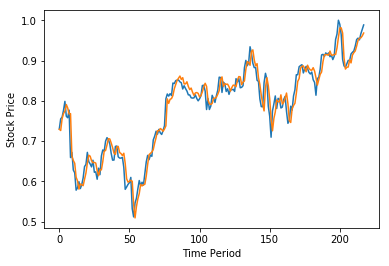

In [29]:
%matplotlib inline

'''
This script shows how to predict stock prices using a basic RNN
'''
import tensorflow as tf
import numpy as np
import matplotlib
import os

tf.reset_default_graph()
tf.set_random_seed(777)  # reproducibility

if "DISPLAY" not in os.environ:
    # remove Travis CI Error
    matplotlib.use('Agg')

import matplotlib.pyplot as plt


def MinMaxScaler(data):
    ''' Min Max Normalization
    Parameters
    ----------
    data : numpy.ndarray
        input data to be normalized
        shape: [Batch size, dimension]
    Returns
    ----------
    data : numpy.ndarry
        normalized data
        shape: [Batch size, dimension]
    References
    ----------
    .. [1] http://sebastianraschka.com/Articles/2014_about_feature_scaling.html
    '''
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # noise term prevents the zero division
    return numerator / (denominator + 1e-7)


# train Parameters
seq_length = 7
data_dim = 5
hidden_dim = 10
output_dim = 1
learning_rate = 0.01
iterations = 500

# Open, High, Low, Volume, Close
xy = np.loadtxt('data-02-stock_daily.csv', delimiter=',')
xy = xy[::-1]  # reverse order (chronically ordered)
xy = MinMaxScaler(xy)
x = xy
y = xy[:, [-1]]  # Close as label

# build a dataset
dataX = []
dataY = []
for i in range(0, len(y) - seq_length):
    _x = x[i:i + seq_length]
    _y = y[i + seq_length]  # Next close price
#    print(_x, "->", _y)
    dataX.append(_x)
    dataY.append(_y)

# train/test split
train_size = int(len(dataY) * 0.7)
test_size = len(dataY) - train_size
trainX, testX = np.array(dataX[0:train_size]), np.array(
    dataX[train_size:len(dataX)])
trainY, testY = np.array(dataY[0:train_size]), np.array(
    dataY[train_size:len(dataY)])

# input place holders
X = tf.placeholder(tf.float32, [None, seq_length, data_dim])
Y = tf.placeholder(tf.float32, [None, 1])

# build a LSTM network
cell = tf.contrib.rnn.BasicLSTMCell(
    num_units=hidden_dim, state_is_tuple=True, activation=tf.tanh)
outputs, _states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)
Y_pred = tf.contrib.layers.fully_connected(
    outputs[:, -1], output_dim, activation_fn=None)  # We use the last cell's output

# cost/loss
loss = tf.reduce_sum(tf.square(Y_pred - Y))  # sum of the squares
# optimizer
optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(loss)

# RMSE
targets = tf.placeholder(tf.float32, [None, 1])
predictions = tf.placeholder(tf.float32, [None, 1])
rmse = tf.sqrt(tf.reduce_mean(tf.square(targets - predictions)))

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)

    # Training step
    for i in range(iterations):
        _, step_loss = sess.run([train, loss], feed_dict={
                                X: trainX, Y: trainY})
        
        if i % 10 == 0:
            print("[step: {}] loss: {}".format(i, step_loss))

    # Test step
    test_predict = sess.run(Y_pred, feed_dict={X: testX})
    rmse_val = sess.run(rmse, feed_dict={
                    targets: testY, predictions: test_predict})
    print("RMSE: {}".format(rmse_val))

    # Plot predictions
    plt.plot(testY)
    plt.plot(test_predict)
    plt.xlabel("Time Period")
    plt.ylabel("Stock Price")
    plt.show()